<a href="https://colab.research.google.com/github/DevanshBhardwaj-vit/data_analysis_of_loan/blob/main/bank_data_analysis(loan).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

![](https://apps.tsn.go.tz/public/uploads/fd2b657ba7ea5c49c5473dc452481cb0.png)

<h3 >   
      <font color = purple >
            <span style='font-family:Georgia'>
            Introduction:
            </span>   
        </font>    
</h3>
<p>
    <span style='font-family:Georgia'>
    This case study aims to give an idea of applying EDA in a real business scenario. In this case study, we will develop a basic understanding of risk analytics in banking and financial services and understand how data is used to minimise the risk of losing money while lending to customers.
    </span>
</p>   
<hr>
<h3>
    <font color = purple >
        <span style='font-family:Georgia'>
            Business Understanding:
            </span>   
        </font>    
</h3>
<p>
    <span style='font-family:Georgia'>
    The loan providing companies find it hard to give loans to the people due to their insufficient or non-existent credit history. Because of that, some consumers use it as their advantage by becoming a defaulter. Suppose you work for a consumer finance company which specialises in lending various types of loans to urban customers. You have to use EDA to analyse the patterns present in the data. This will ensure that the applicants capable of repaying the loan are not rejected.<br>
        When the company receives a loan application, the company has to decide for loan approval based on the applicant’s profile. Two types of risks are associated with the bank’s decision:
    </span>
</p>
<ul>
    <span style='font-family:Georgia'>
        <li>If the applicant is likely to repay the loan, then not approving the loan results in a loss of business to the company</li>
        <li>If the applicant is not likely to repay the loan, i.e. he/she is likely to default, then approving the loan may lead to a financial loss for the company.</li>
    </span>
</ul>
    
<p><span style='font-family:Georgia'>The data given below contains the information about the loan application at the time of applying for the loan. It contains two types of scenarios:</span></p>
<ul>
    <span style='font-family:Georgia'>
        <li><b>The client with payment difficulties:</b> he/she had late payment more than X days on at least one of the first Y instalments of the loan in our sample</li>
        <li><b>All other cases:</b> All other cases when the payment is paid on time</li>
    </span>
</ul>
    
<p><span style='font-family:Georgia'>When a client applies for a loan, there are four types of decisions that could be taken by the client/company):</span></p>

<ol>
    <span style='font-family:Georgia'>
        <li><b>Approved:</b> The Company has approved loan Application</li>
        <li><b>Cancelled:</b> The client cancelled the application sometime during approval. Either the client changed her/his mind about the loan or in some cases due to a higher risk of the client he received worse pricing which he did not want.</li>
        <li><b>Refused:</b> The company had rejected the loan (because the client does not meet their requirements etc.)</li>
        <li><b>Unused offer:</b>  Loan has been cancelled by the client but on different stages of the process.</li>
    </span>
</ol>
<hr>
<h3>   
      <font color = purple >
            <span style='font-family:Georgia'>
            Business Objective:
            </span>   
        </font>    
</h3>
<p>
    <span style='font-family:Georgia'>
        This case study aims to identify patterns which indicate if a client has difficulty paying their installments which may be used for taking actions such as denying the loan, reducing the amount of loan, lending (to risky applicants) at a higher interest rate, etc. This will ensure that the consumers capable of repaying the loan are not rejected. Identification of such applicants using EDA is the aim of this case study.<br>
        In other words, the company wants to understand the driving factors (or driver variables) behind loan default, i.e. the variables which are strong indicators of default.  The company can utilise this knowledge for its portfolio and risk assessment.
    </span>
</p>

<a id="libraries"></a>
<h2>   
      <font color = blue >
            <span style='font-family:Georgia'>
            2. Getting Jupyter Ready:
            </span>   
        </font>    
</h2>

<h3 name='libraries'>   
      <font color = purple >
            <span style='font-family:Georgia'>
            2.1 Import Python Libraries:
            </span>   
        </font>    
</h3>

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.style as style
import seaborn as sns
import itertools
%matplotlib inline

# setting up plot style
style.use('seaborn-poster')
style.use('fivethirtyeight')

<ipython-input-2-0ea1bc90fd02>:10: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  style.use('seaborn-poster')


<h3 name='libraries'>   
      <font color = purple >
            <span style='font-family:Georgia'>
            2.2 Supress Warnings:
            </span>   
        </font>    
</h3>

In [3]:
import warnings
warnings.filterwarnings('ignore')

<h3 name='libraries'>   
      <font color = purple >
            <span style='font-family:Georgia'>
            2.3 Adjust Jupyer Views:
            </span>   
        </font>    
</h3>

In [4]:
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)
pd.set_option('display.expand_frame_repr', False)

<a id="import"></a>
<h2>   
      <font color = blue >
            <span style='font-family:Georgia'>
            3. Reading & Understanding the data
            </span>   
        </font>    
</h2>

<a id="input"></a>
<h3 name='libraries'>   
      <font color = purple >
            <span style='font-family:Georgia'>
            3.1 Importing the input files
            </span>   
        </font>    
</h3>

In [5]:
# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/loan-defaulter/application_data.csv
/kaggle/input/loan-defaulter/previous_application.csv
/kaggle/input/loan-defaulter/columns_description.csv


In [6]:
applicationDF = pd.read_csv(r'/kaggle/input/loan-defaulter/application_data.csv')
previousDF = pd.read_csv('/kaggle/input/loan-defaulter/previous_application.csv')
applicationDF.head()

SK_ID_CURR  TARGET NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  AMT_GOODS_PRICE NAME_TYPE_SUITE NAME_INCOME_TYPE            NAME_EDUCATION_TYPE    NAME_FAMILY_STATUS  NAME_HOUSING_TYPE  REGION_POPULATION_RELATIVE  DAYS_BIRTH  DAYS_EMPLOYED  DAYS_REGISTRATION  DAYS_ID_PUBLISH  OWN_CAR_AGE  FLAG_MOBIL  FLAG_EMP_PHONE  FLAG_WORK_PHONE  FLAG_CONT_MOBILE  FLAG_PHONE  FLAG_EMAIL OCCUPATION_TYPE  CNT_FAM_MEMBERS  REGION_RATING_CLIENT  REGION_RATING_CLIENT_W_CITY WEEKDAY_APPR_PROCESS_START  HOUR_APPR_PROCESS_START  REG_REGION_NOT_LIVE_REGION  REG_REGION_NOT_WORK_REGION  LIVE_REGION_NOT_WORK_REGION  REG_CITY_NOT_LIVE_CITY  REG_CITY_NOT_WORK_CITY  LIVE_CITY_NOT_WORK_CITY       ORGANIZATION_TYPE  EXT_SOURCE_1  EXT_SOURCE_2  EXT_SOURCE_3  APARTMENTS_AVG  BASEMENTAREA_AVG  YEARS_BEGINEXPLUATATION_AVG  YEARS_BUILD_AVG  COMMONAREA_AVG  ELEVATORS_AVG  ENTRANCES_AVG  FLOORSMAX_AVG  FLOORSMIN_AVG  LANDAREA_AVG  LIVINGAPARTMENTS_AVG  LIVINGAREA_AVG  NONLIVINGAPARTMENTS_AVG  NONLIVINGAREA_AVG  APARTMENTS_MODE  BASEMENTAREA_MODE  YEARS_BEGINEXPLUATATION_MODE  YEARS_BUILD_MODE  COMMONAREA_MODE  ELEVATORS_MODE  ENTRANCES_MODE  FLOORSMAX_MODE  FLOORSMIN_MODE  LANDAREA_MODE  LIVINGAPARTMENTS_MODE  LIVINGAREA_MODE  NONLIVINGAPARTMENTS_MODE  NONLIVINGAREA_MODE  APARTMENTS_MEDI  BASEMENTAREA_MEDI  YEARS_BEGINEXPLUATATION_MEDI  YEARS_BUILD_MEDI  COMMONAREA_MEDI  ELEVATORS_MEDI  ENTRANCES_MEDI  FLOORSMAX_MEDI  FLOORSMIN_MEDI  LANDAREA_MEDI  LIVINGAPARTMENTS_MEDI  LIVINGAREA_MEDI  NONLIVINGAPARTMENTS_MEDI  NONLIVINGAREA_MEDI FONDKAPREMONT_MODE  HOUSETYPE_MODE  TOTALAREA_MODE WALLSMATERIAL_MODE EMERGENCYSTATE_MODE  OBS_30_CNT_SOCIAL_CIRCLE  DEF_30_CNT_SOCIAL_CIRCLE  OBS_60_CNT_SOCIAL_CIRCLE  DEF_60_CNT_SOCIAL_CIRCLE  DAYS_LAST_PHONE_CHANGE  FLAG_DOCUMENT_2  FLAG_DOCUMENT_3  FLAG_DOCUMENT_4  FLAG_DOCUMENT_5  FLAG_DOCUMENT_6  FLAG_DOCUMENT_7  FLAG_DOCUMENT_8  FLAG_DOCUMENT_9  FLAG_DOCUMENT_10  FLAG_DOCUMENT_11  FLAG_DOCUMENT_12  FLAG_DOCUMENT_13  FLAG_DOCUMENT_14  FLAG_DOCUMENT_15  FLAG_DOCUMENT_16  FLAG_DOCUMENT_17  FLAG_DOCUMENT_18  FLAG_DOCUMENT_19  FLAG_DOCUMENT_20  FLAG_DOCUMENT_21  AMT_REQ_CREDIT_BUREAU_HOUR  AMT_REQ_CREDIT_BUREAU_DAY  AMT_REQ_CREDIT_BUREAU_WEEK  AMT_REQ_CREDIT_BUREAU_MON  AMT_REQ_CREDIT_BUREAU_QRT  AMT_REQ_CREDIT_BUREAU_YEAR
0      100002       1         Cash loans           M            N               Y             0          202500.0    406597.5      24700.5         351000.0   Unaccompanied          Working  Secondary / secondary special  Single / not married  House / apartment                    0.018801       -9461           -637            -3648.0            -2120          NaN           1               1                0                 1           1           0        Laborers              1.0                     2                            2                  WEDNESDAY                       10                           0                           0                            0                       0                       0                        0  Business Entity Type 3      0.083037      0.262949      0.139376          0.0247            0.0369                       0.9722           0.6192          0.0143           0.00         0.0690         0.0833         0.1250        0.0369                0.0202          0.0190                   0.0000             0.0000           0.0252             0.0383                        0.9722            0.6341           0.0144          0.0000          0.0690          0.0833          0.1250         0.0377                  0.022           0.0198                       0.0                 0.0           0.0250             0.0369                        0.9722            0.6243           0.0144            0.00          0.0690          0.0833          0.1250         0.0375                 0.0205           0.0193                    0.0000                0.00   reg oper account  block of flats          0.0149       Stone, brick       

In [7]:
previousDF.head()

SK_ID_PREV  SK_ID_CURR NAME_CONTRACT_TYPE  AMT_ANNUITY  AMT_APPLICATION  AMT_CREDIT  AMT_DOWN_PAYMENT  AMT_GOODS_PRICE WEEKDAY_APPR_PROCESS_START  HOUR_APPR_PROCESS_START FLAG_LAST_APPL_PER_CONTRACT  NFLAG_LAST_APPL_IN_DAY  RATE_DOWN_PAYMENT  RATE_INTEREST_PRIMARY  RATE_INTEREST_PRIVILEGED NAME_CASH_LOAN_PURPOSE NAME_CONTRACT_STATUS  DAYS_DECISION      NAME_PAYMENT_TYPE CODE_REJECT_REASON  NAME_TYPE_SUITE NAME_CLIENT_TYPE NAME_GOODS_CATEGORY NAME_PORTFOLIO NAME_PRODUCT_TYPE             CHANNEL_TYPE  SELLERPLACE_AREA NAME_SELLER_INDUSTRY  CNT_PAYMENT NAME_YIELD_GROUP       PRODUCT_COMBINATION  DAYS_FIRST_DRAWING  DAYS_FIRST_DUE  DAYS_LAST_DUE_1ST_VERSION  DAYS_LAST_DUE  DAYS_TERMINATION  NFLAG_INSURED_ON_APPROVAL
0     2030495      271877     Consumer loans     1730.430          17145.0     17145.0               0.0          17145.0                   SATURDAY                     15.0                           Y                     1.0                0.0               0.182832                  0.867336                    XAP             Approved          -73.0  Cash through the bank                XAP              NaN         Repeater              Mobile            POS               XNA             Country-wide              35.0         Connectivity         12.0           middle  POS mobile with interest            365243.0           -42.0                      300.0          -42.0             -37.0                        0.0
1     2802425      108129         Cash loans    25188.615         607500.0    679671.0               NaN         607500.0                   THURSDAY                     11.0                           Y                     1.0                NaN                    NaN                       NaN                    XNA             Approved         -164.0                    XNA                XAP    Unaccompanied         Repeater                 XNA           Cash            x-sell           Contact center              -1.0                  XNA         36.0       low_action          Cash X-Sell: low            365243.0          -134.0                      916.0       365243.0          365243.0                        1.0
2     2523466      122040         Cash loans    15060.735         112500.0    136444.5               NaN         112500.0                    TUESDAY                     11.0                           Y                     1.0                NaN                    NaN                       NaN                    XNA             Approved         -301.0  Cash through the bank                XAP  Spouse, partner         Repeater                 XNA           Cash            x-sell  Credit and cash offices              -1.0                  XNA         12.0             high         Cash X-Sell: high            365243.0          -271.0                       59.0       365243.0          365243.0                        1.0
3     2819243      176158         Cash loans    47041.335         450000.0    470790.0               NaN         450000.0                     MONDAY                      7.0                           Y                     1.0                NaN                    NaN                       NaN                    XNA             Approved         -512.0  Cash through the bank                XAP              NaN         Repeater                 XNA           Cash            x-sell  Credit and cash offices              -1.0                  XNA         12.0           middle       Cash X-Sell: middle            365243.0          -482.0                     -152.0         -182.0            -177.0                        1.0
4     1784265      202054         Cash loans    31924.395         337500.0    404055.0               NaN         337500.0                   THURSDAY                      9.0                           Y                     1.0                NaN                    NaN                       NaN                Repairs              Refused         -781.0  Cash through the bank   

<a id="inspect"></a>
<h3 name='libraries'>   
      <font color = purple >
            <span style='font-family:Georgia'>
            3.2 Inspect Data Frames
            </span>   
        </font>    
</h3>

In [8]:
# Database dimension
print("Database dimension - applicationDF     :",applicationDF.shape)
print("Database dimension - previousDF        :",previousDF.shape)

#Database size
print("Database size - applicationDF          :",applicationDF.size)
print("Database size - previousDF             :",previousDF.size)

Database dimension - applicationDF     : (307511, 122)
Database dimension - previousDF        : (72295, 37)
Database size - applicationDF          : 37516342
Database size - previousDF             : 2674915


In [9]:
# Database column types
applicationDF.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 122 columns):
 #    Column                        Dtype  
---   ------                        -----  
 0    SK_ID_CURR                    int64  
 1    TARGET                        int64  
 2    NAME_CONTRACT_TYPE            object 
 3    CODE_GENDER                   object 
 4    FLAG_OWN_CAR                  object 
 5    FLAG_OWN_REALTY               object 
 6    CNT_CHILDREN                  int64  
 7    AMT_INCOME_TOTAL              float64
 8    AMT_CREDIT                    float64
 9    AMT_ANNUITY                   float64
 10   AMT_GOODS_PRICE               float64
 11   NAME_TYPE_SUITE               object 
 12   NAME_INCOME_TYPE              object 
 13   NAME_EDUCATION_TYPE           object 
 14   NAME_FAMILY_STATUS            object 
 15   NAME_HOUSING_TYPE             object 
 16   REGION_POPULATION_RELATIVE    float64
 17   DAYS_BIRTH                    int64  
 18   DA

In [10]:
previousDF.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 72295 entries, 0 to 72294
Data columns (total 37 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   SK_ID_PREV                   72295 non-null  int64  
 1   SK_ID_CURR                   72295 non-null  int64  
 2   NAME_CONTRACT_TYPE           72295 non-null  object 
 3   AMT_ANNUITY                  56980 non-null  float64
 4   AMT_APPLICATION              72295 non-null  float64
 5   AMT_CREDIT                   72295 non-null  float64
 6   AMT_DOWN_PAYMENT             35692 non-null  float64
 7   AMT_GOODS_PRICE              56728 non-null  float64
 8   WEEKDAY_APPR_PROCESS_START   72294 non-null  object 
 9   HOUR_APPR_PROCESS_START      72294 non-null  float64
 10  FLAG_LAST_APPL_PER_CONTRACT  72294 non-null  object 
 11  NFLAG_LAST_APPL_IN_DAY       72294 non-null  float64
 12  RATE_DOWN_PAYMENT            35691 non-null  float64
 13  RATE_INTEREST_PR

In [11]:
# Checking the numeric variables of the dataframes
applicationDF.describe()

SK_ID_CURR         TARGET   CNT_CHILDREN  AMT_INCOME_TOTAL    AMT_CREDIT    AMT_ANNUITY  AMT_GOODS_PRICE  REGION_POPULATION_RELATIVE     DAYS_BIRTH  DAYS_EMPLOYED  DAYS_REGISTRATION  DAYS_ID_PUBLISH    OWN_CAR_AGE     FLAG_MOBIL  FLAG_EMP_PHONE  FLAG_WORK_PHONE  FLAG_CONT_MOBILE     FLAG_PHONE     FLAG_EMAIL  CNT_FAM_MEMBERS  REGION_RATING_CLIENT  REGION_RATING_CLIENT_W_CITY  HOUR_APPR_PROCESS_START  REG_REGION_NOT_LIVE_REGION  REG_REGION_NOT_WORK_REGION  LIVE_REGION_NOT_WORK_REGION  REG_CITY_NOT_LIVE_CITY  REG_CITY_NOT_WORK_CITY  LIVE_CITY_NOT_WORK_CITY   EXT_SOURCE_1  EXT_SOURCE_2   EXT_SOURCE_3  APARTMENTS_AVG  BASEMENTAREA_AVG  YEARS_BEGINEXPLUATATION_AVG  YEARS_BUILD_AVG  COMMONAREA_AVG  ELEVATORS_AVG  ENTRANCES_AVG  FLOORSMAX_AVG  FLOORSMIN_AVG   LANDAREA_AVG  LIVINGAPARTMENTS_AVG  LIVINGAREA_AVG  NONLIVINGAPARTMENTS_AVG  NONLIVINGAREA_AVG  APARTMENTS_MODE  BASEMENTAREA_MODE  YEARS_BEGINEXPLUATATION_MODE  YEARS_BUILD_MODE  COMMONAREA_MODE  ELEVATORS_MODE  ENTRANCES_MODE  FLOORSMAX_MODE  FLOORSMIN_MODE  LANDAREA_MODE  LIVINGAPARTMENTS_MODE  LIVINGAREA_MODE  NONLIVINGAPARTMENTS_MODE  NONLIVINGAREA_MODE  APARTMENTS_MEDI  BASEMENTAREA_MEDI  YEARS_BEGINEXPLUATATION_MEDI  YEARS_BUILD_MEDI  COMMONAREA_MEDI  ELEVATORS_MEDI  ENTRANCES_MEDI  FLOORSMAX_MEDI  FLOORSMIN_MEDI  LANDAREA_MEDI  LIVINGAPARTMENTS_MEDI  LIVINGAREA_MEDI  NONLIVINGAPARTMENTS_MEDI  NONLIVINGAREA_MEDI  TOTALAREA_MODE  OBS_30_CNT_SOCIAL_CIRCLE  DEF_30_CNT_SOCIAL_CIRCLE  OBS_60_CNT_SOCIAL_CIRCLE  DEF_60_CNT_SOCIAL_CIRCLE  DAYS_LAST_PHONE_CHANGE  FLAG_DOCUMENT_2  FLAG_DOCUMENT_3  FLAG_DOCUMENT_4  FLAG_DOCUMENT_5  FLAG_DOCUMENT_6  FLAG_DOCUMENT_7  FLAG_DOCUMENT_8  FLAG_DOCUMENT_9  FLAG_DOCUMENT_10  FLAG_DOCUMENT_11  FLAG_DOCUMENT_12  FLAG_DOCUMENT_13  FLAG_DOCUMENT_14  FLAG_DOCUMENT_15  FLAG_DOCUMENT_16  FLAG_DOCUMENT_17  FLAG_DOCUMENT_18  FLAG_DOCUMENT_19  FLAG_DOCUMENT_20  FLAG_DOCUMENT_21  AMT_REQ_CREDIT_BUREAU_HOUR  AMT_REQ_CREDIT_BUREAU_DAY  AMT_REQ_CREDIT_BUREAU_WEEK  AMT_REQ_CREDIT_BUREAU_MON  AMT_REQ_CREDIT_BUREAU_QRT  AMT_REQ_CREDIT_BUREAU_YEAR
count  307511.000000  307511.000000  307511.000000      3.075110e+05  3.075110e+05  307499.000000     3.072330e+05               307511.000000  307511.000000  307511.000000      307511.000000    307511.000000  104582.000000  307511.000000   307511.000000    307511.000000     307511.000000  307511.000000  307511.000000    307509.000000         307511.000000                307511.000000            307511.000000               307511.000000               307511.000000                307511.000000           307511.000000           307511.000000            307511.000000  134133.000000  3.068510e+05  246546.000000    151450.00000     127568.000000                157504.000000    103023.000000    92646.000000  143620.000000  152683.000000  154491.000000   98869.000000  124921.000000          97312.000000   153161.000000             93997.000000      137829.000000    151450.000000      127568.000000                 157504.000000     103023.000000     92646.000000   143620.000000   152683.000000   154491.000000    98869.000000  124921.000000           97312.000000    153161.000000              93997.000000       137829.000000    151450.000000      127568.000000                 157504.000000     103023.000000     92646.000000   143620.000000   152683.000000   154491.000000    98869.000000  124921.000000           97312.000000    153161.000000              93997.000000       137829.000000   159080.000000             306490.000000             306490.000000             306490.000000             306490.000000           307510.000000    307511.000000    307511.000000    307511.000000    307511.000000    307511.000000    307511.000000    307511.000000    307511.000000     307511.000000     307511.000000     307511.000000     307511.000000     307511.000000      307511.00000     307511.000000     307511.000000     307511.000000     307511.000000     307511.000000     307511.000000               265992.000000              265992.00000

In [12]:
previousDF.describe()

SK_ID_PREV     SK_ID_CURR    AMT_ANNUITY  AMT_APPLICATION    AMT_CREDIT  AMT_DOWN_PAYMENT  AMT_GOODS_PRICE  HOUR_APPR_PROCESS_START  NFLAG_LAST_APPL_IN_DAY  RATE_DOWN_PAYMENT  RATE_INTEREST_PRIMARY  RATE_INTEREST_PRIVILEGED  DAYS_DECISION  SELLERPLACE_AREA   CNT_PAYMENT  DAYS_FIRST_DRAWING  DAYS_FIRST_DUE  DAYS_LAST_DUE_1ST_VERSION  DAYS_LAST_DUE  DAYS_TERMINATION  NFLAG_INSURED_ON_APPROVAL
count  7.229500e+04   72295.000000   56980.000000     7.229500e+04  7.229500e+04      3.569200e+04     5.672800e+04             72294.000000            72294.000000       35691.000000             239.000000                239.000000   72294.000000      7.229400e+04  56979.000000        44677.000000    44677.000000               44677.000000   44677.000000      44677.000000               44677.000000
mean   1.921944e+06  279014.074431   15505.089777     1.690912e+05  1.887729e+05      6.519740e+03     2.155063e+05                12.480137                0.996528           0.079181               0.200240                  0.789663    -900.624602      3.694244e+02     15.537549       344151.951989    13817.208676               31576.430803   76154.842357      81061.478054                   0.325469
std    5.359149e+05  102780.435144   14618.194240     2.823809e+05  3.089461e+05      1.693336e+04     3.026989e+05                 3.322846                0.058821           0.107577               0.106977                  0.089821     785.205664      1.492914e+04     13.999538        85319.090965    72424.992254              103759.146250  149351.162381     152698.854003                   0.468555
min    1.000001e+06  100007.000000       0.000000     0.000000e+00  0.000000e+00      0.000000e+00     0.000000e+00                 0.000000                0.000000           0.000000               0.059135                  0.424419   -2922.000000     -1.000000e+00      0.000000        -2920.000000    -2891.000000               -2800.000000   -2888.000000      -2844.000000                   0.000000
25%    1.455861e+06  190068.500000    6131.801250     2.195325e+04  2.596275e+04      0.000000e+00     4.922685e+04                10.000000                1.000000           0.000000               0.160716                  0.715645   -1336.000000     -1.000000e+00      6.000000       365243.000000    -1639.000000               -1266.000000   -1334.000000      -1290.000000                   0.000000
50%    1.920993e+06  279376.000000   10880.842500     7.147350e+04  7.895700e+04      1.575000e+03     1.047938e+05                12.000000                1.000000           0.049773               0.189136                  0.835095    -601.000000      1.000000e+01     12.000000       365243.000000     -823.000000                -366.000000    -537.000000       -501.000000                   0.000000
75%    2.389068e+06  368520.500000   19739.565000     1.800000e+05  1.985152e+05      7.745625e+03     2.250000e+05                15.000000                1.000000           0.108909               0.193330                  0.852537    -293.000000      1.000000e+02     18.000000       365243.000000     -407.000000                 111.000000     -75.000000        -48.000000                   1.000000
max    2.845377e+06  456254.000000  234478.395000     3.826372e+06  4.104351e+06      1.035000e+06     3.826372e+06                23.000000                1.000000           0.948445               1.000000                  0.867336      -2.000000      4.000000e+06     72.000000       365243.000000   365243.000000              365243.000000  365243.000000     365243.000000                   1.000000

<a id="clean"></a>
<h2>   
      <font color = blue >
            <span style='font-family:Georgia'>
            4. Data Cleaning & Manipulation
            </span>   
        </font>    
</h2>

<a id="null"></a>
<h3>   
      <font color = purple >
            <span style='font-family:Georgia'>
            4.1 Null Value Calculation
            </span>   
        </font>    
</h3>

<h4>   
      <font color = darkgreen >
            <span style='font-family:Georgia'>
            4.1.1 applicationDF Missing values
            </span>   
        </font>    
</h4>

<Axes: >

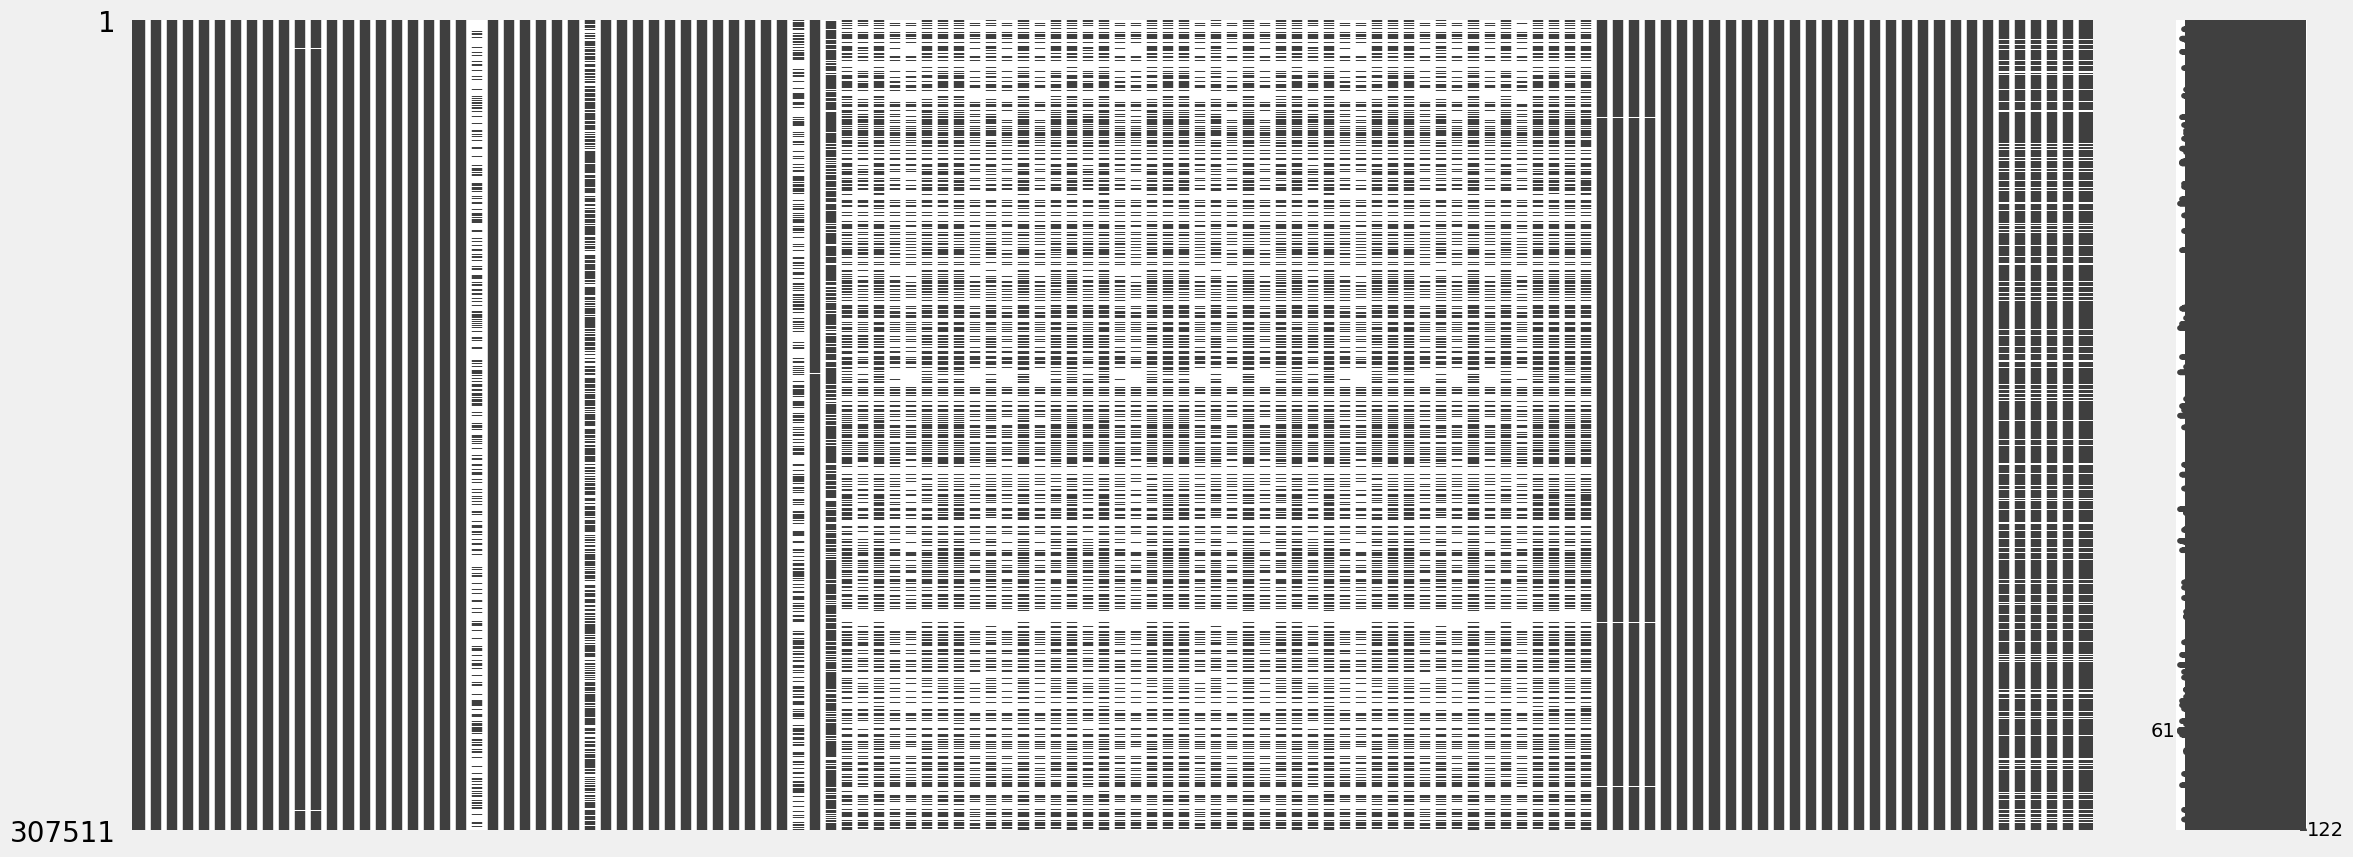

In [13]:
import missingno as mn
mn.matrix(applicationDF)

<div class="alert alert-block alert-info">
    <span style='font-family:Georgia'>
        <b>Insight: </b><br>Based on the above Matrix, it is evidednt that the dataset has many missing values. Let's check for each column what is the % of missing values
    </span>    
</div>

In [14]:
# % null value in each column
round(applicationDF.isnull().sum() / applicationDF.shape[0] * 100.00,2)

SK_ID_CURR                       0.00
TARGET                           0.00
NAME_CONTRACT_TYPE               0.00
CODE_GENDER                      0.00
FLAG_OWN_CAR                     0.00
FLAG_OWN_REALTY                  0.00
CNT_CHILDREN                     0.00
AMT_INCOME_TOTAL                 0.00
AMT_CREDIT                       0.00
AMT_ANNUITY                      0.00
AMT_GOODS_PRICE                  0.09
NAME_TYPE_SUITE                  0.42
NAME_INCOME_TYPE                 0.00
NAME_EDUCATION_TYPE              0.00
NAME_FAMILY_STATUS               0.00
NAME_HOUSING_TYPE                0.00
REGION_POPULATION_RELATIVE       0.00
DAYS_BIRTH                       0.00
DAYS_EMPLOYED                    0.00
DAYS_REGISTRATION                0.00
DAYS_ID_PUBLISH                  0.00
OWN_CAR_AGE                     65.99
FLAG_MOBIL                       0.00
FLAG_EMP_PHONE                   0.00
FLAG_WORK_PHONE                  0.00
FLAG_CONT_MOBILE                 0.00
FLAG_PHONE                       0.00
FLAG_EMAIL                       0.00
OCCUPATION_TYPE                 31.35
CNT_FAM_MEMBERS                  0.00
REGION_RATING_CLIENT             0.00
REGION_RATING_CLIENT_W_CITY      0.00
WEEKDAY_APPR_PROCESS_START       0.00
HOUR_APPR_PROCESS_START          0.00
REG_REGION_NOT_LIVE_REGION       0.00
REG_REGION_NOT_WORK_REGION       0.00
LIVE_REGION_NOT_WORK_REGION      0.00
REG_CITY_NOT_LIVE_CITY           0.00
REG_CITY_NOT_WORK_CITY           0.00
LIVE_CITY_NOT_WORK_CITY          0.00
ORGANIZATION_TYPE                0.00
EXT_SOURCE_1                    56.38
EXT_SOURCE_2                     0.21
EXT_SOURCE_3                    19.83
APARTMENTS_AVG                  50.75
BASEMENTAREA_AVG                58.52
YEARS_BEGINEXPLUATATION_AVG     48.78
YEARS_BUILD_AVG                 66.50
COMMONAREA_AVG                  69.87
ELEVATORS_AVG                   53.30
ENTRANCES_AVG                   50.35
FLOORSMAX_AVG                   49.76
FLOORSMIN_AVG                   67.85
LANDAREA_AVG                    59.38
LIVINGAPARTMENTS_AVG            68.35
LIVINGAREA_AVG                  50.19
NONLIVINGAPARTMENTS_AVG         69.43
NONLIVINGAREA_AVG               55.18
APARTMENTS_MODE                 50.75
BASEMENTAREA_MODE               58.52
YEARS_BEGINEXPLUATATION_MODE    48.78
YEARS_BUILD_MODE                66.50
COMMONAREA_MODE                 69.87
ELEVATORS_MODE                  53.30
ENTRANCES_MODE                  50.35
FLOORSMAX_MODE                  49.76
FLOORSMIN_MODE                  67.85
LANDAREA_MODE                   59.38
LIVINGAPARTMENTS_MODE           68.35
LIVINGAREA_MODE                 50.19
NONLIVINGAPARTMENTS_MODE        69.43
NONLIVINGAREA_MODE              55.18
APARTMENTS_MEDI                 50.75
BASEMENTAREA_MEDI               58.52
YEARS_BEGINEXPLUATATION_MEDI    48.78
YEARS_BUILD_MEDI                66.50
COMMONAREA_MEDI                 69.87
ELEVATORS_MEDI                  53.30
ENTRANCES_MEDI                  50.35
FLOORSMAX_MEDI                  49.76
FLOORSMIN_MEDI                  67.85
LANDAREA_MEDI                   59.38
LIVINGAPARTMENTS_MEDI           68.35
LIVINGAREA_MEDI                 50.19
NONLIVINGAPARTMENTS_MEDI        69.43
NONLIVINGAREA_MEDI              55.18
FONDKAPREMONT_MODE              68.39
HOUSETYPE_MODE                  50.18
TOTALAREA_MODE                  48.27
WALLSMATERIAL_MODE              50.84
EMERGENCYSTATE_MODE             47.40
OBS_30_CNT_SOCIAL_CIRCLE         0.33
DEF_30_CNT_SOCIAL_CIRCLE         0.33
OBS_60_CNT_SOCIAL_CIRCLE         0.33
DEF_60_CNT_SOCIAL_CIRCLE         0.33
DAYS_LAST_PHONE_CHANGE           0.00
FLAG_DOCUMENT_2                  0.00
FLAG_DOCUMENT_3                  0.00
FLAG_DOCUMENT_4                  0.00
FLAG_DOCUMENT_5                  0.00
FLAG_DOCUMENT_6                  0.00
FLAG_DOCUMENT_7                  0.00
FLAG_DOCUMENT_8                  0.00
FLAG_DOCUMENT_9                  0.00
FLAG_DOCUMENT_10                 0.00
FLAG_DOCUM

<div class="alert alert-block alert-info">
    <span style='font-family:Georgia'>
        <b>Insight: </b><br>There are many columns in applicationDF dataframe where missing value is more than 40%. Let's plot the columns vs missing value % with 40% being the cut-off marks
    </span>    
</div>

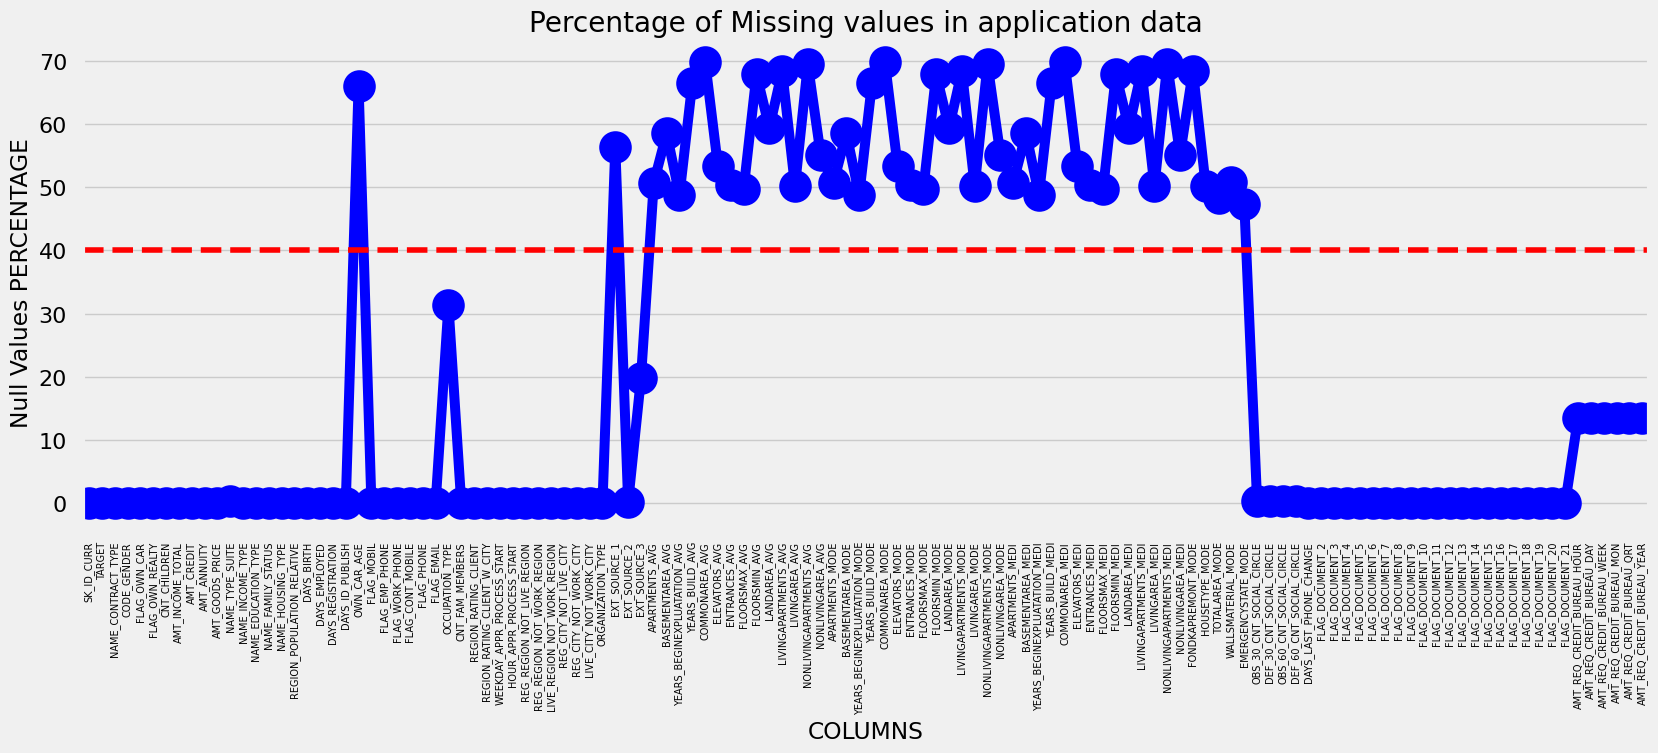

In [15]:
null_applicationDF = pd.DataFrame((applicationDF.isnull().sum())*100/applicationDF.shape[0]).reset_index()
null_applicationDF.columns = ['Column Name', 'Null Values Percentage']
fig = plt.figure(figsize=(18,6))
ax = sns.pointplot(x="Column Name",y="Null Values Percentage",data=null_applicationDF,color='blue')
plt.xticks(rotation =90,fontsize =7)
ax.axhline(40, ls='--',color='red')
plt.title("Percentage of Missing values in application data")
plt.ylabel("Null Values PERCENTAGE")
plt.xlabel("COLUMNS")
plt.show()

<div class="alert alert-block alert-info">
    <span style='font-family:Georgia'>
        <b>Insight: </b><br>From the plot we can see the columns in which percentage of null values more than 40% are marked above the red line and the columns which have less than 40 % null values below the red line. Let's check the columns which has more than 40% missing values
    </span>    
</div>

In [16]:
# more than or equal to 40% empty rows columns
nullcol_40_application = null_applicationDF[null_applicationDF["Null Values Percentage"]>=40]
nullcol_40_application

Column Name  Null Values Percentage
21                   OWN_CAR_AGE               65.990810
41                  EXT_SOURCE_1               56.381073
44                APARTMENTS_AVG               50.749729
45              BASEMENTAREA_AVG               58.515956
46   YEARS_BEGINEXPLUATATION_AVG               48.781019
47               YEARS_BUILD_AVG               66.497784
48                COMMONAREA_AVG               69.872297
49                 ELEVATORS_AVG               53.295980
50                 ENTRANCES_AVG               50.348768
51                 FLOORSMAX_AVG               49.760822
52                 FLOORSMIN_AVG               67.848630
53                  LANDAREA_AVG               59.376738
54          LIVINGAPARTMENTS_AVG               68.354953
55                LIVINGAREA_AVG               50.193326
56       NONLIVINGAPARTMENTS_AVG               69.432963
57             NONLIVINGAREA_AVG               55.179164
58               APARTMENTS_MODE               50.749729
59             BASEMENTAREA_MODE               58.515956
60  YEARS_BEGINEXPLUATATION_MODE               48.781019
61              YEARS_BUILD_MODE               66.497784
62               COMMONAREA_MODE               69.872297
63                ELEVATORS_MODE               53.295980
64                ENTRANCES_MODE               50.348768
65                FLOORSMAX_MODE               49.760822
66                FLOORSMIN_MODE               67.848630
67                 LANDAREA_MODE               59.376738
68         LIVINGAPARTMENTS_MODE               68.354953
69               LIVINGAREA_MODE               50.193326
70      NONLIVINGAPARTMENTS_MODE               69.432963
71            NONLIVINGAREA_MODE               55.179164
72               APARTMENTS_MEDI               50.749729
73             BASEMENTAREA_MEDI               58.515956
74  YEARS_BEGINEXPLUATATION_MEDI               48.781019
75              YEARS_BUILD_MEDI               66.497784
76               COMMONAREA_MEDI               69.872297
77                ELEVATORS_MEDI               53.295980
78                ENTRANCES_MEDI               50.348768
79                FLOORSMAX_MEDI               49.760822
80                FLOORSMIN_MEDI               67.848630
81                 LANDAREA_MEDI               59.376738
82         LIVINGAPARTMENTS_MEDI               68.354953
83               LIVINGAREA_MEDI               50.193326
84      NONLIVINGAPARTMENTS_MEDI               69.432963
85            NONLIVINGAREA_MEDI               55.179164
86            FONDKAPREMONT_MODE               68.386172
87                HOUSETYPE_MODE               50.176091
88                TOTALAREA_MODE               48.268517
89            WALLSMATERIAL_MODE               50.840783
90           EMERGENCYSTATE_MODE               47.398304

In [17]:
# How many columns have more than or euqal to 40% null values ?
len(nullcol_40_application)

49

<div class="alert alert-block alert-info">
    <span style='font-family:Georgia'>
        <b>Insight: </b><br>Total of 49 columns are there which have more than 40% null values.Seems like most of the columns with high missing values are related to different area sizes on apartment owned/rented by the loan applicant
    </span>    
</div>

<h4>   
      <font color = darkgreen >
            <span style='font-family:Georgia'>
            4.1.2 previousDF Missing Values
            </span>   
        </font>    
</h4>

<Axes: >

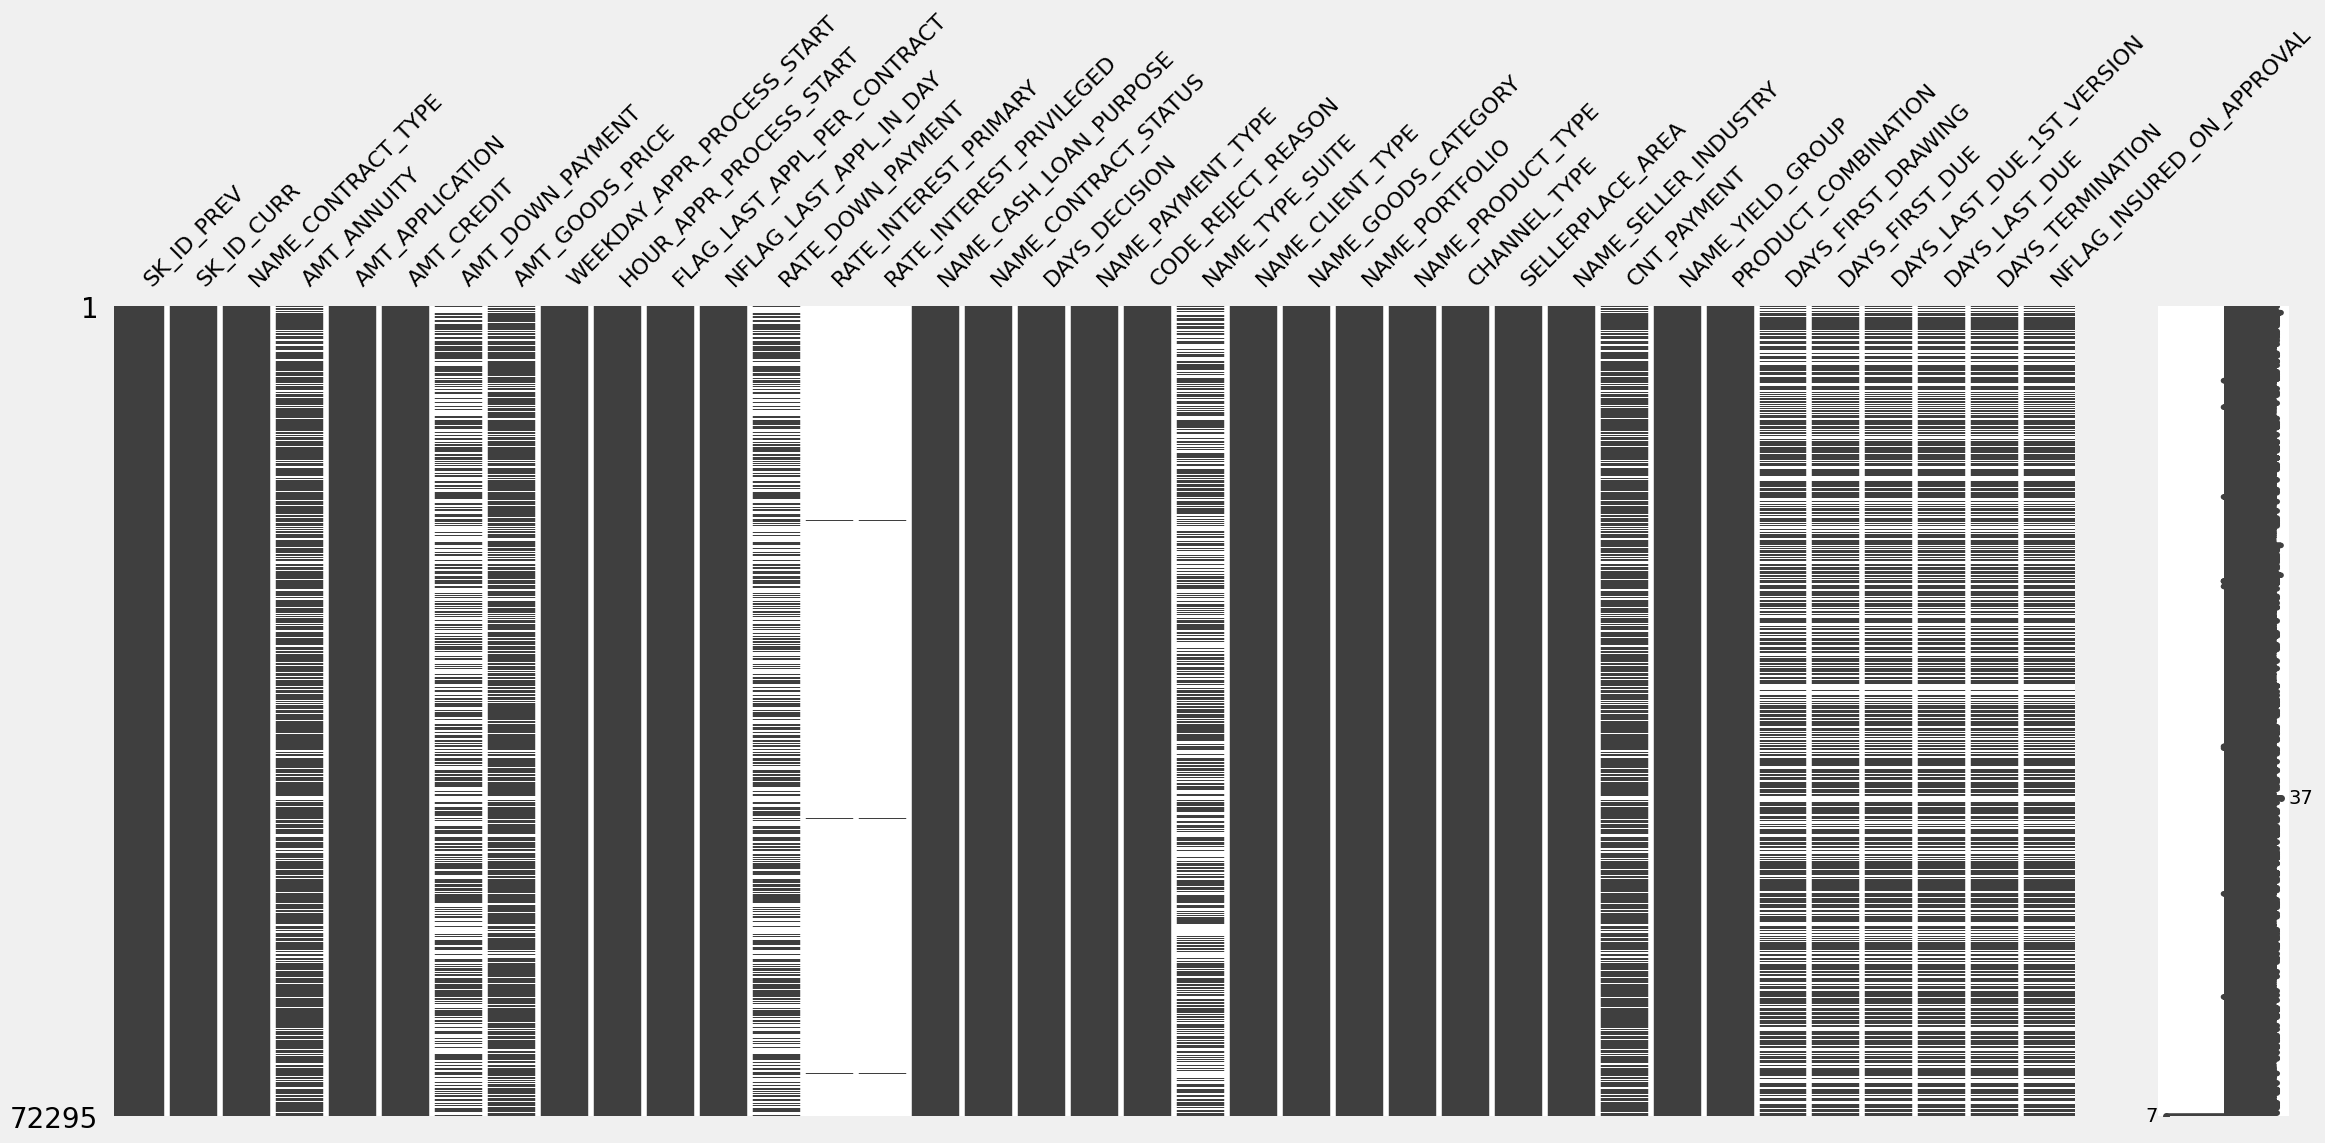

In [18]:
mn.matrix(previousDF)

In [19]:
# checking the null value % of each column in previousDF dataframe
round(previousDF.isnull().sum() / previousDF.shape[0] * 100.00,2)

SK_ID_PREV                      0.00
SK_ID_CURR                      0.00
NAME_CONTRACT_TYPE              0.00
AMT_ANNUITY                    21.18
AMT_APPLICATION                 0.00
AMT_CREDIT                      0.00
AMT_DOWN_PAYMENT               50.63
AMT_GOODS_PRICE                21.53
WEEKDAY_APPR_PROCESS_START      0.00
HOUR_APPR_PROCESS_START         0.00
FLAG_LAST_APPL_PER_CONTRACT     0.00
NFLAG_LAST_APPL_IN_DAY          0.00
RATE_DOWN_PAYMENT              50.63
RATE_INTEREST_PRIMARY          99.67
RATE_INTEREST_PRIVILEGED       99.67
NAME_CASH_LOAN_PURPOSE          0.00
NAME_CONTRACT_STATUS            0.00
DAYS_DECISION                   0.00
NAME_PAYMENT_TYPE               0.00
CODE_REJECT_REASON              0.00
NAME_TYPE_SUITE                48.53
NAME_CLIENT_TYPE                0.00
NAME_GOODS_CATEGORY             0.00
NAME_PORTFOLIO                  0.00
NAME_PRODUCT_TYPE               0.00
CHANNEL_TYPE                    0.00
SELLERPLACE_AREA                0.00
NAME_SELLER_INDUSTRY            0.00
CNT_PAYMENT                    21.19
NAME_YIELD_GROUP                0.00
PRODUCT_COMBINATION             0.02
DAYS_FIRST_DRAWING             38.20
DAYS_FIRST_DUE                 38.20
DAYS_LAST_DUE_1ST_VERSION      38.20
DAYS_LAST_DUE                  38.20
DAYS_TERMINATION               38.20
NFLAG_INSURED_ON_APPROVAL      38.20
dtype: float64

<div class="alert alert-block alert-info">
    <span style='font-family:Georgia'>
        <b>Insight: </b><br>There are many columns in previousDF dataframe where missing value is more than 40%. Let's plot the columns vs missing value % with 40% being the cut-off marks
    </span>    
</div>

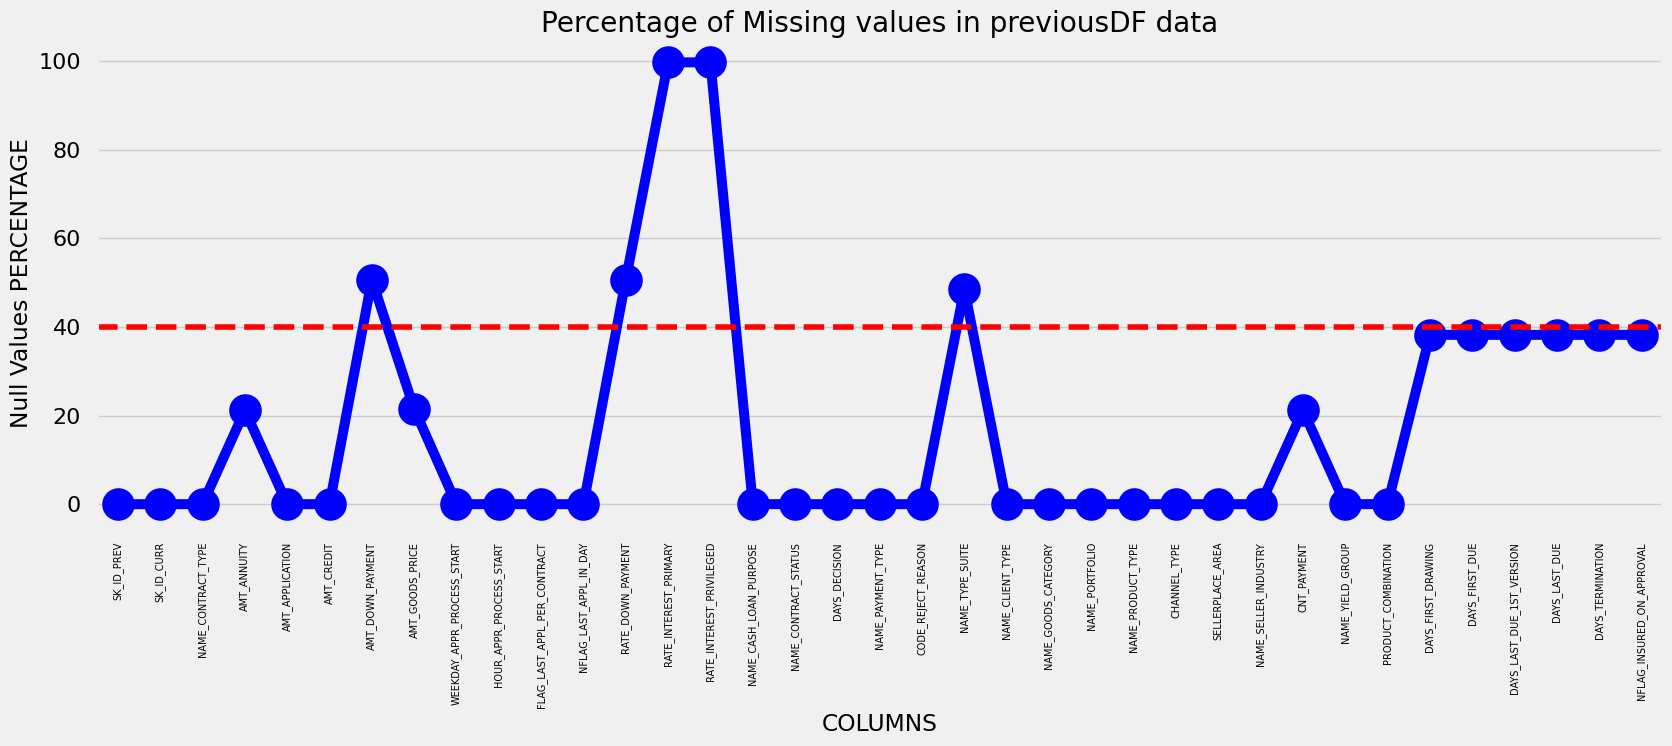

In [20]:
null_previousDF = pd.DataFrame((previousDF.isnull().sum())*100/previousDF.shape[0]).reset_index()
null_previousDF.columns = ['Column Name', 'Null Values Percentage']
fig = plt.figure(figsize=(18,6))
ax = sns.pointplot(x="Column Name",y="Null Values Percentage",data=null_previousDF,color ='blue')
plt.xticks(rotation =90,fontsize =7)
ax.axhline(40, ls='--',color='red')
plt.title("Percentage of Missing values in previousDF data")
plt.ylabel("Null Values PERCENTAGE")
plt.xlabel("COLUMNS")
plt.show()

<div class="alert alert-block alert-info">
    <span style='font-family:Georgia'>
        <b>Insight: </b><br>From the plot we can see the columns in which percentage of null values more than 40% are marked above the red line and the columns which have less than 40 % null values below the red line. Let's check the columns which has more than 40% missing values
    </span>    
</div>

In [21]:
# more than or equal to 40% empty rows columns
nullcol_40_previous = null_previousDF[null_previousDF["Null Values Percentage"]>=40]
nullcol_40_previous

Column Name  Null Values Percentage
6           AMT_DOWN_PAYMENT               50.630057
12         RATE_DOWN_PAYMENT               50.631441
13     RATE_INTEREST_PRIMARY               99.669410
14  RATE_INTEREST_PRIVILEGED               99.669410
20           NAME_TYPE_SUITE               48.531710

In [22]:
# How many columns have more than or euqal to 40% null values ?
len(nullcol_40_previous)

5

<div class="alert alert-block alert-info">
    <span style='font-family:Georgia'>
        <b>Insight: </b><br>Total of 11 columns are there which have more than 40% null values. These columns can be deleted. Before deleting these columns, let's review if there are more columns which can be dropped or not[](http://)
    </span>    
</div>

<a id="clean1"></a>
<h3>   
      <font color = purple >
            <span style='font-family:Georgia'>
            4.2 Analyze & Delete Unnecessary Columns in applicationDF
            </span>   
        </font>    
</h3>

<h4>   
      <font color = darkgreen >
            <span style='font-family:Georgia'>
            4.2.1 EXT_SOURCE_X
            </span>   
        </font>    
</h4>

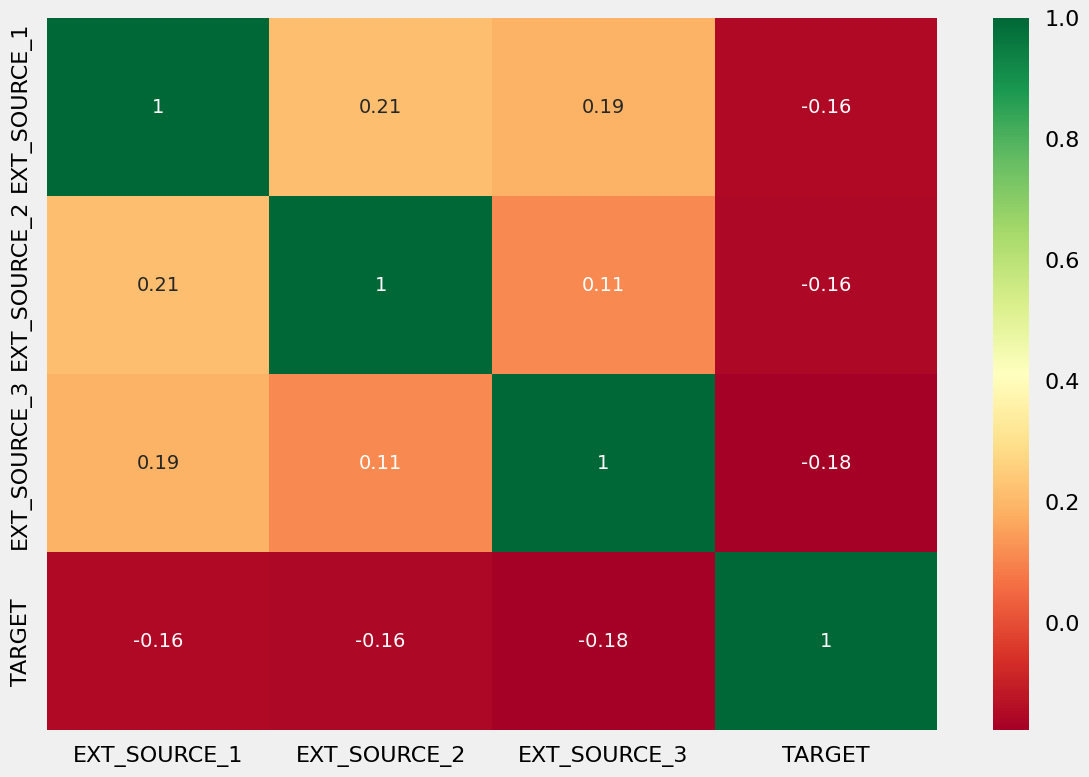

In [23]:
# Checking correlation of EXT_SOURCE_X columns vs TARGET column
Source = applicationDF[["EXT_SOURCE_1","EXT_SOURCE_2","EXT_SOURCE_3","TARGET"]]
source_corr = Source.corr()
ax = sns.heatmap(source_corr,
            xticklabels=source_corr.columns,
            yticklabels=source_corr.columns,
            annot = True,
            cmap ="RdYlGn")

<div class="alert alert-block alert-info">
    <span style='font-family:Georgia'>
        <b>Insight: </b> <br>Based on the above Heatmap, we can see there is almost no correlation between EXT_SOURCE_X columns and target column, thus we can drop these columns. EXT_SOURCE_1 has 56% null values, where as EXT_SOURCE_3 has close to 20% null values
    </span>    
</div>

In [24]:
# create a list of columns that needs to be dropped including the columns with >40% null values
Unwanted_application = nullcol_40_application["Column Name"].tolist()+ ['EXT_SOURCE_2','EXT_SOURCE_3']
# as EXT_SOURCE_1 column is already included in nullcol_40_application
len(Unwanted_application)

51

<h4>   
      <font color = darkgreen >
            <span style='font-family:Georgia'>
            4.2.2 Flag Document
            </span>   
        </font>    
</h4>

In [ ]:
# Checking the relevance of Flag_Document and whether it has any relation with loan repayment status
col_Doc = [ 'FLAG_DOCUMENT_2', 'FLAG_DOCUMENT_3','FLAG_DOCUMENT_4', 'FLAG_DOCUMENT_5', 'FLAG_DOCUMENT_6','FLAG_DOCUMENT_7',
           'FLAG_DOCUMENT_8', 'FLAG_DOCUMENT_9','FLAG_DOCUMENT_10', 'FLAG_DOCUMENT_11', 'FLAG_DOCUMENT_12','FLAG_DOCUMENT_13',
           'FLAG_DOCUMENT_14', 'FLAG_DOCUMENT_15','FLAG_DOCUMENT_16', 'FLAG_DOCUMENT_17', 'FLAG_DOCUMENT_18',
           'FLAG_DOCUMENT_19', 'FLAG_DOCUMENT_20', 'FLAG_DOCUMENT_21']
df_flag = applicationDF[col_Doc+["TARGET"]]

length = len(col_Doc)

df_flag["TARGET"] = df_flag["TARGET"].replace({1:"Defaulter",0:"Repayer"})

fig = plt.figure(figsize=(21,24))

for i,j in itertools.zip_longest(col_Doc,range(length)):
    plt.subplot(5,4,j+1)
    ax = sns.countplot(df_flag[i],palette=["r","g"])
    plt.yticks(fontsize=8)
    plt.xlabel("")
    plt.ylabel("")
    plt.title(i)

KeyboardInterrupt: 

Error in callback <function _draw_all_if_interactive at 0x7f10a6b753f0> (for post_execute):


KeyboardInterrupt: 

<div class="alert alert-block alert-info">
    <span style='font-family:Georgia'>
        <b>Insight: </b> <br>The above graph shows that in most of the loan application cases, clients who applied for loans has not submitted FLAG_DOCUMENT_X except FLAG_DOCUMENT_3. Thus, Except for FLAG_DOCUMENT_3, we can delete rest of the columns. Data shows if borrower has submitted FLAG_DOCUMENT_3 then there is a less chance of defaulting the loan.
    </span>    
</div>

In [27]:
# Including the flag documents for dropping the Document columns
col_Doc.remove('FLAG_DOCUMENT_3')
Unwanted_application = Unwanted_application + col_Doc
len(Unwanted_application)

70

<h4>   
      <font color = darkgreen >
            <span style='font-family:Georgia'>
            4.2.3 Contact Parameters
            </span>   
        </font>    
</h4>

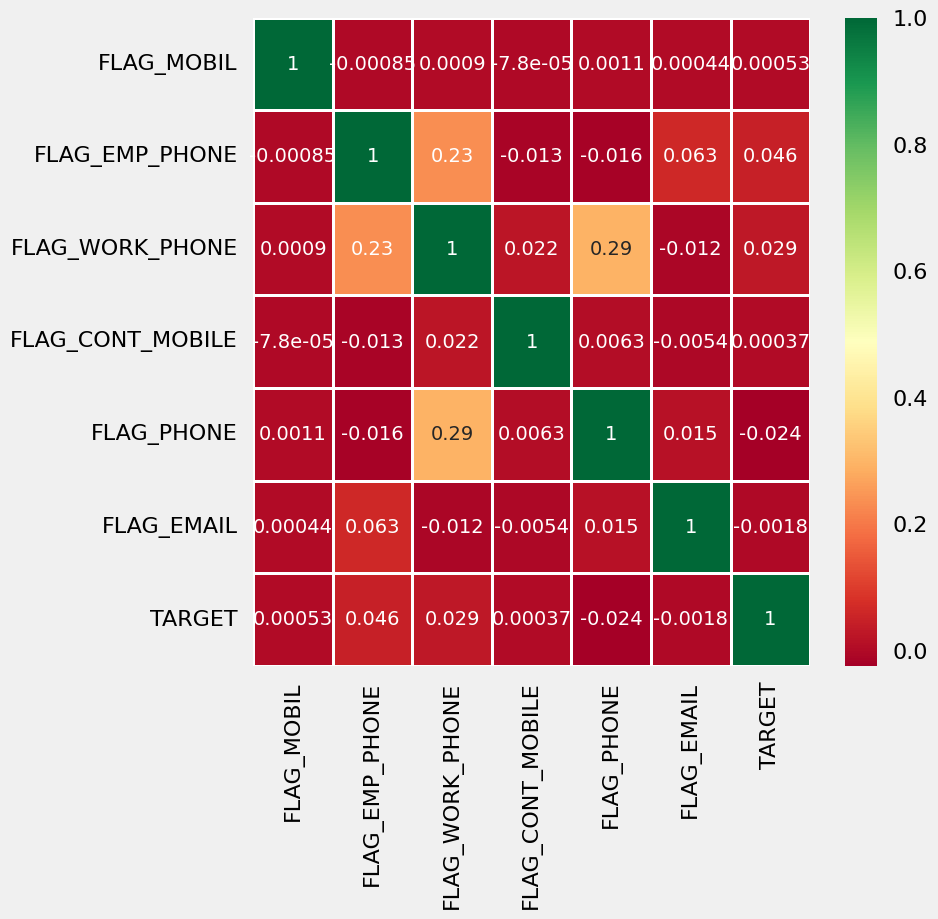

In [28]:
# checking is there is any correlation between mobile phone, work phone etc, email, Family members and Region rating
contact_col = ['FLAG_MOBIL', 'FLAG_EMP_PHONE', 'FLAG_WORK_PHONE', 'FLAG_CONT_MOBILE',
       'FLAG_PHONE', 'FLAG_EMAIL','TARGET']
Contact_corr = applicationDF[contact_col].corr()
fig = plt.figure(figsize=(8,8))
ax = sns.heatmap(Contact_corr,
            xticklabels=Contact_corr.columns,
            yticklabels=Contact_corr.columns,
            annot = True,
            cmap ="RdYlGn",
            linewidth=1)

<div class="alert alert-block alert-info">
    <span style='font-family:Georgia'>
        <b>Insight: </b><br>There is no correlation between flags of mobile phone, email etc with loan repayment; thus these columns can be deleted
    </span>    
</div>

In [29]:
# including the 6 FLAG columns to be deleted
contact_col.remove('TARGET')
Unwanted_application = Unwanted_application + contact_col
len(Unwanted_application)

76

<div class="alert alert-block alert-info">
    <span style='font-family:Georgia'>
        <b>Insight: </b><br>
        Total 76 columns can be deleted from applicationDF
    </span>    
</div>

In [30]:
# Dropping the unnecessary columns from applicationDF
applicationDF.drop(labels=Unwanted_application,axis=1,inplace=True)

In [31]:
# Inspecting the dataframe after removal of unnecessary columns
applicationDF.shape

(307511, 46)

In [32]:
# inspecting the column types after removal of unnecessary columns
applicationDF.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 46 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   SK_ID_CURR                   307511 non-null  int64  
 1   TARGET                       307511 non-null  int64  
 2   NAME_CONTRACT_TYPE           307511 non-null  object 
 3   CODE_GENDER                  307511 non-null  object 
 4   FLAG_OWN_CAR                 307511 non-null  object 
 5   FLAG_OWN_REALTY              307511 non-null  object 
 6   CNT_CHILDREN                 307511 non-null  int64  
 7   AMT_INCOME_TOTAL             307511 non-null  float64
 8   AMT_CREDIT                   307511 non-null  float64
 9   AMT_ANNUITY                  307499 non-null  float64
 10  AMT_GOODS_PRICE              307233 non-null  float64
 11  NAME_TYPE_SUITE              306219 non-null  object 
 12  NAME_INCOME_TYPE             307511 non-null  object 
 13 

<div class="alert alert-block alert-info">
    <span style='font-family:Georgia'>
        <b>Insight: </b><br>After deleting unnecessary columns, there are 46 columns remaining in applicationDF
    </span>    
</div>

<a id="clean2"></a>
<h3>   
      <font color = purple >
            <span style='font-family:Georgia'>
            4.3 Analyze & Delete Unnecessary Columns in previousDF
            </span>   
        </font>    
</h3>

In [33]:
# Getting the 11 columns which has more than 40% unknown
Unwanted_previous = nullcol_40_previous["Column Name"].tolist()
Unwanted_previous

['AMT_DOWN_PAYMENT',
 'RATE_DOWN_PAYMENT',
 'RATE_INTEREST_PRIMARY',
 'RATE_INTEREST_PRIVILEGED',
 'NAME_TYPE_SUITE']

In [34]:
# Listing down columns which are not needed
Unnecessary_previous = ['WEEKDAY_APPR_PROCESS_START','HOUR_APPR_PROCESS_START',
                        'FLAG_LAST_APPL_PER_CONTRACT','NFLAG_LAST_APPL_IN_DAY']

In [35]:
Unwanted_previous = Unwanted_previous + Unnecessary_previous
len(Unwanted_previous)

9

<div class="alert alert-block alert-info">
    <span style='font-family:Georgia'>
        <b>Insight: </b> <br>
        Total 15 columns can be deleted from previousDF
    </span>    
</div>

In [36]:
# Dropping the unnecessary columns from previous
previousDF.drop(labels=Unwanted_previous,axis=1,inplace=True)
# Inspecting the dataframe after removal of unnecessary columns
previousDF.shape

(72295, 28)

In [37]:
# inspecting the column types after after removal of unnecessary columns
previousDF.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 72295 entries, 0 to 72294
Data columns (total 28 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   SK_ID_PREV                 72295 non-null  int64  
 1   SK_ID_CURR                 72295 non-null  int64  
 2   NAME_CONTRACT_TYPE         72295 non-null  object 
 3   AMT_ANNUITY                56980 non-null  float64
 4   AMT_APPLICATION            72295 non-null  float64
 5   AMT_CREDIT                 72295 non-null  float64
 6   AMT_GOODS_PRICE            56728 non-null  float64
 7   NAME_CASH_LOAN_PURPOSE     72294 non-null  object 
 8   NAME_CONTRACT_STATUS       72294 non-null  object 
 9   DAYS_DECISION              72294 non-null  float64
 10  NAME_PAYMENT_TYPE          72294 non-null  object 
 11  CODE_REJECT_REASON         72294 non-null  object 
 12  NAME_CLIENT_TYPE           72294 non-null  object 
 13  NAME_GOODS_CATEGORY        72294 non-null  obj

<div class="alert alert-block alert-info">
    <span style='font-family:Georgia'>
        <b>Insight: </b><br>
        After deleting unnecessary columns, there are 22 columns remaining in applicationDF
    </span>    
</div>

<a id="stdval"></a>
<h3>   
      <font color = purple >
            <span style='font-family:Georgia'>
             4.4 Standardize Values
            </span>   
        </font>    
</h3>

<div class="alert alert-block alert-warning">
    <span style='font-family:Georgia'>
        <b>Strategy for applicationDF: </b>
        <ul>
            <li>Convert DAYS_DECISION,DAYS_EMPLOYED, DAYS_REGISTRATION,DAYS_ID_PUBLISH from negative to positive as days cannot be negative.</li>
            <li>Convert DAYS_BIRTH from negative to positive values and calculate age and create categorical bins columns</li>
            <li>Categorize the amount variables into bins</li>
            <li>Convert region rating column and few other columns to categorical</li>
        </ul>       
    </span>    
</div>

In [38]:
# Converting Negative days to positive days

date_col = ['DAYS_BIRTH','DAYS_EMPLOYED','DAYS_REGISTRATION','DAYS_ID_PUBLISH']

for col in date_col:
    applicationDF[col] = abs(applicationDF[col])

In [39]:
# Binning Numerical Columns to create a categorical column

# Creating bins for income amount
applicationDF['AMT_INCOME_TOTAL']=applicationDF['AMT_INCOME_TOTAL']/100000

bins = [0,1,2,3,4,5,6,7,8,9,10,11]
slot = ['0-100K','100K-200K', '200k-300k','300k-400k','400k-500k','500k-600k','600k-700k','700k-800k','800k-900k','900k-1M', '1M Above']

applicationDF['AMT_INCOME_RANGE']=pd.cut(applicationDF['AMT_INCOME_TOTAL'],bins,labels=slot)


In [40]:
applicationDF['AMT_INCOME_RANGE'].value_counts(normalize=True)*100

AMT_INCOME_RANGE
100K-200K    50.735000
200k-300k    21.210691
0-100K       20.729695
300k-400k     4.776116
400k-500k     1.744669
500k-600k     0.356354
600k-700k     0.282805
800k-900k     0.096980
700k-800k     0.052721
900k-1M       0.009112
1M Above      0.005858
Name: proportion, dtype: float64

<div class="alert alert-block alert-info">
    <span style='font-family:Georgia'>
        <b>Insight: </b> <br>More than 50% loan applicants  have income amount in the range of 100K-200K. Almost 92% loan applicants have income less than 300K
    </span>    
</div>

In [41]:
# Creating bins for Credit amount
applicationDF['AMT_CREDIT']=applicationDF['AMT_CREDIT']/100000

bins = [0,1,2,3,4,5,6,7,8,9,10,100]
slots = ['0-100K','100K-200K', '200k-300k','300k-400k','400k-500k','500k-600k','600k-700k','700k-800k',
       '800k-900k','900k-1M', '1M Above']

applicationDF['AMT_CREDIT_RANGE']=pd.cut(applicationDF['AMT_CREDIT'],bins=bins,labels=slots)

In [42]:
#checking the binning of data and % of data in each category
applicationDF['AMT_CREDIT_RANGE'].value_counts(normalize=True)*100

AMT_CREDIT_RANGE
200k-300k    17.824728
1M Above     16.254703
500k-600k    11.131960
400k-500k    10.418489
100K-200K     9.801275
300k-400k     8.564897
600k-700k     7.820533
800k-900k     7.086576
700k-800k     6.241403
900k-1M       2.902986
0-100K        1.952450
Name: proportion, dtype: float64

<div class="alert alert-block alert-info">
    <span style='font-family:Georgia'>
        <b>Insight: </b> <br>More Than 16% loan applicants have taken loan which amounts to more than 1M.
    </span>    
</div>

In [43]:
# Creating bins for Age
applicationDF['AGE'] = applicationDF['DAYS_BIRTH'] // 365
bins = [0,20,30,40,50,100]
slots = ['0-20','20-30','30-40','40-50','50 above']

applicationDF['AGE_GROUP']=pd.cut(applicationDF['AGE'],bins=bins,labels=slots)

In [44]:
#checking the binning of data and % of data in each category
applicationDF['AGE_GROUP'].value_counts(normalize=True)*100

AGE_GROUP
50 above    31.604398
30-40       27.028952
40-50       24.194582
20-30       17.171743
0-20         0.000325
Name: proportion, dtype: float64

<div class="alert alert-block alert-info">
    <span style='font-family:Georgia'>
        <b>Insight: </b> <br>31% loan applicants have age above 50 years. More than 55% of loan applicants have age over 40 years.
    </span>    
</div>

In [45]:
# Creating bins for Employement Time
applicationDF['YEARS_EMPLOYED'] = applicationDF['DAYS_EMPLOYED'] // 365
bins = [0,5,10,20,30,40,50,60,150]
slots = ['0-5','5-10','10-20','20-30','30-40','40-50','50-60','60 above']

applicationDF['EMPLOYMENT_YEAR']=pd.cut(applicationDF['YEARS_EMPLOYED'],bins=bins,labels=slots)

In [46]:
#checking the binning of data and % of data in each category
applicationDF['EMPLOYMENT_YEAR'].value_counts(normalize=True)*100

EMPLOYMENT_YEAR
0-5         55.582363
5-10        24.966441
10-20       14.564315
20-30        3.750117
30-40        1.058720
40-50        0.078044
50-60        0.000000
60 above     0.000000
Name: proportion, dtype: float64

**<div class="alert alert-block alert-info">
    <span style='font-family:Georgia'>
        <b>Insight: </b> <br>More than 55% of the loan applicants have work experience within 0-5 years and almost 80% of them have less than 10 years of work experience
    </span>    
</div>

In [47]:
#Checking the number of unique values each column possess to identify categorical columns
applicationDF.nunique().sort_values()

LIVE_CITY_NOT_WORK_CITY             2
TARGET                              2
NAME_CONTRACT_TYPE                  2
REG_REGION_NOT_LIVE_REGION          2
FLAG_OWN_CAR                        2
FLAG_OWN_REALTY                     2
REG_REGION_NOT_WORK_REGION          2
LIVE_REGION_NOT_WORK_REGION         2
FLAG_DOCUMENT_3                     2
REG_CITY_NOT_LIVE_CITY              2
REG_CITY_NOT_WORK_CITY              2
REGION_RATING_CLIENT                3
CODE_GENDER                         3
REGION_RATING_CLIENT_W_CITY         3
AMT_REQ_CREDIT_BUREAU_HOUR          5
NAME_EDUCATION_TYPE                 5
AGE_GROUP                           5
NAME_FAMILY_STATUS                  6
NAME_HOUSING_TYPE                   6
EMPLOYMENT_YEAR                     6
WEEKDAY_APPR_PROCESS_START          7
NAME_TYPE_SUITE                     7
NAME_INCOME_TYPE                    8
AMT_REQ_CREDIT_BUREAU_WEEK          9
AMT_REQ_CREDIT_BUREAU_DAY           9
DEF_60_CNT_SOCIAL_CIRCLE            9
DEF_30_CNT_SOCIAL_CIRCLE           10
AMT_CREDIT_RANGE                   11
AMT_INCOME_RANGE                   11
AMT_REQ_CREDIT_BUREAU_QRT          11
CNT_CHILDREN                       15
CNT_FAM_MEMBERS                    17
OCCUPATION_TYPE                    18
HOUR_APPR_PROCESS_START            24
AMT_REQ_CREDIT_BUREAU_MON          24
AMT_REQ_CREDIT_BUREAU_YEAR         25
OBS_60_CNT_SOCIAL_CIRCLE           33
OBS_30_CNT_SOCIAL_CIRCLE           33
AGE                                50
YEARS_EMPLOYED                     51
ORGANIZATION_TYPE                  58
REGION_POPULATION_RELATIVE         81
AMT_GOODS_PRICE                  1002
AMT_INCOME_TOTAL                 2548
DAYS_LAST_PHONE_CHANGE           3773
AMT_CREDIT                       5603
DAYS_ID_PUBLISH                  6168
DAYS_EMPLOYED                   12574
AMT_ANNUITY                     13672
DAYS_REGISTRATION               15688
DAYS_BIRTH                      17460
SK_ID_CURR                     307511
dtype: int64

<a id="dconv"></a>
<h3>   
      <font color = purple >
            <span style='font-family:Georgia'>
             4.5 Data Type Conversion
            </span>   
        </font>    
</h3>

In [48]:
# inspecting the column types if they are in correct data type using the above result.
applicationDF.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 52 columns):
 #   Column                       Non-Null Count   Dtype   
---  ------                       --------------   -----   
 0   SK_ID_CURR                   307511 non-null  int64   
 1   TARGET                       307511 non-null  int64   
 2   NAME_CONTRACT_TYPE           307511 non-null  object  
 3   CODE_GENDER                  307511 non-null  object  
 4   FLAG_OWN_CAR                 307511 non-null  object  
 5   FLAG_OWN_REALTY              307511 non-null  object  
 6   CNT_CHILDREN                 307511 non-null  int64   
 7   AMT_INCOME_TOTAL             307511 non-null  float64 
 8   AMT_CREDIT                   307511 non-null  float64 
 9   AMT_ANNUITY                  307499 non-null  float64 
 10  AMT_GOODS_PRICE              307233 non-null  float64 
 11  NAME_TYPE_SUITE              306219 non-null  object  
 12  NAME_INCOME_TYPE             307511 non-null

<div class="alert alert-block alert-info">
    <span style='font-family:Georgia'>
        <b>Insight: </b><br>Numeric columns are already in int64 and float64 format. Hence proceeding with other columns.
    </span>    
</div>

In [50]:
#Conversion of Object and Numerical columns to Categorical Columns
categorical_columns = ['NAME_CONTRACT_TYPE','CODE_GENDER','NAME_TYPE_SUITE','NAME_INCOME_TYPE','NAME_EDUCATION_TYPE',
                       'NAME_FAMILY_STATUS','NAME_HOUSING_TYPE','OCCUPATION_TYPE','WEEKDAY_APPR_PROCESS_START',
                       'ORGANIZATION_TYPE','FLAG_OWN_CAR','FLAG_OWN_REALTY','LIVE_CITY_NOT_WORK_CITY',
                       'REG_CITY_NOT_LIVE_CITY','REG_CITY_NOT_WORK_CITY','REG_REGION_NOT_WORK_REGION',
                       'LIVE_REGION_NOT_WORK_REGION','REGION_RATING_CLIENT','WEEKDAY_APPR_PROCESS_START',
                       'REGION_RATING_CLIENT_W_CITY'
                      ]
for col in categorical_columns:
    applicationDF[col] =pd.Categorical(applicationDF[col])

In [49]:
# inspecting the column types if the above conversion is reflected
applicationDF.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 52 columns):
 #   Column                       Non-Null Count   Dtype   
---  ------                       --------------   -----   
 0   SK_ID_CURR                   307511 non-null  int64   
 1   TARGET                       307511 non-null  int64   
 2   NAME_CONTRACT_TYPE           307511 non-null  object  
 3   CODE_GENDER                  307511 non-null  object  
 4   FLAG_OWN_CAR                 307511 non-null  object  
 5   FLAG_OWN_REALTY              307511 non-null  object  
 6   CNT_CHILDREN                 307511 non-null  int64   
 7   AMT_INCOME_TOTAL             307511 non-null  float64 
 8   AMT_CREDIT                   307511 non-null  float64 
 9   AMT_ANNUITY                  307499 non-null  float64 
 10  AMT_GOODS_PRICE              307233 non-null  float64 
 11  NAME_TYPE_SUITE              306219 non-null  object  
 12  NAME_INCOME_TYPE             307511 non-null

<h4>   
      <font color = darkgreen >
            <span style='font-family:Georgia'>
             4.4.2 Standardize Values for previousDF
            </span>   
        </font>    
</h4>

<div class="alert alert-block alert-warning">
    <span style='font-family:Georgia'>
        <b>Strategy for previousDF: </b>
        <ul>
            <li>Convert DAYS_DECISION from negative to positive values and create categorical bins columns.</li>
            <li>Convert loan purpose and few other columns to categorical.</li>
        </ul>
    </span>    
</div>

In [51]:
#Checking the number of unique values each column possess to identify categorical columns
previousDF.nunique().sort_values()

NFLAG_INSURED_ON_APPROVAL        2
NAME_PRODUCT_TYPE                3
NAME_CONTRACT_TYPE               4
NAME_CONTRACT_STATUS             4
NAME_PAYMENT_TYPE                4
NAME_CLIENT_TYPE                 4
NAME_YIELD_GROUP                 5
NAME_PORTFOLIO                   5
CHANNEL_TYPE                     8
CODE_REJECT_REASON               9
NAME_SELLER_INDUSTRY            11
PRODUCT_COMBINATION             17
NAME_CASH_LOAN_PURPOSE          24
NAME_GOODS_CATEGORY             26
CNT_PAYMENT                     31
SELLERPLACE_AREA              1310
DAYS_FIRST_DRAWING            1347
DAYS_TERMINATION              2729
DAYS_LAST_DUE                 2784
DAYS_FIRST_DUE                2891
DAYS_DECISION                 2920
DAYS_LAST_DUE_1ST_VERSION     4211
AMT_GOODS_PRICE              17547
AMT_APPLICATION              17547
AMT_CREDIT                   23870
AMT_ANNUITY                  39538
SK_ID_CURR                   61229
SK_ID_PREV                   72295
dtype: int64

In [52]:
# inspecting the column types if the above conversion is reflected
previousDF.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 72295 entries, 0 to 72294
Data columns (total 28 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   SK_ID_PREV                 72295 non-null  int64  
 1   SK_ID_CURR                 72295 non-null  int64  
 2   NAME_CONTRACT_TYPE         72295 non-null  object 
 3   AMT_ANNUITY                56980 non-null  float64
 4   AMT_APPLICATION            72295 non-null  float64
 5   AMT_CREDIT                 72295 non-null  float64
 6   AMT_GOODS_PRICE            56728 non-null  float64
 7   NAME_CASH_LOAN_PURPOSE     72294 non-null  object 
 8   NAME_CONTRACT_STATUS       72294 non-null  object 
 9   DAYS_DECISION              72294 non-null  float64
 10  NAME_PAYMENT_TYPE          72294 non-null  object 
 11  CODE_REJECT_REASON         72294 non-null  object 
 12  NAME_CLIENT_TYPE           72294 non-null  object 
 13  NAME_GOODS_CATEGORY        72294 non-null  obj

In [53]:
#Converting negative days to positive days
previousDF['DAYS_DECISION'] = abs(previousDF['DAYS_DECISION'])

In [54]:
#age group calculation e.g. 388 will be grouped as 300-400
previousDF['DAYS_DECISION_GROUP'] = (previousDF['DAYS_DECISION']-(previousDF['DAYS_DECISION'] % 400)).astype(str)+'-'+ ((previousDF['DAYS_DECISION'] - (previousDF['DAYS_DECISION'] % 400)) + (previousDF['DAYS_DECISION'] % 400) + (400 - (previousDF['DAYS_DECISION'] % 400))).astype(str)


In [55]:
previousDF['DAYS_DECISION_GROUP'].value_counts(normalize=True)*100

DAYS_DECISION_GROUP
0.0-400.0        36.156027
400.0-800.0      23.466353
800.0-1200.0     12.496023
1200.0-1600.0     7.858081
2400.0-2800.0     6.643613
1600.0-2000.0     5.960302
2000.0-2400.0     5.927104
2800.0-3200.0     1.491113
nan-nan           0.001383
Name: proportion, dtype: float64

<div class="alert alert-block alert-info">
    <span style='font-family:Georgia'>
        <b>Insight: </b> <br>Almost 37% loan applicatants have applied for a new loan within 0-400 days of previous loan decision
    </span>    
</div>

In [56]:
#Converting Categorical columns from Object to categorical
Catgorical_col_p = ['NAME_CASH_LOAN_PURPOSE','NAME_CONTRACT_STATUS','NAME_PAYMENT_TYPE',
                    'CODE_REJECT_REASON','NAME_CLIENT_TYPE','NAME_GOODS_CATEGORY','NAME_PORTFOLIO',
                   'NAME_PRODUCT_TYPE','CHANNEL_TYPE','NAME_SELLER_INDUSTRY','NAME_YIELD_GROUP','PRODUCT_COMBINATION',
                    'NAME_CONTRACT_TYPE','DAYS_DECISION_GROUP']

for col in Catgorical_col_p:
    previousDF[col] =pd.Categorical(previousDF[col])

In [57]:
# inspecting the column types after conversion
previousDF.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 72295 entries, 0 to 72294
Data columns (total 29 columns):
 #   Column                     Non-Null Count  Dtype   
---  ------                     --------------  -----   
 0   SK_ID_PREV                 72295 non-null  int64   
 1   SK_ID_CURR                 72295 non-null  int64   
 2   NAME_CONTRACT_TYPE         72295 non-null  category
 3   AMT_ANNUITY                56980 non-null  float64 
 4   AMT_APPLICATION            72295 non-null  float64 
 5   AMT_CREDIT                 72295 non-null  float64 
 6   AMT_GOODS_PRICE            56728 non-null  float64 
 7   NAME_CASH_LOAN_PURPOSE     72294 non-null  category
 8   NAME_CONTRACT_STATUS       72294 non-null  category
 9   DAYS_DECISION              72294 non-null  float64 
 10  NAME_PAYMENT_TYPE          72294 non-null  category
 11  CODE_REJECT_REASON         72294 non-null  category
 12  NAME_CLIENT_TYPE           72294 non-null  category
 13  NAME_GOODS_CATEGORY        7229

<a id="impute"></a>
<h3>   
      <font color = purple >
            <span style='font-family:Georgia'>
             4.6 Null Value Data Imputation
            </span>   
        </font>    
</h3>

<h4>   
      <font color = darkgreen >
            <span style='font-family:Georgia'>
             4.6.1 Imputing Null Values in applicationDF
            </span>   
        </font>    
</h4>

<div class="alert alert-block alert-warning">
    <span style='font-family:Georgia'>
        <b>Strategy for applicationDF: </b>
        <ul>
            <li>To impute null values in categorical variables which has lower null percentage, mode() is used to impute the most frequent items.</li>
            <li>To impute null values in categorical variables which has higher null percentage, a new category is created.</li>
            <li>To impute null values in numerical variables which has lower null percentage, median() is used as </li>
            <ul>
                <li>There are no outliers in the columns</li>
                <li>Mean returned decimal values and median returned whole numbers and the columns were number of requests</li>
            </ul>        
        </ul>
    </span>    
</div>

In [58]:
# checking the null value % of each column in applicationDF dataframe
round(applicationDF.isnull().sum() / applicationDF.shape[0] * 100.00,2)


SK_ID_CURR                      0.00
TARGET                          0.00
NAME_CONTRACT_TYPE              0.00
CODE_GENDER                     0.00
FLAG_OWN_CAR                    0.00
FLAG_OWN_REALTY                 0.00
CNT_CHILDREN                    0.00
AMT_INCOME_TOTAL                0.00
AMT_CREDIT                      0.00
AMT_ANNUITY                     0.00
AMT_GOODS_PRICE                 0.09
NAME_TYPE_SUITE                 0.42
NAME_INCOME_TYPE                0.00
NAME_EDUCATION_TYPE             0.00
NAME_FAMILY_STATUS              0.00
NAME_HOUSING_TYPE               0.00
REGION_POPULATION_RELATIVE      0.00
DAYS_BIRTH                      0.00
DAYS_EMPLOYED                   0.00
DAYS_REGISTRATION               0.00
DAYS_ID_PUBLISH                 0.00
OCCUPATION_TYPE                31.35
CNT_FAM_MEMBERS                 0.00
REGION_RATING_CLIENT            0.00
REGION_RATING_CLIENT_W_CITY     0.00
WEEKDAY_APPR_PROCESS_START      0.00
HOUR_APPR_PROCESS_START         0.00
REG_REGION_NOT_LIVE_REGION      0.00
REG_REGION_NOT_WORK_REGION      0.00
LIVE_REGION_NOT_WORK_REGION     0.00
REG_CITY_NOT_LIVE_CITY          0.00
REG_CITY_NOT_WORK_CITY          0.00
LIVE_CITY_NOT_WORK_CITY         0.00
ORGANIZATION_TYPE               0.00
OBS_30_CNT_SOCIAL_CIRCLE        0.33
DEF_30_CNT_SOCIAL_CIRCLE        0.33
OBS_60_CNT_SOCIAL_CIRCLE        0.33
DEF_60_CNT_SOCIAL_CIRCLE        0.33
DAYS_LAST_PHONE_CHANGE          0.00
FLAG_DOCUMENT_3                 0.00
AMT_REQ_CREDIT_BUREAU_HOUR     13.50
AMT_REQ_CREDIT_BUREAU_DAY      13.50
AMT_REQ_CREDIT_BUREAU_WEEK     13.50
AMT_REQ_CREDIT_BUREAU_MON      13.50
AMT_REQ_CREDIT_BUREAU_QRT      13.50
AMT_REQ_CREDIT_BUREAU_YEAR     13.50
AMT_INCOME_RANGE                0.08
AMT_CREDIT_RANGE                0.00
AGE                             0.00
AGE_GROUP                       0.00
YEARS_EMPLOYED                  0.00
EMPLOYMENT_YEAR                27.08
dtype: float64

<p>
    <span style='font-family:Georgia'>
           Impute categorical variable 'NAME_TYPE_SUITE' which has lower null percentage(0.42%) with the most frequent category using mode()[0]:
    </span>
</p>

    

In [59]:
applicationDF['NAME_TYPE_SUITE'].describe()

count            306219
unique                7
top       Unaccompanied
freq             248526
Name: NAME_TYPE_SUITE, dtype: object

In [60]:
applicationDF['NAME_TYPE_SUITE'].fillna((applicationDF['NAME_TYPE_SUITE'].mode()[0]),inplace = True)

<p>
    <span style='font-family:Georgia'>
           Impute categorical variable 'OCCUPATION_TYPE' which has higher null percentage(31.35%) with a new category as assigning to any existing category might influence the analysis:
    </span>
</p>

    

In [61]:

applicationDF['OCCUPATION_TYPE'] = applicationDF['OCCUPATION_TYPE'].cat.add_categories('Unknown')
applicationDF['OCCUPATION_TYPE'].fillna('Unknown', inplace =True)

<p>
    <span style='font-family:Georgia'>
           Impute numerical variables with the median as there are no outliers that can be seen from results of describe() and mean() returns decimal values and these columns represent number of enquiries made which cannot be decimal:
    </span>
</p>
    

In [62]:
applicationDF[['AMT_REQ_CREDIT_BUREAU_HOUR','AMT_REQ_CREDIT_BUREAU_DAY',
               'AMT_REQ_CREDIT_BUREAU_WEEK','AMT_REQ_CREDIT_BUREAU_MON',
               'AMT_REQ_CREDIT_BUREAU_QRT','AMT_REQ_CREDIT_BUREAU_YEAR']].describe()

AMT_REQ_CREDIT_BUREAU_HOUR  AMT_REQ_CREDIT_BUREAU_DAY  AMT_REQ_CREDIT_BUREAU_WEEK  AMT_REQ_CREDIT_BUREAU_MON  AMT_REQ_CREDIT_BUREAU_QRT  AMT_REQ_CREDIT_BUREAU_YEAR
count               265992.000000              265992.000000               265992.000000              265992.000000              265992.000000               265992.000000
mean                     0.006402                   0.007000                    0.034362                   0.267395                   0.265474                    1.899974
std                      0.083849                   0.110757                    0.204685                   0.916002                   0.794056                    1.869295
min                      0.000000                   0.000000                    0.000000                   0.000000                   0.000000                    0.000000
25%                      0.000000                   0.000000                    0.000000                   0.000000                   0.000000                    0.000000
50%                      0.000000                   0.000000                    0.000000                   0.000000                   0.000000                    1.000000
75%                      0.000000                   0.000000                    0.000000                   0.000000                   0.000000                    3.000000
max                      4.000000                   9.000000                    8.000000                  27.000000                 261.000000                   25.000000

<p>
    <span style='font-family:Georgia'>
           Impute with median as mean has decimals and this is number of requests
    </span>
</p>

In [63]:
amount = ['AMT_REQ_CREDIT_BUREAU_HOUR', 'AMT_REQ_CREDIT_BUREAU_DAY','AMT_REQ_CREDIT_BUREAU_WEEK','AMT_REQ_CREDIT_BUREAU_MON',
         'AMT_REQ_CREDIT_BUREAU_QRT','AMT_REQ_CREDIT_BUREAU_YEAR']

for col in amount:
    applicationDF[col].fillna(applicationDF[col].median(),inplace = True)

In [64]:
# checking the null value % of each column in previousDF dataframe
round(applicationDF.isnull().sum() / previousDF.shape[0] * 100.00,2)

SK_ID_CURR                       0.00
TARGET                           0.00
NAME_CONTRACT_TYPE               0.00
CODE_GENDER                      0.00
FLAG_OWN_CAR                     0.00
FLAG_OWN_REALTY                  0.00
CNT_CHILDREN                     0.00
AMT_INCOME_TOTAL                 0.00
AMT_CREDIT                       0.00
AMT_ANNUITY                      0.02
AMT_GOODS_PRICE                  0.38
NAME_TYPE_SUITE                  0.00
NAME_INCOME_TYPE                 0.00
NAME_EDUCATION_TYPE              0.00
NAME_FAMILY_STATUS               0.00
NAME_HOUSING_TYPE                0.00
REGION_POPULATION_RELATIVE       0.00
DAYS_BIRTH                       0.00
DAYS_EMPLOYED                    0.00
DAYS_REGISTRATION                0.00
DAYS_ID_PUBLISH                  0.00
OCCUPATION_TYPE                  0.00
CNT_FAM_MEMBERS                  0.00
REGION_RATING_CLIENT             0.00
REGION_RATING_CLIENT_W_CITY      0.00
WEEKDAY_APPR_PROCESS_START       0.00
HOUR_APPR_PROCESS_START          0.00
REG_REGION_NOT_LIVE_REGION       0.00
REG_REGION_NOT_WORK_REGION       0.00
LIVE_REGION_NOT_WORK_REGION      0.00
REG_CITY_NOT_LIVE_CITY           0.00
REG_CITY_NOT_WORK_CITY           0.00
LIVE_CITY_NOT_WORK_CITY          0.00
ORGANIZATION_TYPE                0.00
OBS_30_CNT_SOCIAL_CIRCLE         1.41
DEF_30_CNT_SOCIAL_CIRCLE         1.41
OBS_60_CNT_SOCIAL_CIRCLE         1.41
DEF_60_CNT_SOCIAL_CIRCLE         1.41
DAYS_LAST_PHONE_CHANGE           0.00
FLAG_DOCUMENT_3                  0.00
AMT_REQ_CREDIT_BUREAU_HOUR       0.00
AMT_REQ_CREDIT_BUREAU_DAY        0.00
AMT_REQ_CREDIT_BUREAU_WEEK       0.00
AMT_REQ_CREDIT_BUREAU_MON        0.00
AMT_REQ_CREDIT_BUREAU_QRT        0.00
AMT_REQ_CREDIT_BUREAU_YEAR       0.00
AMT_INCOME_RANGE                 0.32
AMT_CREDIT_RANGE                 0.00
AGE                              0.00
AGE_GROUP                        0.00
YEARS_EMPLOYED                   0.00
EMPLOYMENT_YEAR                115.19
dtype: float64

<div class="alert alert-block alert-info">
    <span style='font-family:Georgia'>
        <b>Insight: </b> <br> We still have few null values in the columns: AMT_GOODS_PRICE, OBS_30_CNT_SOCIAL_CIRCLE, DEF_30_CNT_SOCIAL_CIRCLE, OBS_60_CNT_SOCIAL_CIRCLE, DEF_60_CNT_SOCIAL_CIRCLE. We can ignore as this percentage is very less.
    </span>    
</div>

> <h4>   
      <font color = darkgreen >
            <span style='font-family:Georgia'>
             4.6.2 Imputing Null Values in previousDF
            </span>   
        </font>    
</h4>

<div class="alert alert-block alert-warning">
    <span style='font-family:Georgia'>
        <b>Strategy for applicationDF: </b>
        <ul>
            <li>To impute null values in numerical column, we analysed the loan status and assigned values.</li>
            <li>To impute null values in continuous variables, we plotted the distribution of the columns and used </li>
            <ul>
                <li>median if the distribution is skewed</li>
                <li>mode if the distribution pattern is preserved.</li>
            </ul>        
        </ul>
    </span>    
</div>

In [65]:
# checking the null value % of each column in previousDF dataframe

round(previousDF.isnull().sum() / previousDF.shape[0] * 100.00,2)

SK_ID_PREV                    0.00
SK_ID_CURR                    0.00
NAME_CONTRACT_TYPE            0.00
AMT_ANNUITY                  21.18
AMT_APPLICATION               0.00
AMT_CREDIT                    0.00
AMT_GOODS_PRICE              21.53
NAME_CASH_LOAN_PURPOSE        0.00
NAME_CONTRACT_STATUS          0.00
DAYS_DECISION                 0.00
NAME_PAYMENT_TYPE             0.00
CODE_REJECT_REASON            0.00
NAME_CLIENT_TYPE              0.00
NAME_GOODS_CATEGORY           0.00
NAME_PORTFOLIO                0.00
NAME_PRODUCT_TYPE             0.00
CHANNEL_TYPE                  0.00
SELLERPLACE_AREA              0.00
NAME_SELLER_INDUSTRY          0.00
CNT_PAYMENT                  21.19
NAME_YIELD_GROUP              0.00
PRODUCT_COMBINATION           0.02
DAYS_FIRST_DRAWING           38.20
DAYS_FIRST_DUE               38.20
DAYS_LAST_DUE_1ST_VERSION    38.20
DAYS_LAST_DUE                38.20
DAYS_TERMINATION             38.20
NFLAG_INSURED_ON_APPROVAL    38.20
DAYS_DECISION_GROUP           0.00
dtype: float64

<p>
    <span style='font-family:Georgia'>
           Impute AMT_ANNUITY with median as the distribution is greatly skewed:
    </span>
</p>

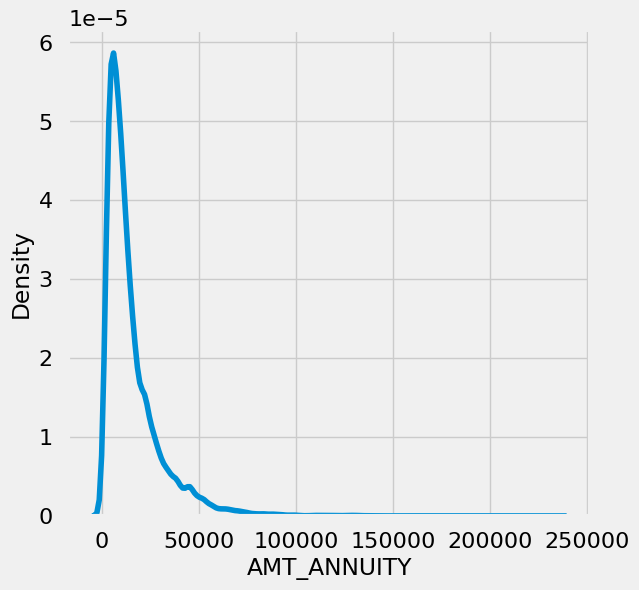

In [66]:
plt.figure(figsize=(6,6))
sns.kdeplot(previousDF['AMT_ANNUITY'])
plt.show()

<div class="alert alert-block alert-info">
    <span style='font-family:Georgia'>
        <b>Insight: </b> <br>There is a single peak at the left side of the distribution and it indicates the presence of outliers and hence imputing with mean would not be the right approach and hence imputing with median.
    </span>    
</div>

In [67]:
previousDF['AMT_ANNUITY'].fillna(previousDF['AMT_ANNUITY'].median(),inplace = True)

<p>
    <span style='font-family:Georgia'>
           Impute AMT_GOODS_PRICE with mode as the distribution is closely similar:
    </span>
</p>

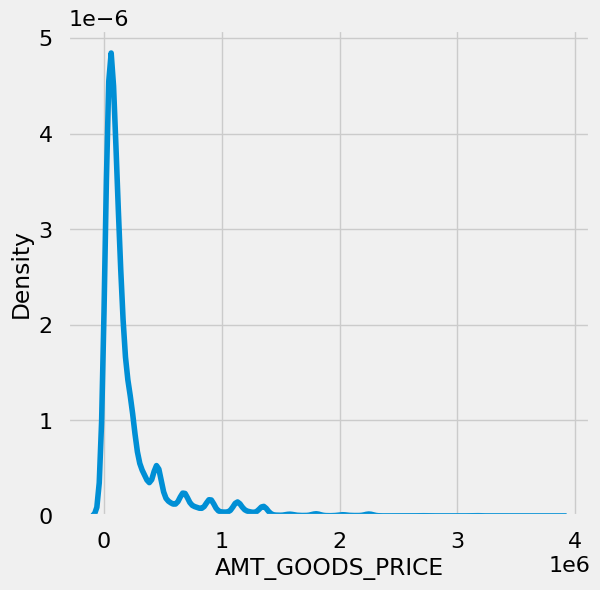

In [68]:
plt.figure(figsize=(6,6))
sns.kdeplot(previousDF['AMT_GOODS_PRICE'][pd.notnull(previousDF['AMT_GOODS_PRICE'])])
plt.show()

<p>
    <span style='font-family:Georgia'>
           There are several peaks along the distribution. Let's impute using the mode, mean and median and see if the distribution is still about the same.
    </span>
</p>

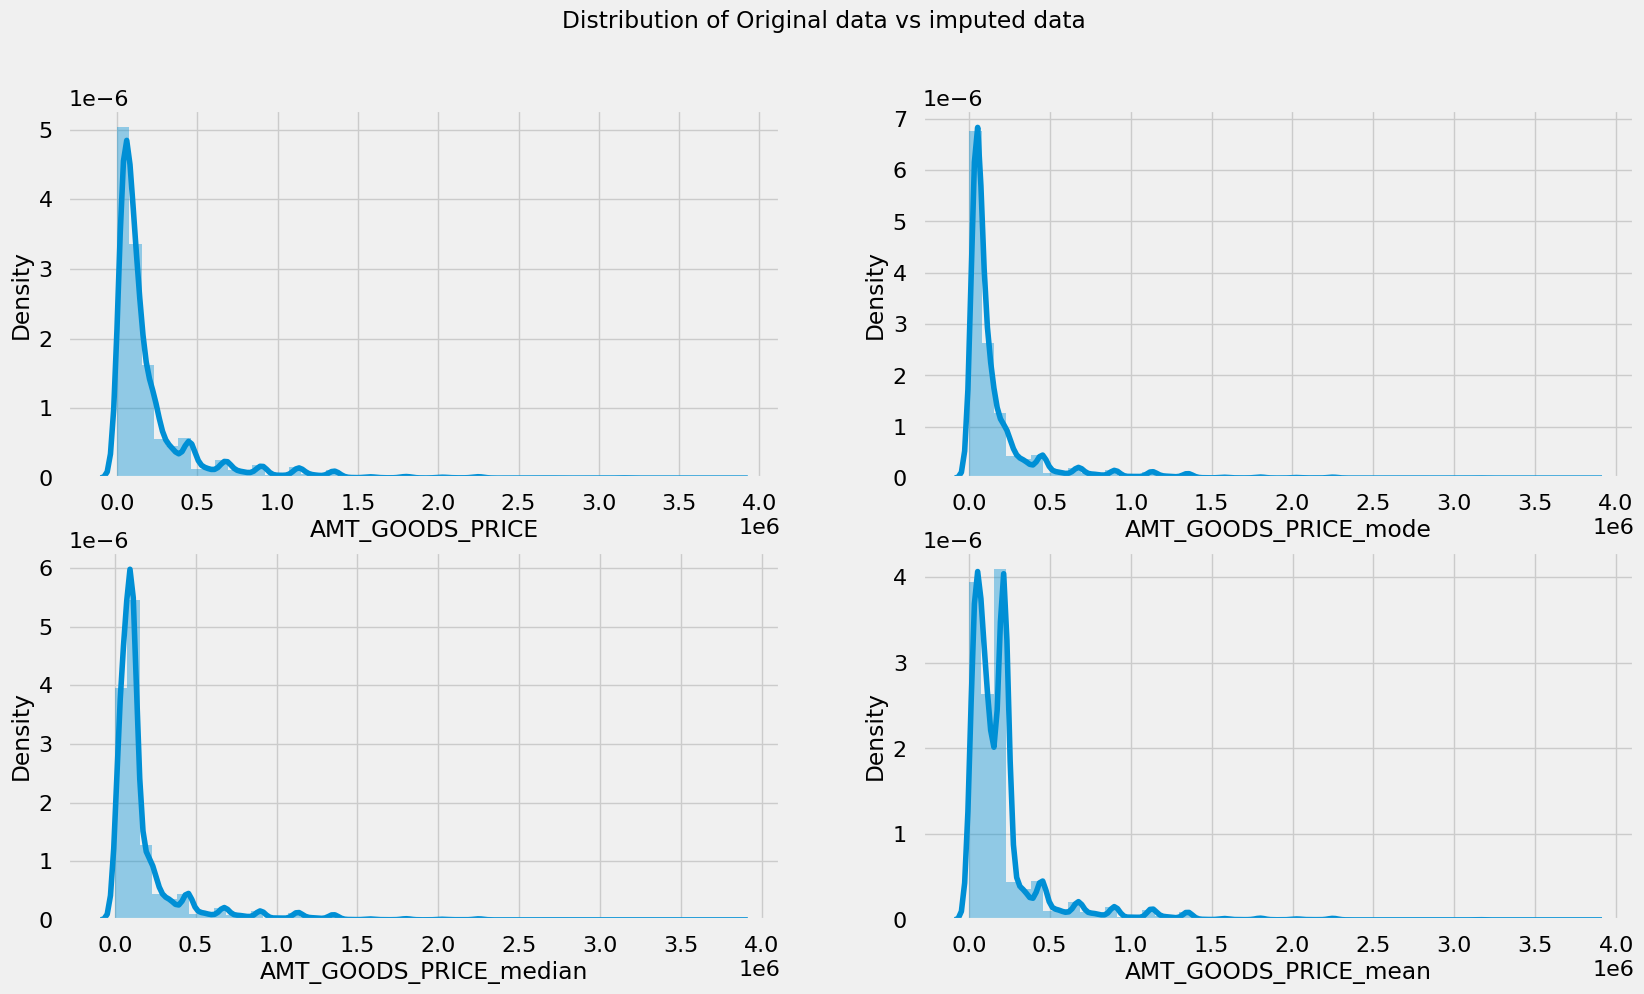

In [69]:
statsDF = pd.DataFrame() # new dataframe with columns imputed with mode, median and mean
statsDF['AMT_GOODS_PRICE_mode'] = previousDF['AMT_GOODS_PRICE'].fillna(previousDF['AMT_GOODS_PRICE'].mode()[0])
statsDF['AMT_GOODS_PRICE_median'] = previousDF['AMT_GOODS_PRICE'].fillna(previousDF['AMT_GOODS_PRICE'].median())
statsDF['AMT_GOODS_PRICE_mean'] = previousDF['AMT_GOODS_PRICE'].fillna(previousDF['AMT_GOODS_PRICE'].mean())

cols = ['AMT_GOODS_PRICE_mode', 'AMT_GOODS_PRICE_median','AMT_GOODS_PRICE_mean']

plt.figure(figsize=(18,10))
plt.suptitle('Distribution of Original data vs imputed data')
plt.subplot(221)
sns.distplot(previousDF['AMT_GOODS_PRICE'][pd.notnull(previousDF['AMT_GOODS_PRICE'])]);
for i in enumerate(cols):
    plt.subplot(2,2,i[0]+2)
    sns.distplot(statsDF[i[1]])

<div class="alert alert-block alert-info">
    <span style='font-family:Georgia'>
        <b>Insight: </b> <br>The original distribution is closer with the distribution of data imputed with mode in this case
    </span>    
</div>

In [70]:
previousDF['AMT_GOODS_PRICE'].fillna(previousDF['AMT_GOODS_PRICE'].mode()[0], inplace=True)

<p>
    <span style='font-family:Georgia'>
           Impute CNT_PAYMENT with 0 as the NAME_CONTRACT_STATUS for these indicate that most of these loans were not started:
    </span>
</p>

In [71]:
previousDF.loc[previousDF['CNT_PAYMENT'].isnull(),'NAME_CONTRACT_STATUS'].value_counts()

NAME_CONTRACT_STATUS
Canceled        12350
Refused          1789
Unused offer     1176
Approved            0
Name: count, dtype: int64

In [72]:
previousDF['CNT_PAYMENT'].fillna(0,inplace = True)

In [73]:
# checking the null value % of each column in previousDF dataframe
round(previousDF.isnull().sum() / previousDF.shape[0] * 100.00,2)

SK_ID_PREV                    0.00
SK_ID_CURR                    0.00
NAME_CONTRACT_TYPE            0.00
AMT_ANNUITY                   0.00
AMT_APPLICATION               0.00
AMT_CREDIT                    0.00
AMT_GOODS_PRICE               0.00
NAME_CASH_LOAN_PURPOSE        0.00
NAME_CONTRACT_STATUS          0.00
DAYS_DECISION                 0.00
NAME_PAYMENT_TYPE             0.00
CODE_REJECT_REASON            0.00
NAME_CLIENT_TYPE              0.00
NAME_GOODS_CATEGORY           0.00
NAME_PORTFOLIO                0.00
NAME_PRODUCT_TYPE             0.00
CHANNEL_TYPE                  0.00
SELLERPLACE_AREA              0.00
NAME_SELLER_INDUSTRY          0.00
CNT_PAYMENT                   0.00
NAME_YIELD_GROUP              0.00
PRODUCT_COMBINATION           0.02
DAYS_FIRST_DRAWING           38.20
DAYS_FIRST_DUE               38.20
DAYS_LAST_DUE_1ST_VERSION    38.20
DAYS_LAST_DUE                38.20
DAYS_TERMINATION             38.20
NFLAG_INSURED_ON_APPROVAL    38.20
DAYS_DECISION_GROUP           0.00
dtype: float64

<div class="alert alert-block alert-info">
    <span style='font-family:Georgia'>
        <b>Insight: </b> <br>We still have few null values in the PRODUCT_COMBINATION column. We can ignore as this percentage is very less.
    </span>    
</div>

<a id="outlier"></a>
<h3>   
      <font color = purple >
            <span style='font-family:Georgia'>
             4.7 Identifying the outliers
            </span>   
        </font>    
</h3>

<p>
    <span style='font-family:Georgia'>
           Finding outlier information in applicationDF
    </span>
</p>

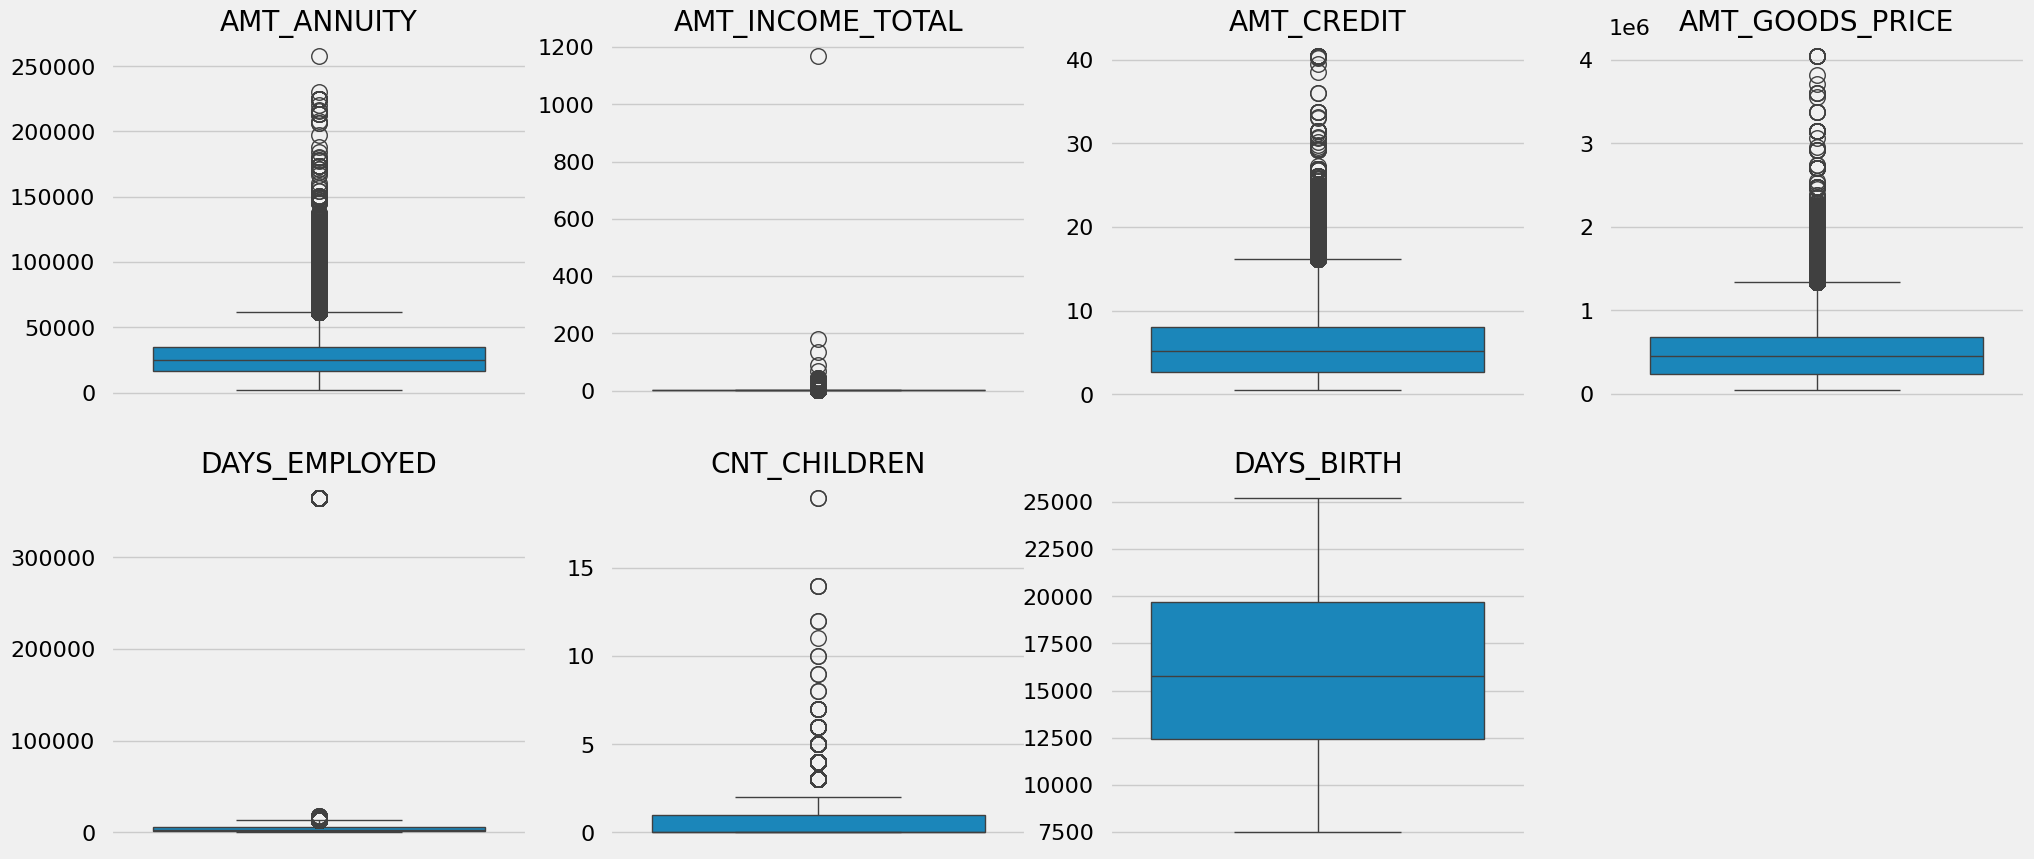

In [74]:
plt.figure(figsize=(22,10))

app_outlier_col_1 = ['AMT_ANNUITY','AMT_INCOME_TOTAL','AMT_CREDIT','AMT_GOODS_PRICE','DAYS_EMPLOYED']
app_outlier_col_2 = ['CNT_CHILDREN','DAYS_BIRTH']
for i in enumerate(app_outlier_col_1):
    plt.subplot(2,4,i[0]+1)
    sns.boxplot(y=applicationDF[i[1]])
    plt.title(i[1])
    plt.ylabel("")

for i in enumerate(app_outlier_col_2):
    plt.subplot(2,4,i[0]+6)
    sns.boxplot(y=applicationDF[i[1]])
    plt.title(i[1])
    plt.ylabel("")

<div class="alert alert-block alert-info">
    <span style='font-family:Georgia'>
        <b>Insight: </b><br>It can be seen that in current application data
        <ol>
            <li>AMT_ANNUITY, AMT_CREDIT, AMT_GOODS_PRICE,CNT_CHILDREN have some number of outliers.</li>
            <li>AMT_INCOME_TOTAL has huge number of outliers which indicate that few of the loan applicants have high income when compared to the others.</li>
            <li>DAYS_BIRTH has no outliers which means the data available is reliable.</li>
            <li>DAYS_EMPLOYED has outlier values around 350000(days) which is around 958 years which is impossible and hence this has to be incorrect entry.</li>
        </ol>        
    </span>    
</div>
<p>
    <span style='font-family:Georgia'>
           We can see the stats for these columns below as well.
    </span>
</p>

In [75]:
applicationDF[['AMT_ANNUITY', 'AMT_INCOME_TOTAL', 'AMT_CREDIT', 'AMT_GOODS_PRICE', 'DAYS_BIRTH','CNT_CHILDREN','DAYS_EMPLOYED']].describe()

AMT_ANNUITY  AMT_INCOME_TOTAL     AMT_CREDIT  AMT_GOODS_PRICE     DAYS_BIRTH   CNT_CHILDREN  DAYS_EMPLOYED
count  307499.000000     307511.000000  307511.000000     3.072330e+05  307511.000000  307511.000000  307511.000000
mean    27108.573909          1.687979       5.990260     5.383962e+05   16036.995067       0.417052   67724.742149
std     14493.737315          2.371231       4.024908     3.694465e+05    4363.988632       0.722121  139443.751806
min      1615.500000          0.256500       0.450000     4.050000e+04    7489.000000       0.000000       0.000000
25%     16524.000000          1.125000       2.700000     2.385000e+05   12413.000000       0.000000     933.000000
50%     24903.000000          1.471500       5.135310     4.500000e+05   15750.000000       0.000000    2219.000000
75%     34596.000000          2.025000       8.086500     6.795000e+05   19682.000000       1.000000    5707.000000
max    258025.500000       1170.000000      40.500000     4.050000e+06   25229.000000      19.000000  365243.000000

<p>
    <span style='font-family:Georgia'>
           Finding outlier information in previousDF
    </span>
</p>

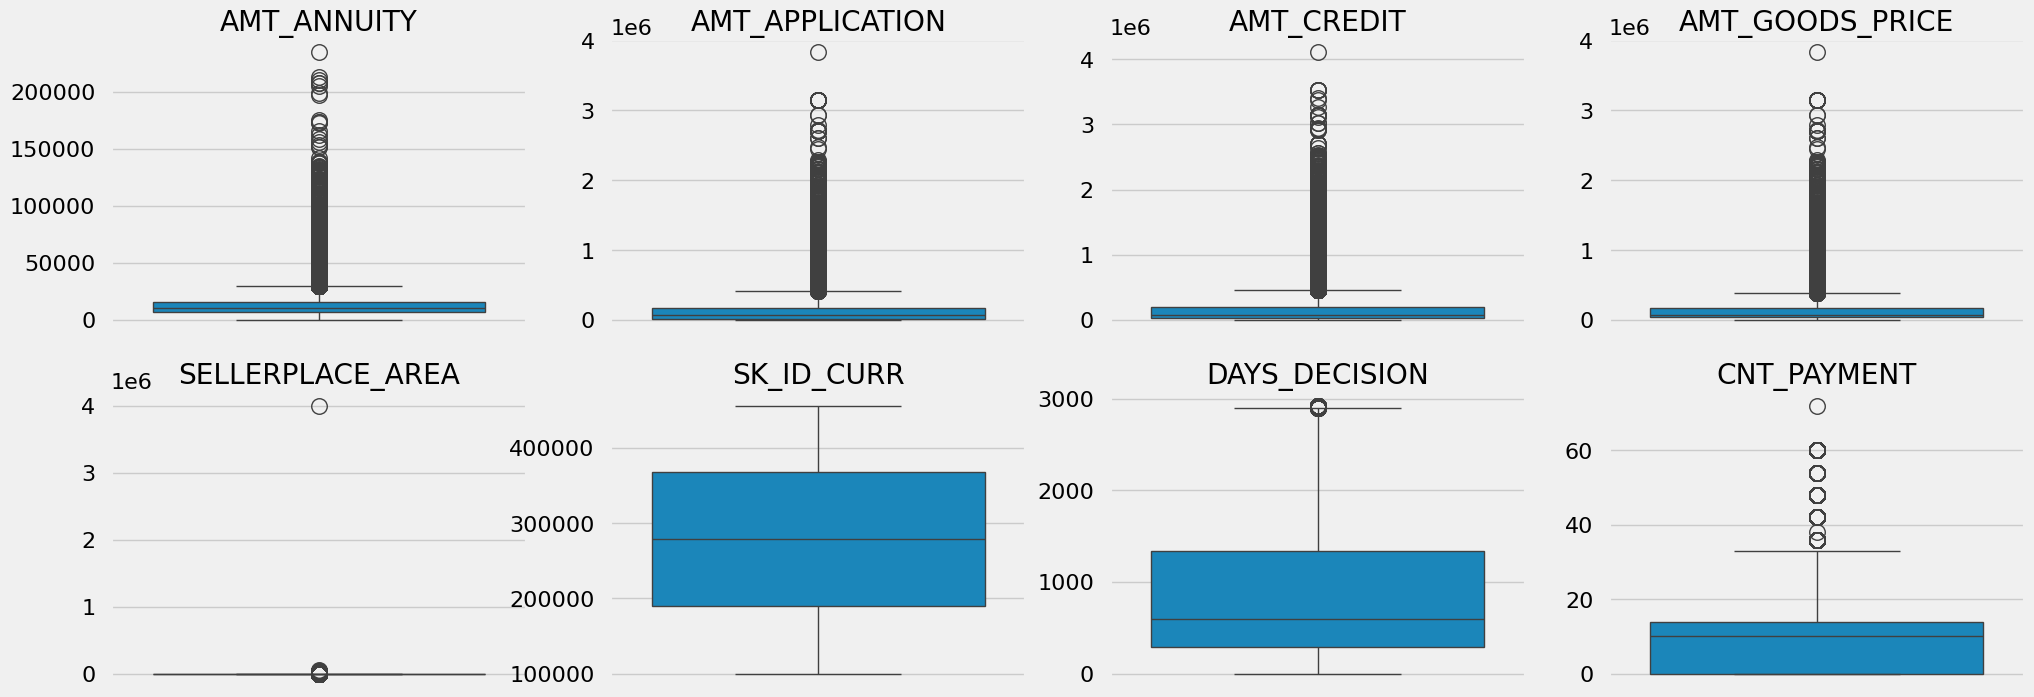

In [76]:
plt.figure(figsize=(22,8))

prev_outlier_col_1 = ['AMT_ANNUITY','AMT_APPLICATION','AMT_CREDIT','AMT_GOODS_PRICE','SELLERPLACE_AREA']
prev_outlier_col_2 = ['SK_ID_CURR','DAYS_DECISION','CNT_PAYMENT']
for i in enumerate(prev_outlier_col_1):
    plt.subplot(2,4,i[0]+1)
    sns.boxplot(y=previousDF[i[1]])
    plt.title(i[1])
    plt.ylabel("")

for i in enumerate(prev_outlier_col_2):
    plt.subplot(2,4,i[0]+6)
    sns.boxplot(y=previousDF[i[1]])
    plt.title(i[1])
    plt.ylabel("")

<div class="alert alert-block alert-info">
    <span style='font-family:Georgia'>
        <b>Insight: </b> It can be seen that in previous application data
        <ol>
            <li>AMT_ANNUITY, AMT_APPLICATION, AMT_CREDIT, AMT_GOODS_PRICE, SELLERPLACE_AREA have huge number of outliers.</li>
            <li>CNT_PAYMENT has few outlier values.</li>
            <li>SK_ID_CURR is an ID column and hence no outliers.</li>
            <li>DAYS_DECISION has little number of outliers indicating that these previous applications decisions were taken long back.</li>
        </ol>        
    </span>    
</div>
<p>
    <span style='font-family:Georgia'>
           We can see the stats for these columns below as well.
    </span>
</p>

In [77]:
previousDF[['AMT_ANNUITY', 'AMT_APPLICATION', 'AMT_CREDIT', 'AMT_GOODS_PRICE', 'SELLERPLACE_AREA','CNT_PAYMENT','DAYS_DECISION']].describe()

AMT_ANNUITY  AMT_APPLICATION    AMT_CREDIT  AMT_GOODS_PRICE  SELLERPLACE_AREA   CNT_PAYMENT  DAYS_DECISION
count   72295.000000     7.229500e+04  7.229500e+04     7.229500e+04      7.229400e+04  72295.000000   72294.000000
mean    14525.487494     1.690912e+05  1.887729e+05     1.787919e+05      3.694244e+02     12.245854     900.624602
std     13114.603275     2.823809e+05  3.089461e+05     2.771442e+05      1.492914e+04     13.956216     785.205664
min         0.000000     0.000000e+00  0.000000e+00     0.000000e+00     -1.000000e+00      0.000000       2.000000
25%      7199.437500     2.195325e+04  2.596275e+04     4.500000e+04     -1.000000e+00      0.000000     293.000000
50%     10880.842500     7.147350e+04  7.895700e+04     7.146450e+04      1.000000e+01     10.000000     601.000000
75%     16274.790000     1.800000e+05  1.985152e+05     1.800000e+05      1.000000e+02     14.000000    1336.000000
max    234478.395000     3.826372e+06  4.104351e+06     3.826372e+06      4.000000e+06     72.000000    2922.000000

<a id="analysis"></a>
<h2>   
      <font color = blue >
            <span style='font-family:Georgia'>
            5. Data Analysis
            </span>   
        </font>    
</h2>

<div class="alert alert-block alert-warning">
    <span style='font-family:Georgia'>
        <b>Strategy:</b>
        <p>The data analysis flow has been planned in following way :</p>
        <ul>
            <li>Imbalance in Data</li>
            <li>Categorical Data Analysis</li>
            <ul>
                <li>Categorical segmented Univariate Analysis</li>
                <li>Categorical Bi/Multivariate analysis</li>
            </ul>
            <li>Numeric Data Analysis</li>
            <ul>
                <li>Bi-furcation of databased based on TARGET data</li>
                <li>Correlation Matrix</li>
                <li>Numerical segmented Univariate Analysis</li>
                <li>Numerical Bi/Multivariate analysis</li>
            </ul>
        </ul>
    </span>    
</div>

<a id="imbalance"></a>
<h3>   
      <font color = purple >
            <span style='font-family:Georgia'>
             5.1 Imbalance Analysis
            </span>   
        </font>    
</h3>

In [80]:
count_0 = Imbalance.iloc[0]["TARGET"]
count_1 = Imbalance.iloc[1]["TARGET"]
count_0_perc = round(count_0/(count_0+count_1)*100,2)
count_1_perc = round(count_1/(count_0+count_1)*100,2)

print('Ratios of imbalance in percentage with respect to Repayer and Defaulter datas are: %.2f and %.2f'%(count_0_perc,count_1_perc))
print('Ratios of imbalance in relative with respect to Repayer and Defaulter datas is %.2f : 1 (approx)'%(count_0/count_1))

Ratios of imbalance in percentage with respect to Repayer and Defaulter datas are: 0.00 and 100.00
Ratios of imbalance in relative with respect to Repayer and Defaulter datas is 0.00 : 1 (approx)


<a id="oltfunc"></a>
<h3>   
      <font color = purple >
            <span style='font-family:Georgia'>
             5.2 Plotting Functions
            </span>   
        </font>    
</h3>

<p>
    <span style='font-family:Georgia'>
           Following are the common functions customized to perform uniform anaysis that is called for all plots:
    </span>
</p>

In [81]:

def univariate_categorical(feature,ylog=False,label_rotation=False,horizontal_layout=True):
    temp = applicationDF[feature].value_counts()
    df1 = pd.DataFrame({feature: temp.index,'Number of contracts': temp.values})

    # Calculate the percentage of target=1 per category value
    cat_perc = applicationDF[[feature, 'TARGET']].groupby([feature],as_index=False).mean()
    cat_perc["TARGET"] = cat_perc["TARGET"]*100
    cat_perc.sort_values(by='TARGET', ascending=False, inplace=True)

    if(horizontal_layout):
        fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12,6))
    else:
        fig, (ax1, ax2) = plt.subplots(nrows=2, figsize=(20,24))

    # 1. Subplot 1: Count plot of categorical column
    # sns.set_palette("Set2")
    s = sns.countplot(ax=ax1,
                    x = feature,
                    data=applicationDF,
                    hue ="TARGET",
                    order=cat_perc[feature],
                    palette=['g','r'])

    # Define common styling
    ax1.set_title(feature, fontdict={'fontsize' : 10, 'fontweight' : 3, 'color' : 'Blue'})
    ax1.legend(['Repayer','Defaulter'])

    # If the plot is not readable, use the log scale.
    if ylog:
        ax1.set_yscale('log')
        ax1.set_ylabel("Count (log)",fontdict={'fontsize' : 10, 'fontweight' : 3, 'color' : 'Blue'})


    if(label_rotation):
        s.set_xticklabels(s.get_xticklabels(),rotation=90)

    # 2. Subplot 2: Percentage of defaulters within the categorical column
    s = sns.barplot(ax=ax2,
                    x = feature,
                    y='TARGET',
                    order=cat_perc[feature],
                    data=cat_perc,
                    palette='Set2')

    if(label_rotation):
        s.set_xticklabels(s.get_xticklabels(),rotation=90)
    plt.ylabel('Percent of Defaulters [%]', fontsize=10)
    plt.tick_params(axis='both', which='major', labelsize=10)
    ax2.set_title(feature + " Defaulter %", fontdict={'fontsize' : 15, 'fontweight' : 5, 'color' : 'Blue'})

    plt.show();

In [82]:
# function for plotting repetitive countplots in bivariate categorical analysis

def bivariate_bar(x,y,df,hue,figsize):

    plt.figure(figsize=figsize)
    sns.barplot(x=x,
                  y=y,
                  data=df,
                  hue=hue,
                  palette =['g','r'])

    # Defining aesthetics of Labels and Title of the plot using style dictionaries
    plt.xlabel(x,fontdict={'fontsize' : 10, 'fontweight' : 3, 'color' : 'Blue'})
    plt.ylabel(y,fontdict={'fontsize' : 10, 'fontweight' : 3, 'color' : 'Blue'})
    plt.title(col, fontdict={'fontsize' : 15, 'fontweight' : 5, 'color' : 'Blue'})
    plt.xticks(rotation=90, ha='right')
    plt.legend(labels = ['Repayer','Defaulter'])
    plt.show()

In [83]:
def bivariate_rel(x,y,data, hue, kind, palette, legend,figsize):

    plt.figure(figsize=figsize)
    sns.relplot(x=x,
                y=y,
                data=applicationDF,
                hue="TARGET",
                kind=kind,
                palette = ['g','r'],
                legend = False)
    plt.legend(['Repayer','Defaulter'])
    plt.xticks(rotation=90, ha='right')
    plt.show()

In [84]:
def univariate_merged(col,df,hue,palette,ylog,figsize):
    plt.figure(figsize=figsize)
    ax=sns.countplot(x=col,
                  data=df,
                  hue= hue,
                  palette= palette,
                  order=df[col].value_counts().index)


    if ylog:
        plt.yscale('log')
        plt.ylabel("Count (log)",fontdict={'fontsize' : 10, 'fontweight' : 3, 'color' : 'Blue'})
    else:
        plt.ylabel("Count",fontdict={'fontsize' : 10, 'fontweight' : 3, 'color' : 'Blue'})

    plt.title(col , fontdict={'fontsize' : 15, 'fontweight' : 5, 'color' : 'Blue'})
    plt.legend(loc = "upper right")
    plt.xticks(rotation=90, ha='right')

    plt.show()

In [85]:
def merged_pointplot(x,y):
    plt.figure(figsize=(8,4))
    sns.pointplot(x=x,
                  y=y,
                  hue="TARGET",
                  data=loan_process_df,
                  palette =['g','r'])
   # plt.legend(['Repayer','Defaulter'])

<a id="catvar"></a>
<h3>   
      <font color = purple >
            <span style='font-family:Georgia'>
             5.3 Categorical Variables Analysis
            </span>   
        </font>    
</h3>

<h4>   
      <font color = darkgreen >
            <span style='font-family:Georgia'>
             5.3.1 Segmented Univariate Analysis
            </span>   
        </font>    
</h4>

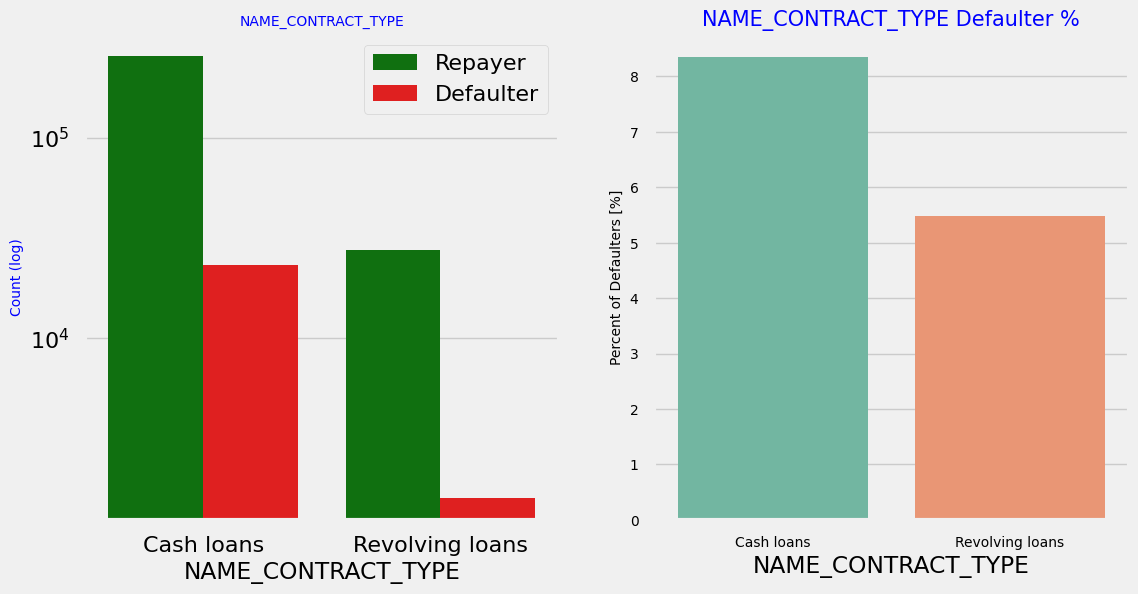

In [86]:
# Checking the contract type based on loan repayment status
univariate_categorical('NAME_CONTRACT_TYPE',True)

<div class="alert alert-block alert-info">
    <span style='font-family:Georgia'>
        <b>Inferences: </b> <br>Contract type: Revolving loans are just a small fraction (10%) from the total number of loans; in the same time, a larger amount of Revolving loans, comparing with their frequency, are not repaid.
    </span>    
</div>

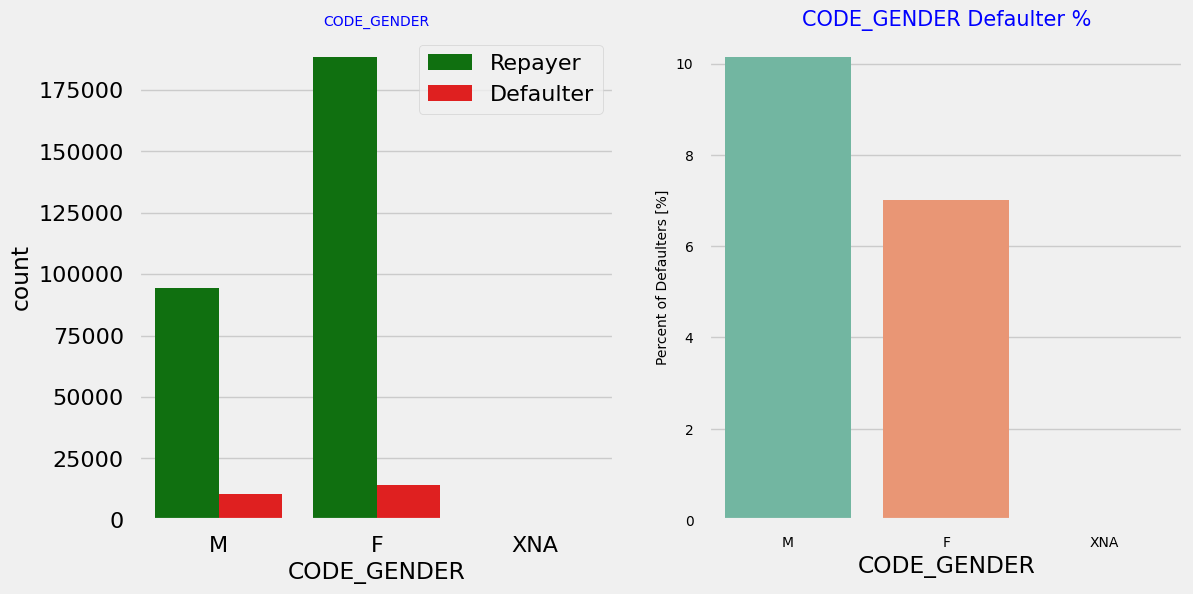

In [87]:
# Checking the type of Gender on loan repayment status
univariate_categorical('CODE_GENDER')

<div class="alert alert-block alert-info">
    <span style='font-family:Georgia'>
        <b>Inferences: </b> <br>The number of female clients is almost double the number of male clients. Based on the percentage of defaulted credits, males have a higher chance of not returning their loans (~10%), comparing with women (~7%)  
    </span>    
</div>

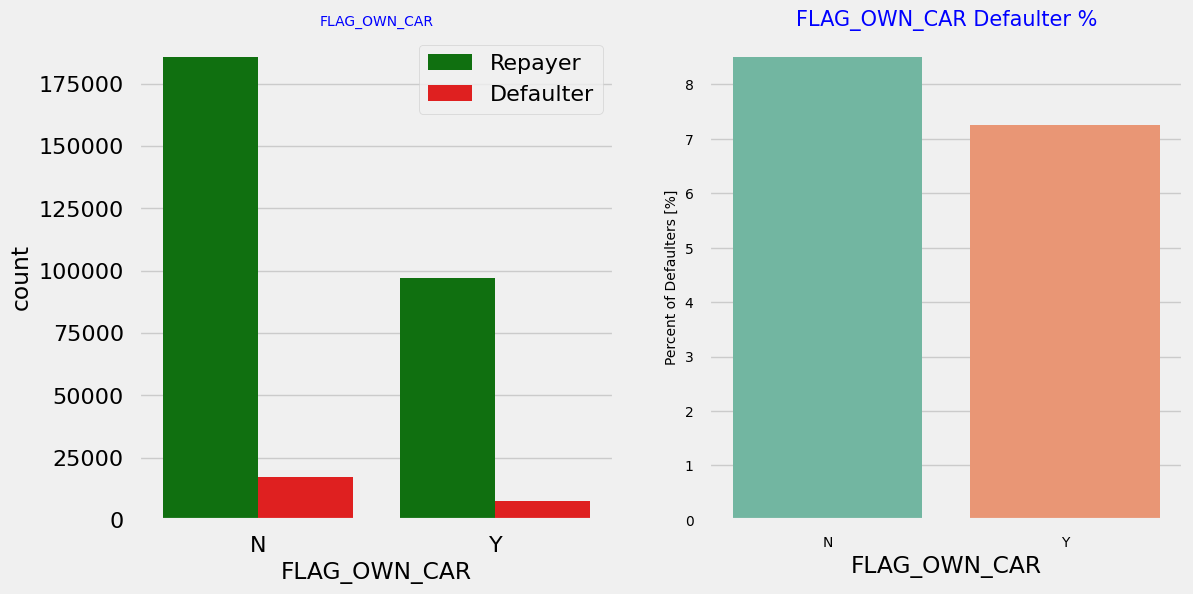

In [88]:
# Checking if owning a car is related to loan repayment status
univariate_categorical('FLAG_OWN_CAR')

<div class="alert alert-block alert-info">
    <span style='font-family:Georgia'>
        <b>Inferences: </b>
        <br>Clients who own a car are half in number of the clients who dont own a car. But based on the percentage of deault, there is no correlation between owning a car and loan repayment as in both cases the default percentage is almost same.      
    </span>    
</div>

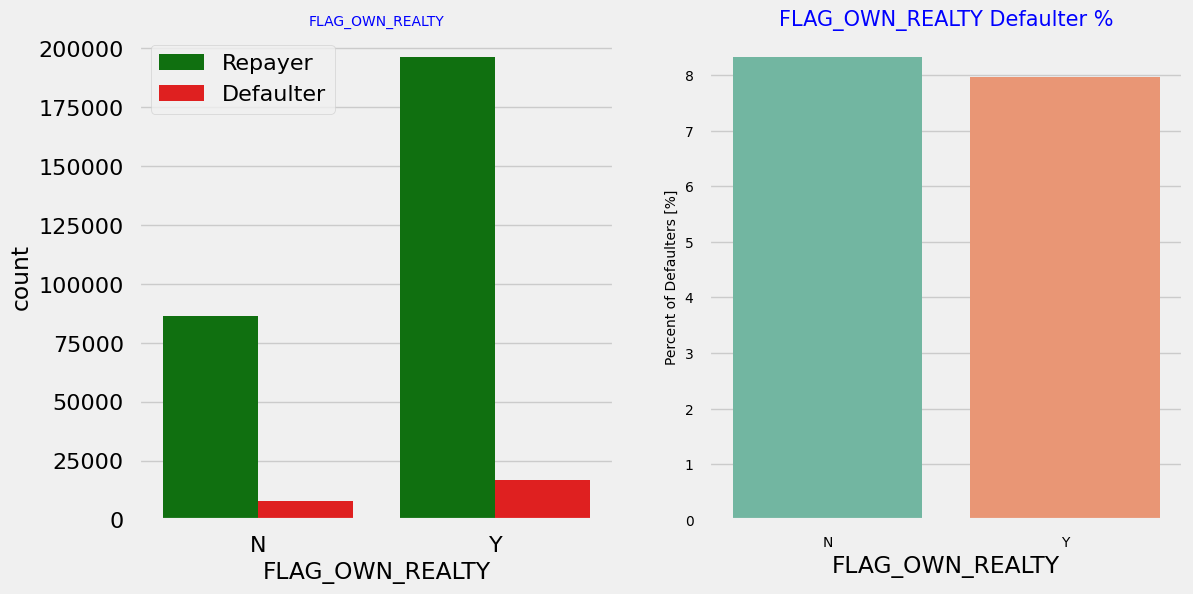

In [89]:
# Checking if owning a realty is related to loan repayment status
univariate_categorical('FLAG_OWN_REALTY')

<div class="alert alert-block alert-info">
    <span style='font-family:Georgia'>
        <b>Inferences: </b>
        <br>The clients who own real estate are more than double of the ones that don't own. But the defaulting rate of both categories are around the same (~8%). Thus there is no correlation between owning a reality and defaulting the loan.      
    </span>    
</div>

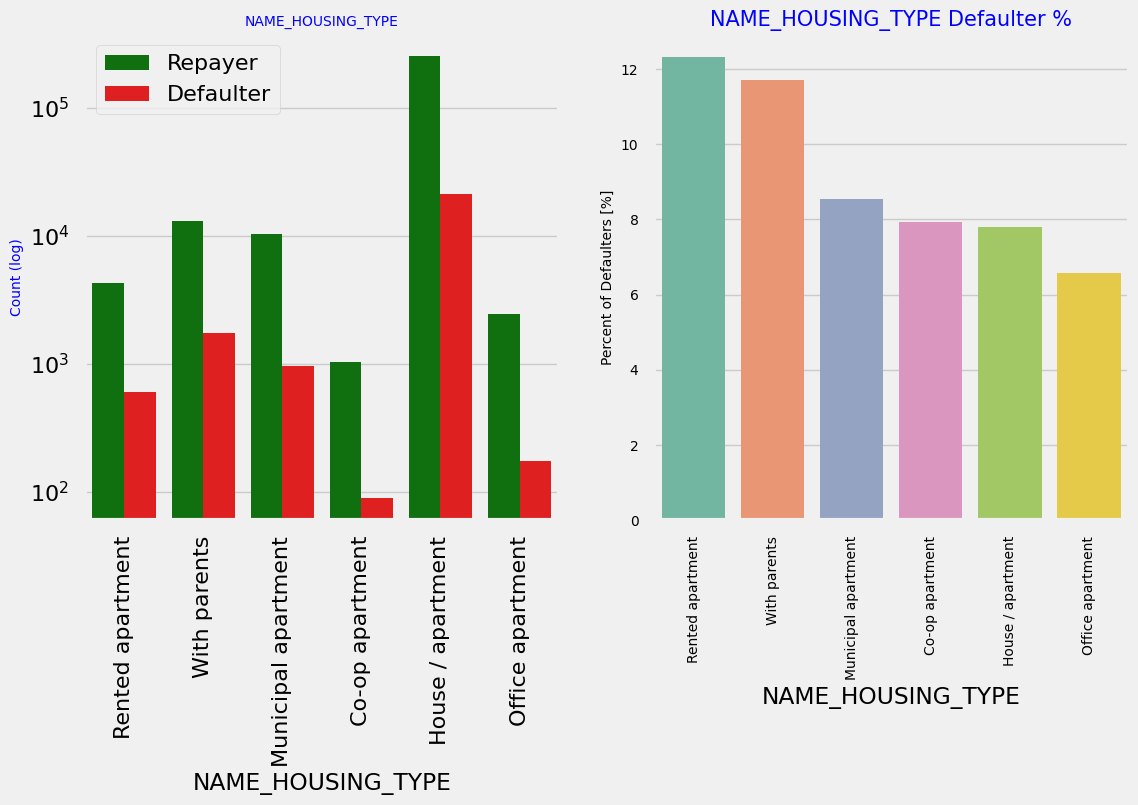

In [90]:
# Analyzing Housing Type based on loan repayment status
univariate_categorical("NAME_HOUSING_TYPE",True,True,True)

<div class="alert alert-block alert-info">
    <span style='font-family:Georgia'>
        <b>Inferences: </b>
        <ol>
            <li>Majority of people live in House/apartment</li>
            <li>People living in office apartments have lowest default rate</li>
            <li>People living with parents (~11.5%) and living in rented apartments(>12%) have higher probability of defaulting </li>
        </ol>
    </span>    
</div>

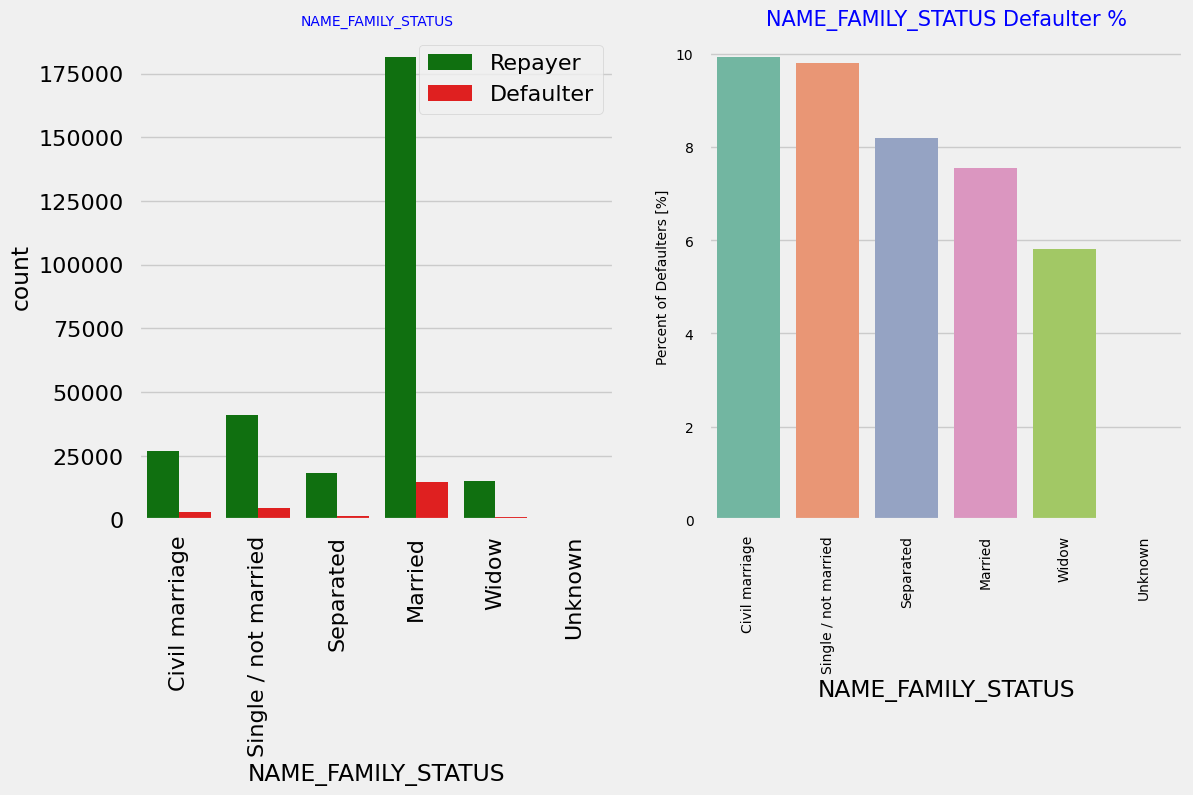

In [91]:
# Analyzing Family status based on loan repayment status
univariate_categorical("NAME_FAMILY_STATUS",False,True,True)

<div class="alert alert-block alert-info">
    <span style='font-family:Georgia'>
        <b>Inferences: </b>
        <ol>
            <li>Most of the people who have taken loan are married, followed by Single/not married and civil marriage </li>
            <li>In terms of percentage of not repayment of loan, Civil marriage has the highest percent of not repayment (10%), with Widow the lowest (exception being Unknown). </li>
        </ol>
    </span>    
</div>

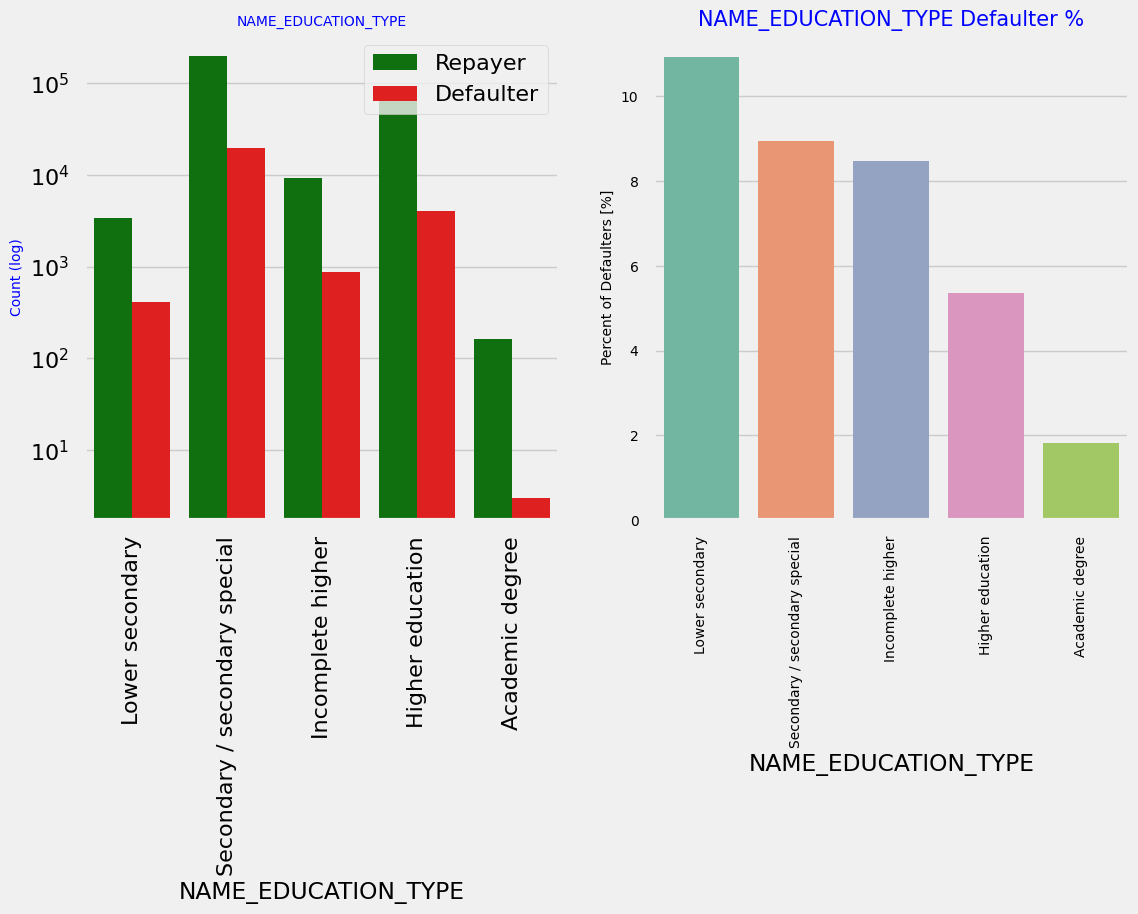

In [92]:
# Analyzing Education Type based on loan repayment status
univariate_categorical("NAME_EDUCATION_TYPE",True,True,True)

<div class="alert alert-block alert-info">
    <span style='font-family:Georgia'>
        <b>Inferences: </b>
        <ol>
            <li>Majority of the clients have Secondary / secondary special education, followed by clients with Higher education. Only a very small number having an academic degree</li>
            <li>The Lower secondary category, although rare, have the largest rate of not returning the loan (11%). The people with Academic degree have less than 2% defaulting rate. </li>
        </ol>
    </span>    
</div>

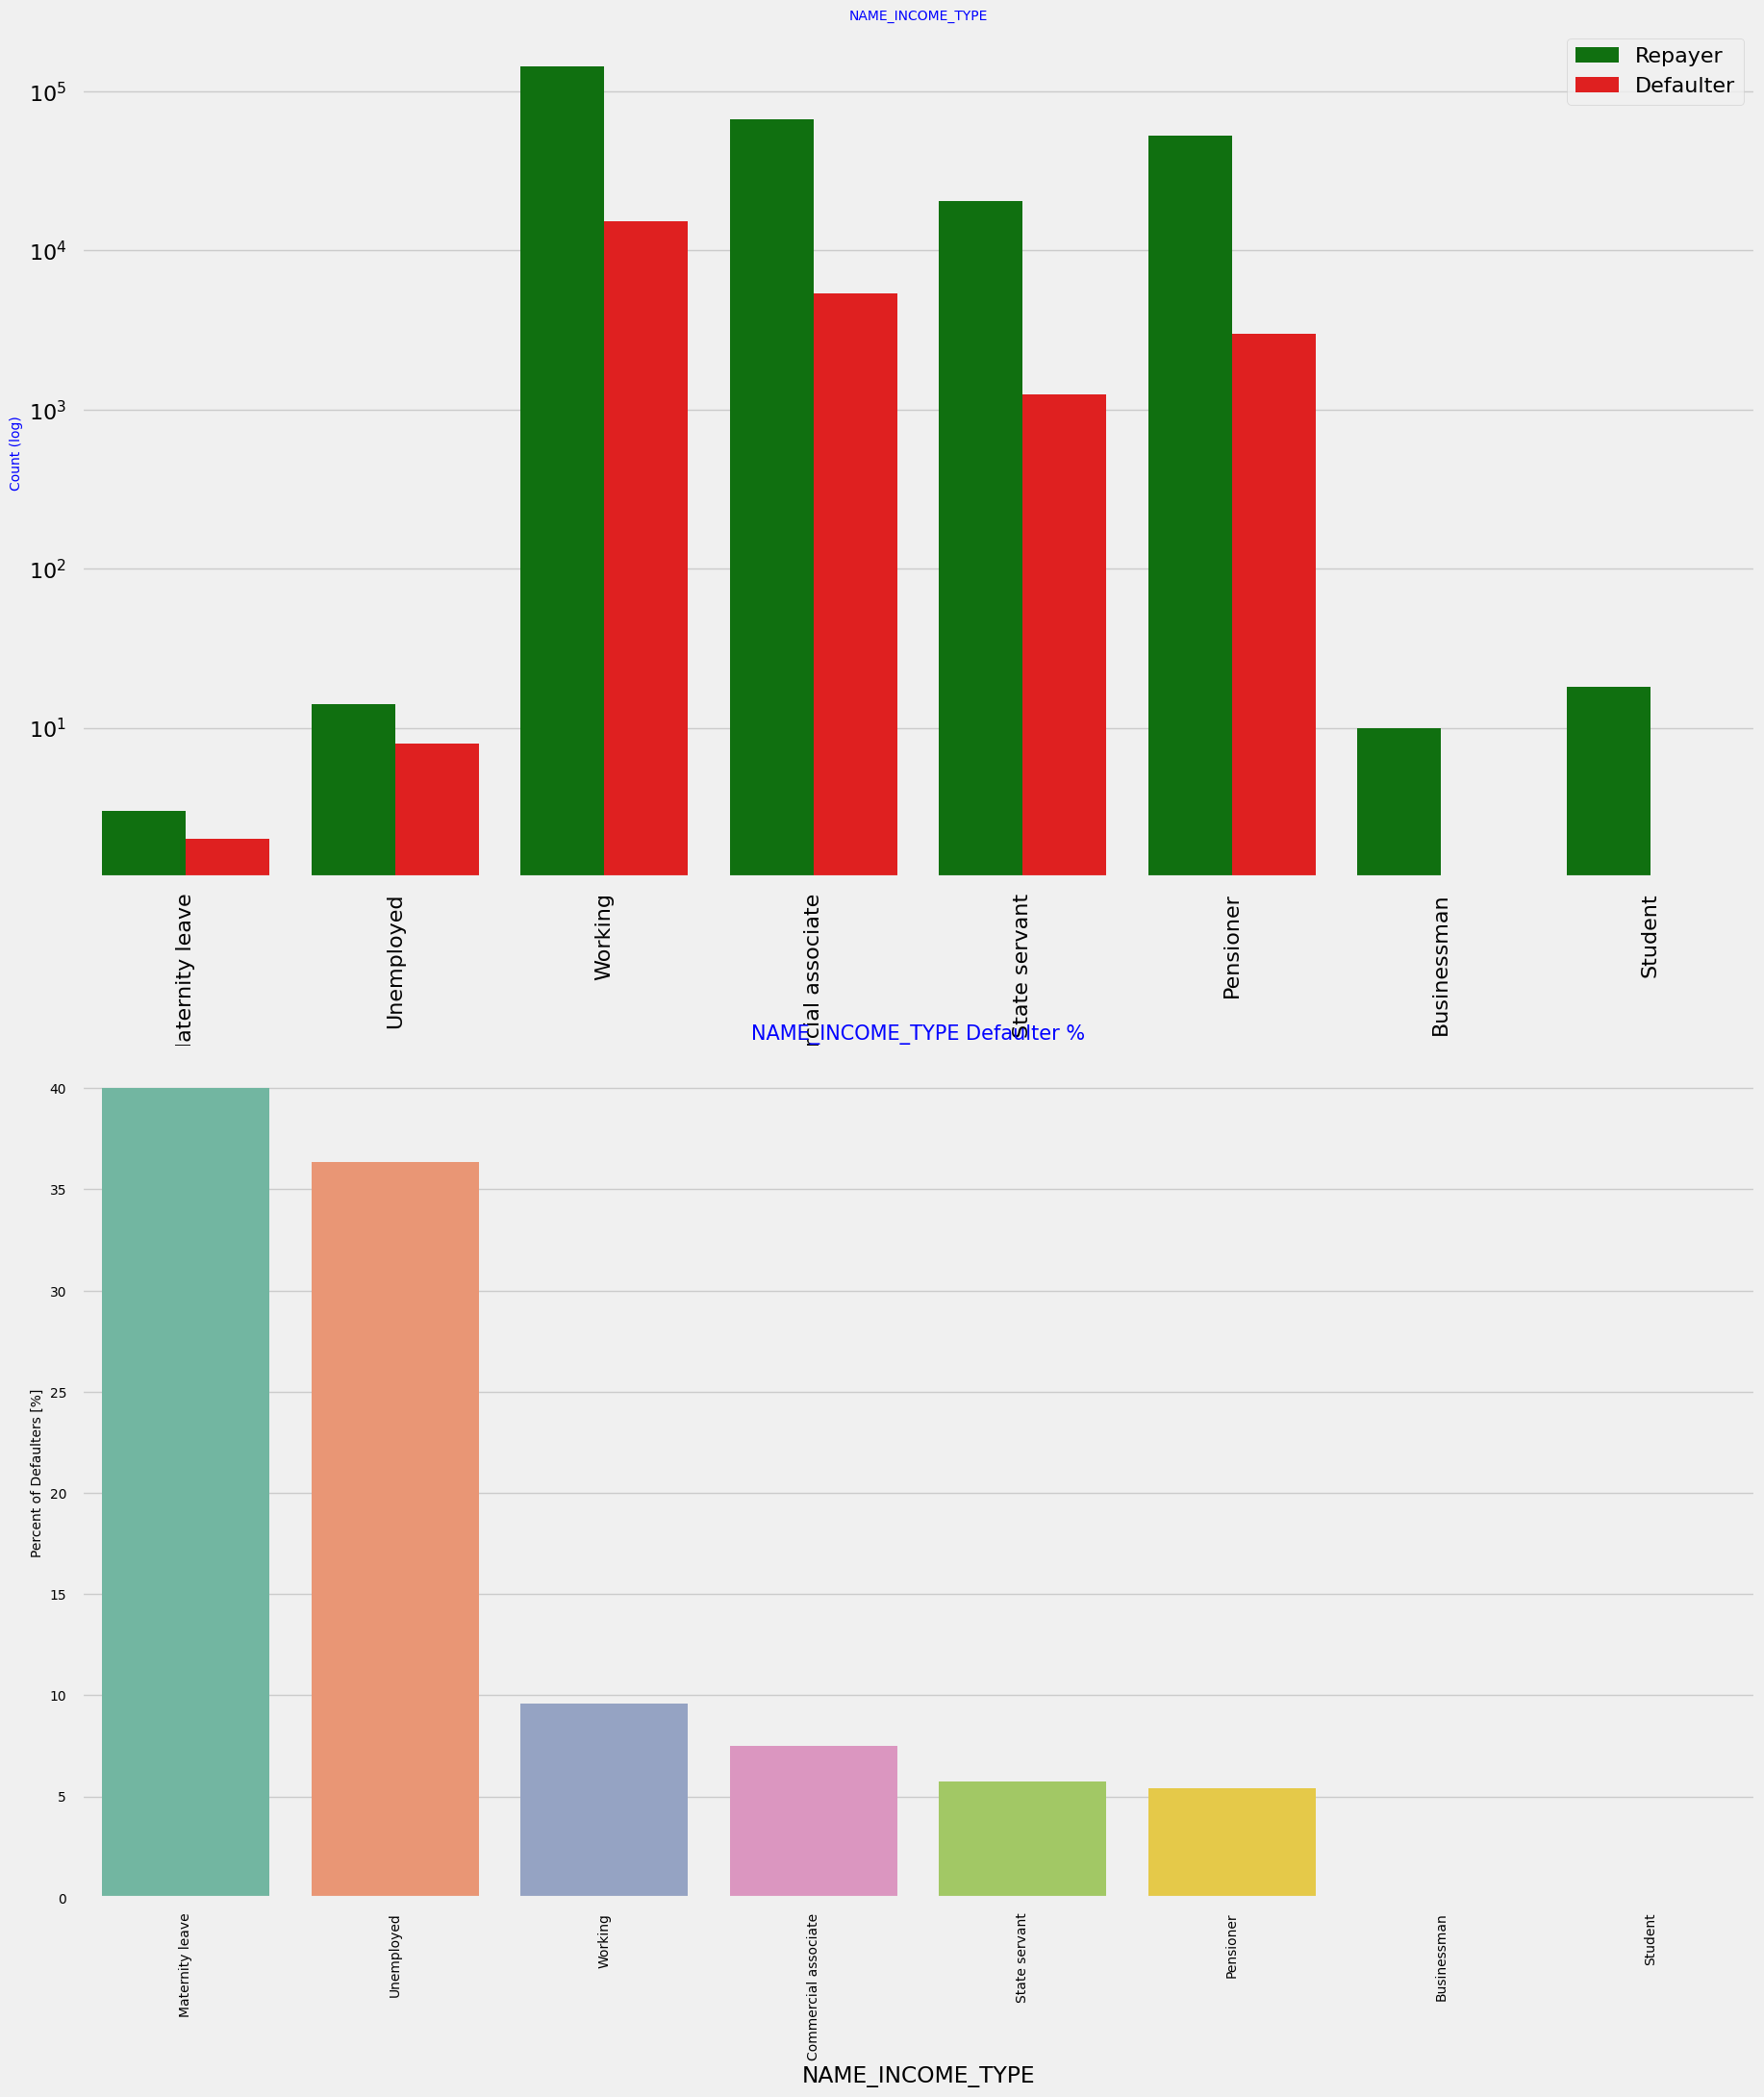

In [93]:
# Analyzing Income Type based on loan repayment status
univariate_categorical("NAME_INCOME_TYPE",True,True,False)

<div class="alert alert-block alert-info">
    <span style='font-family:Georgia'>
        <b>Inferences: </b>
        <ul>
            <li>Most of applicants for loans have income type as Working, followed by Commercial associate, Pensioner and State servant.</li>
            <li>The applicants with the type of income Maternity leave have almost 40% ratio of not returning loans, followed by Unemployed (37%). The rest of types of incomes are under the average of 10% for not returning loans.</li>
            <li>Student and Businessmen, though less in numbers do not have any default record. Thus these two category are <b>safest</b> for providing loan.</li>  
        </ul>
    </span>    
</div>

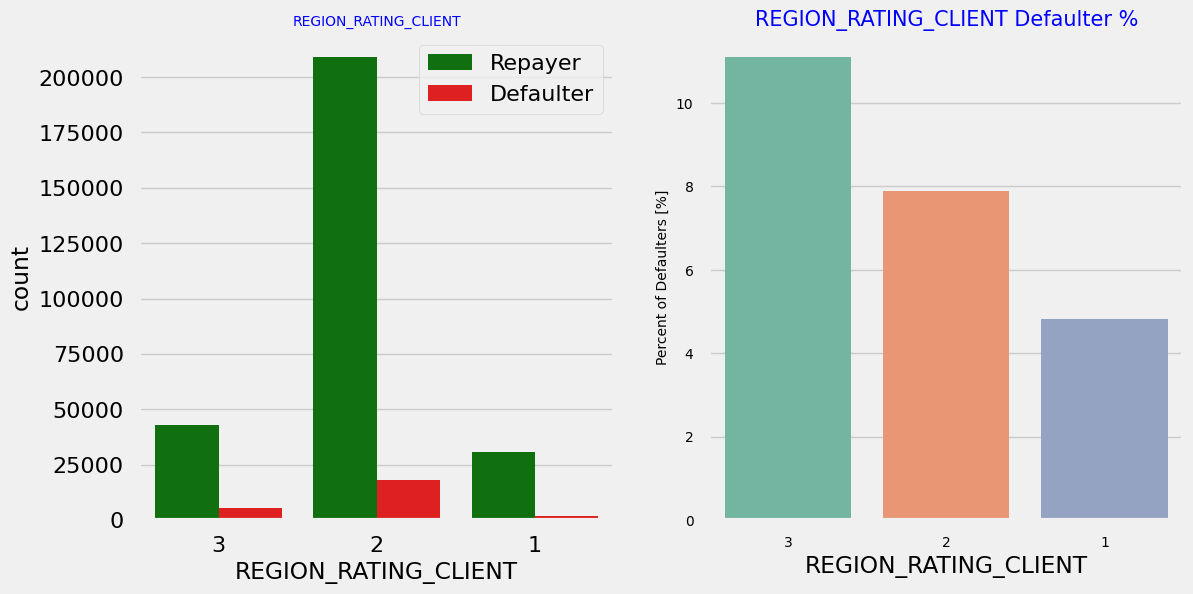

In [94]:
# Analyzing Region rating where applicant lives based on loan repayment status
univariate_categorical("REGION_RATING_CLIENT",False,False,True)

<div class="alert alert-block alert-info">
    <span style='font-family:Georgia'>
        <b>Inferences: </b>
        <ol>
            <li>Most of the applicants are living in Region_Rating 2 place.</li>
            <li>Region Rating 3 has the highest default rate (11%)</li>
            <li>Applicant living in Region_Rating 1 has the lowest probability of defaulting, thus <b>safer</b> for approving loans </li>
        </ol>
    </span>    
</div>

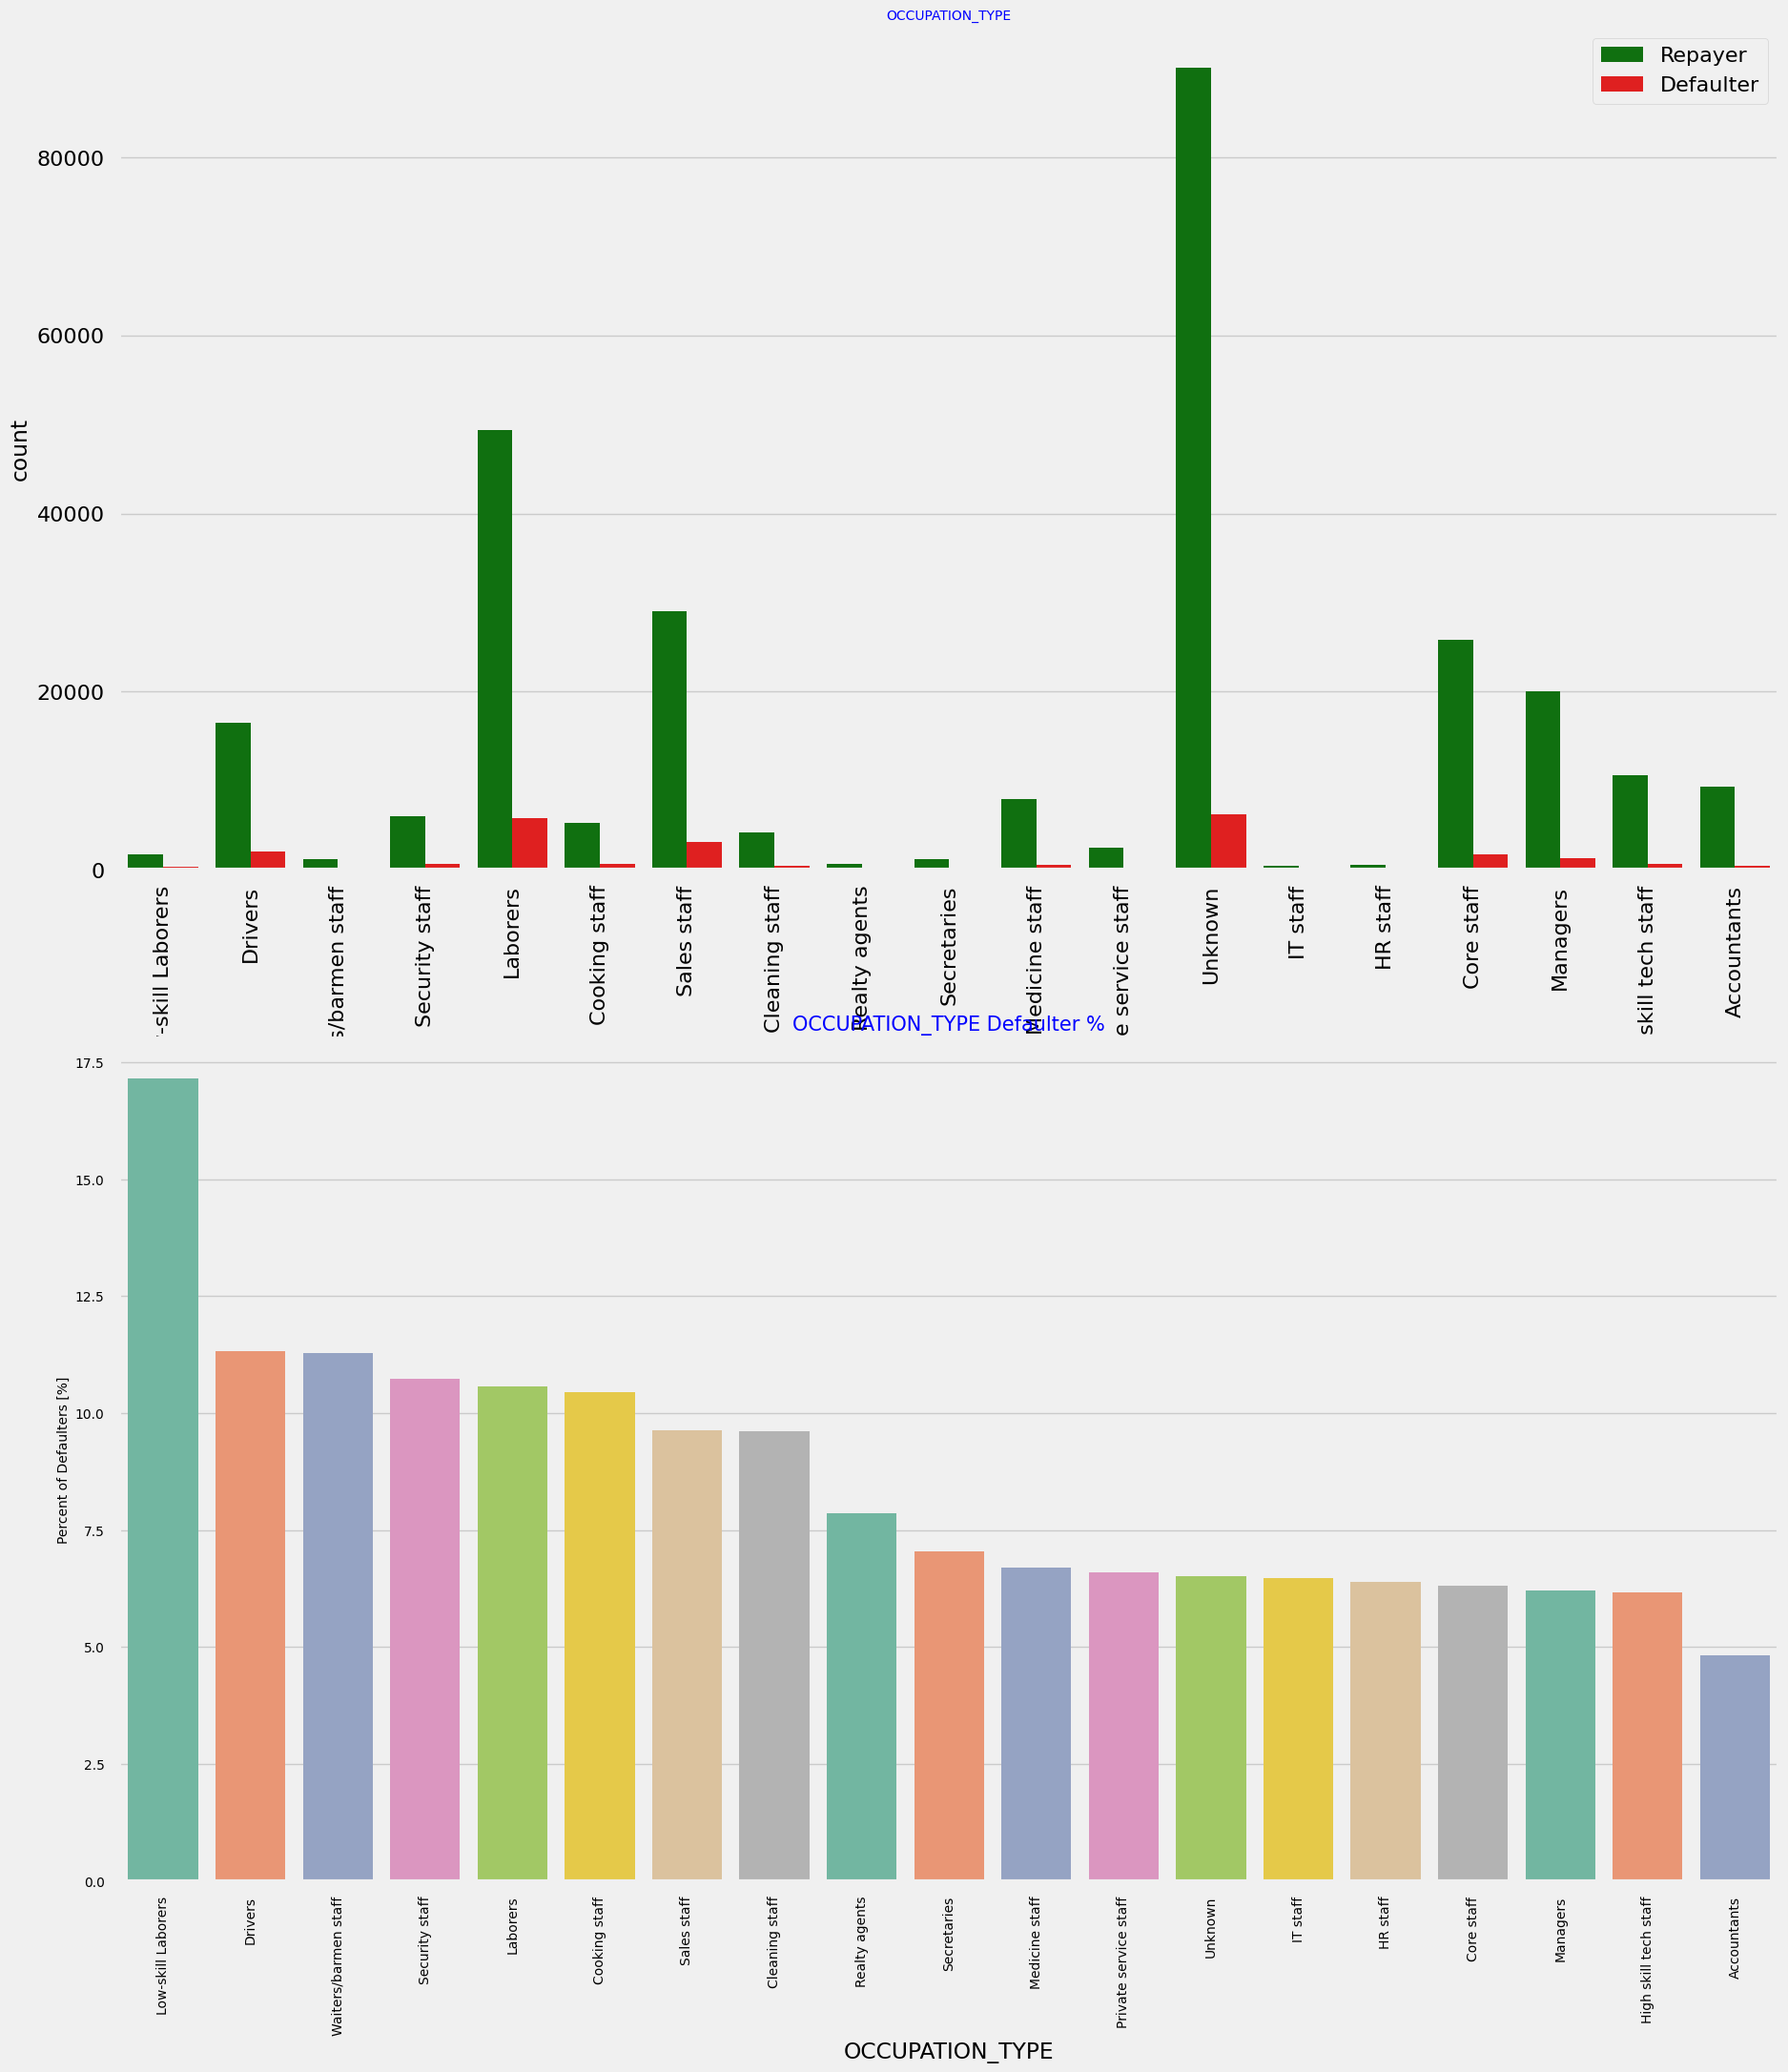

In [95]:
# Analyzing Occupation Type where applicant lives based on loan repayment status
univariate_categorical("OCCUPATION_TYPE",False,True,False)

<div class="alert alert-block alert-info">
    <span style='font-family:Georgia'>
        <b>Inferences: </b>
        <ol>
            <li>Most of the loans are taken by Laborers, followed by Sales staff. IT staff take the lowest amount of loans.</li>
            <li>The category with highest percent of not repaid loans are Low-skill Laborers (above 17%), followed by Drivers and Waiters/barmen staff, Security staff, Laborers and Cooking staff. </li>
        </ol>
    </span>    
</div>

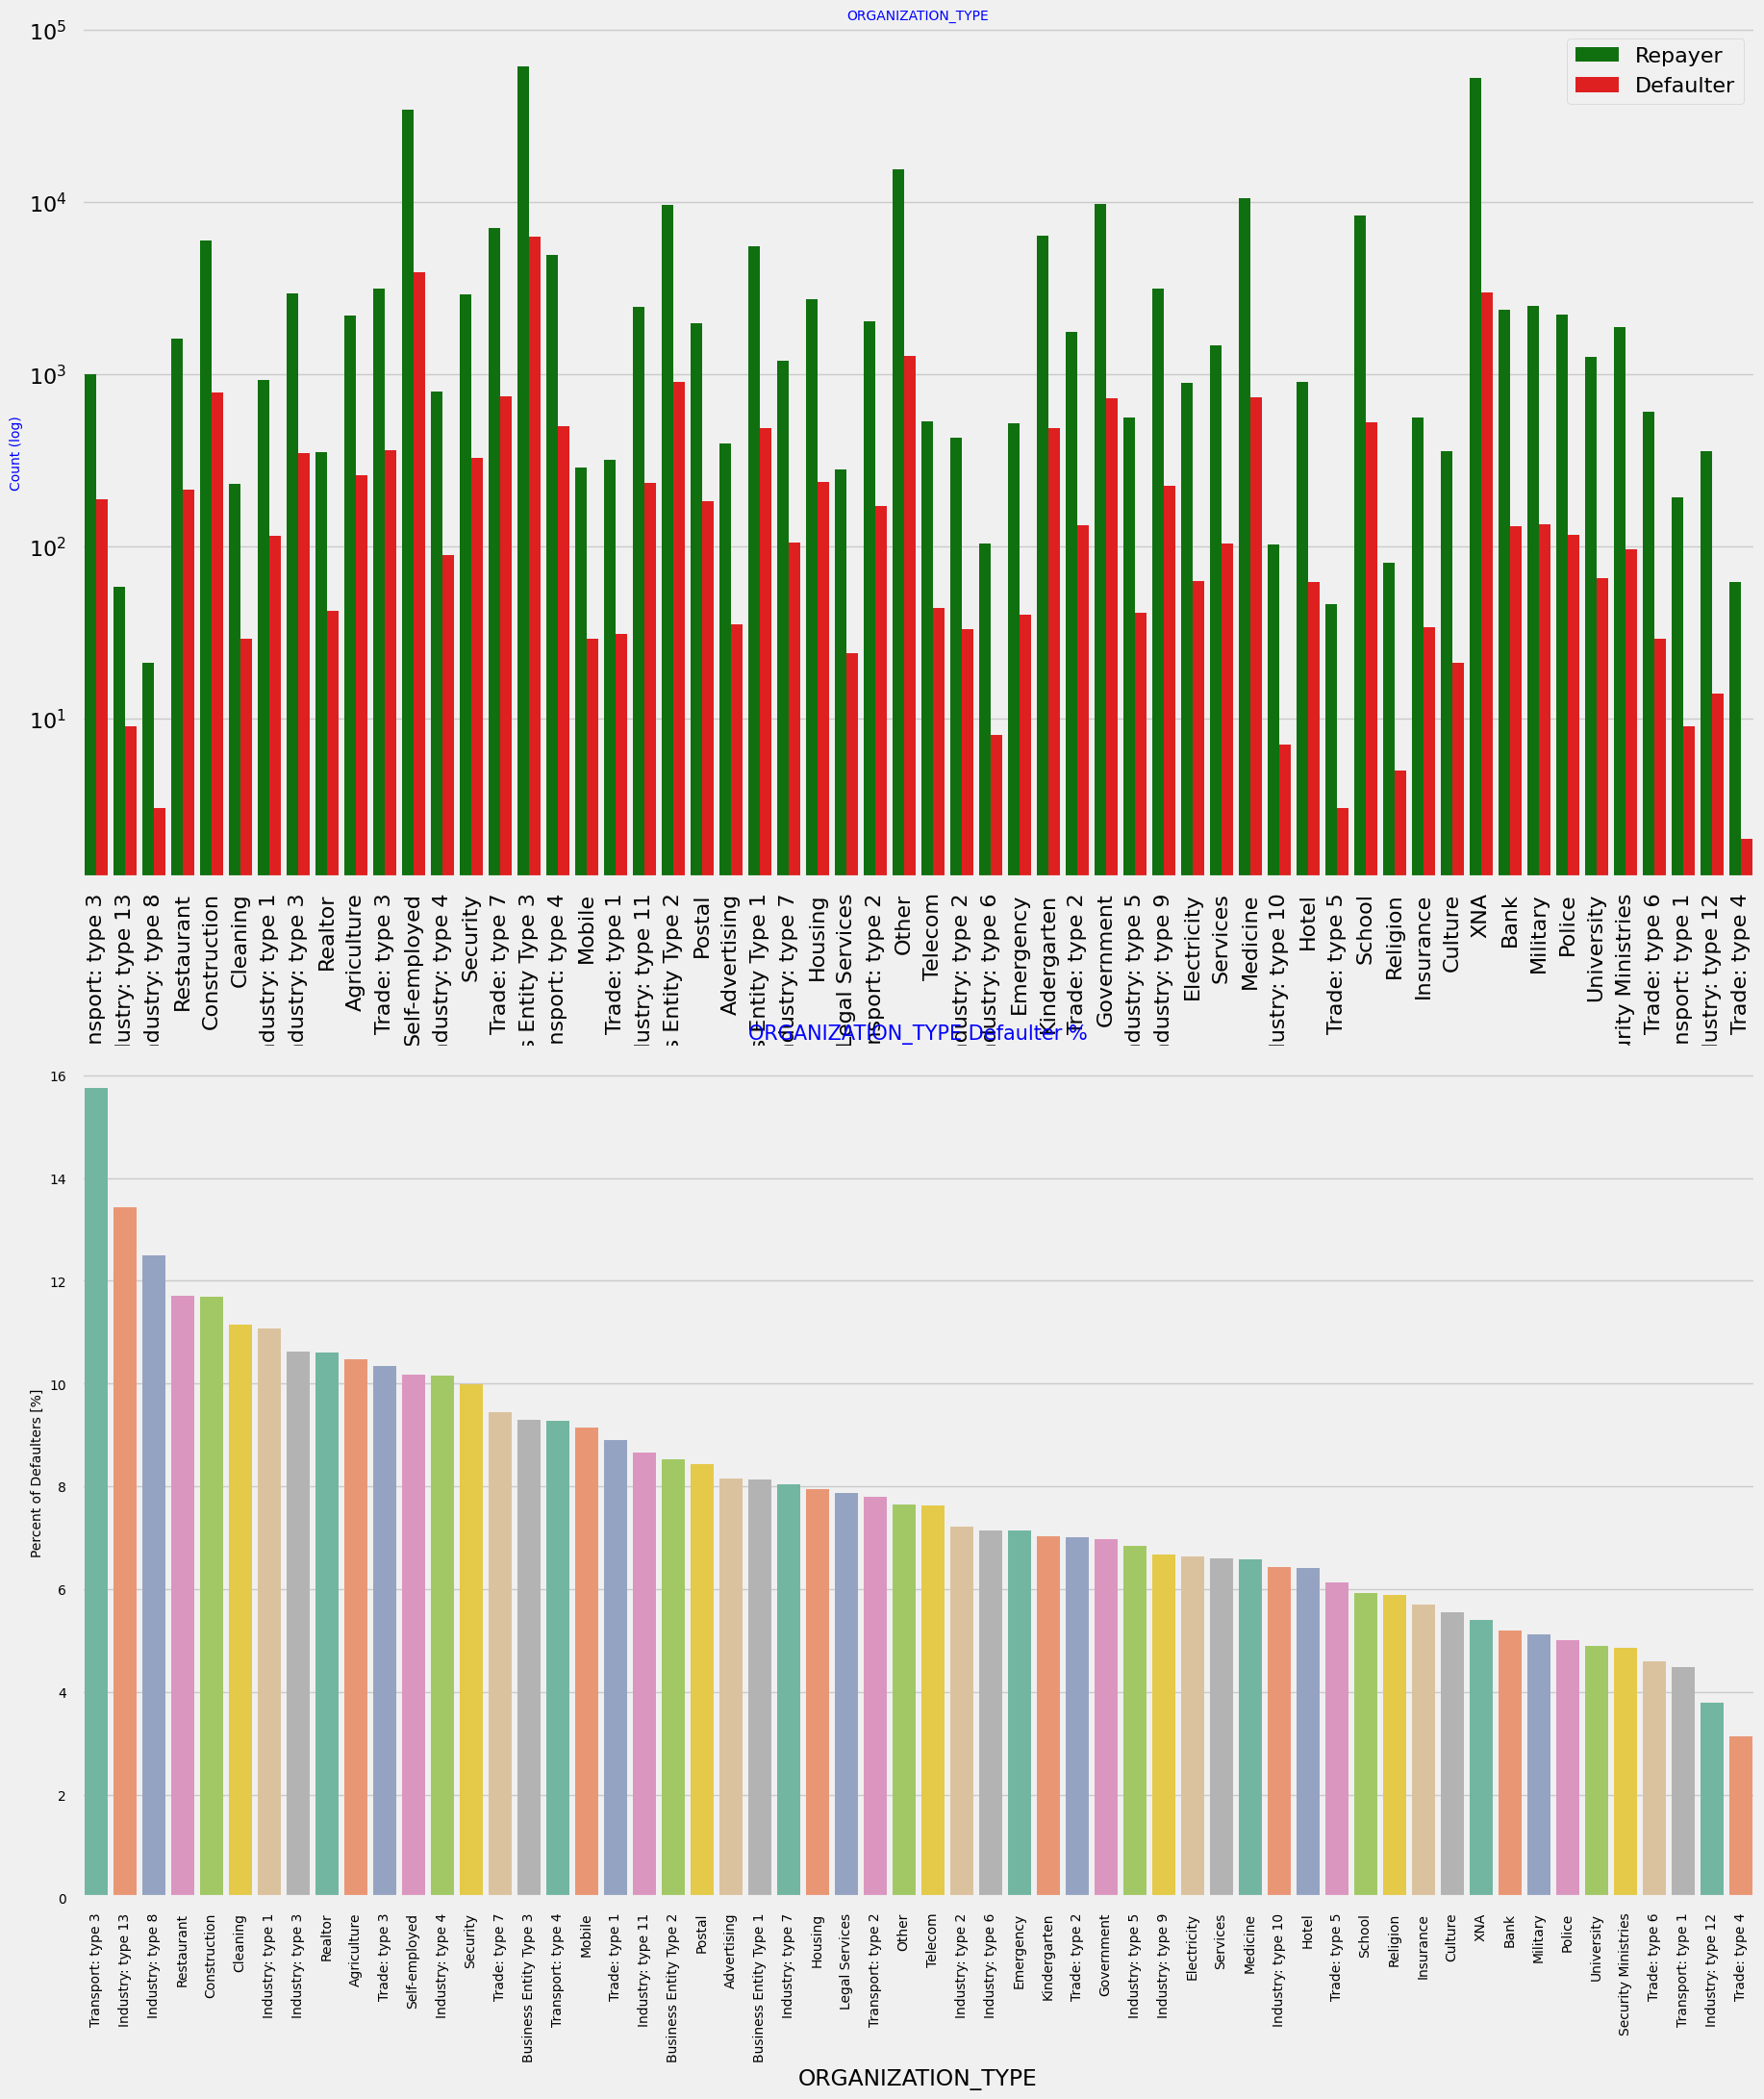

In [96]:
# Checking Loan repayment status based on Organization type
univariate_categorical("ORGANIZATION_TYPE",True,True,False)

<div class="alert alert-block alert-info">
    <span style='font-family:Georgia'>
        <b>Inferences: </b>
        <ol>
            <li>Organizations with highest percent of loans not repaid are Transport: type 3 (16%), Industry: type 13 (13.5%), Industry: type 8 (12.5%) and Restaurant (less than 12%). Self employed people have relative high defaulting rate, and thus should be avoided to be approved for loan or provide loan with higher interest rate to mitigate the risk of defaulting.</li>
            <li>Most of the people application for loan are from Business Entity Type 3 </li>
            <li>For a very high number of applications, Organization type information is unavailable(XNA)</li>
        </ol>
        It can be seen that following category of organization type has lesser defaulters thus safer for providing loans:
        <ul>
            <li>Trade Type 4 and 5</li>
            <li>Industry type 8</li>
        </ul>
    </span>    
</div>

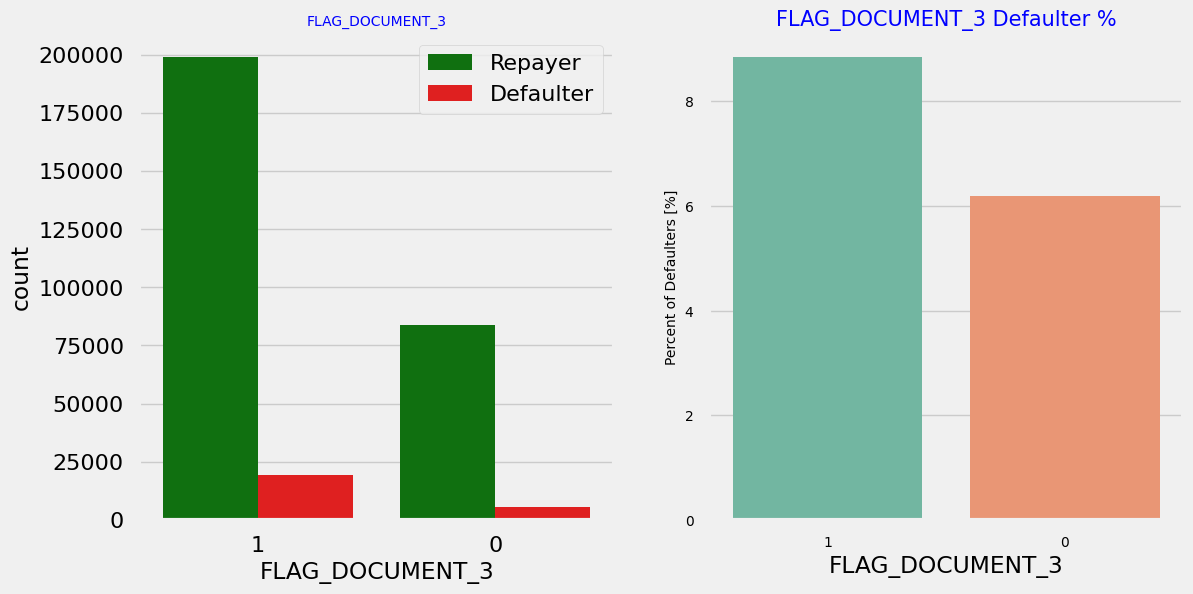

In [97]:
# Analyzing Flag_Doc_3 submission status based on loan repayment status
univariate_categorical("FLAG_DOCUMENT_3",False,False,True)

<div class="alert alert-block alert-info">
    <span style='font-family:Georgia'>
        <b>Inferences: </b>
        <br>There is no significant correlation between repayers and defaulters in terms of submitting document 3 as we see even if applicants have submitted the document, they have defaulted a slightly more (~9%) than who have not submitted the document (6%)
    </span>    
</div>

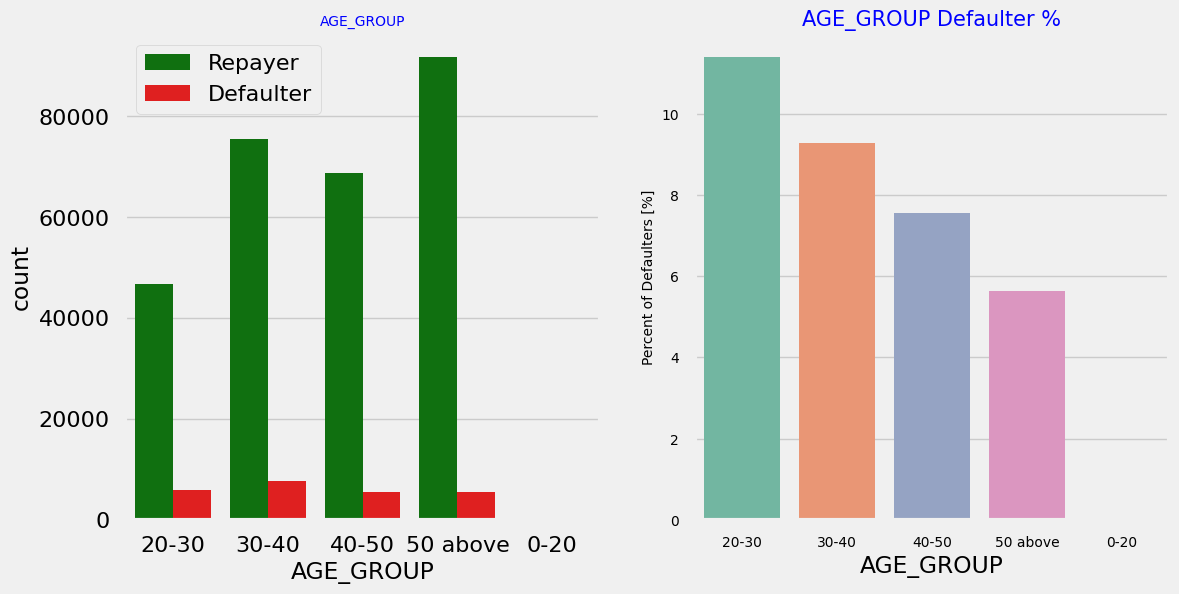

In [98]:
# Analyzing Age Group based on loan repayment status
univariate_categorical("AGE_GROUP",False,False,True)

<div class="alert alert-block alert-info">
    <span style='font-family:Georgia'>
        <b>Inferences: </b>
        <ol>
            <li>People in the age group range 20-40 have higher probability of defaulting</li>
            <li>People above age of 50 have low probability of defailting </li>
        </ol>
    </span>    
</div>

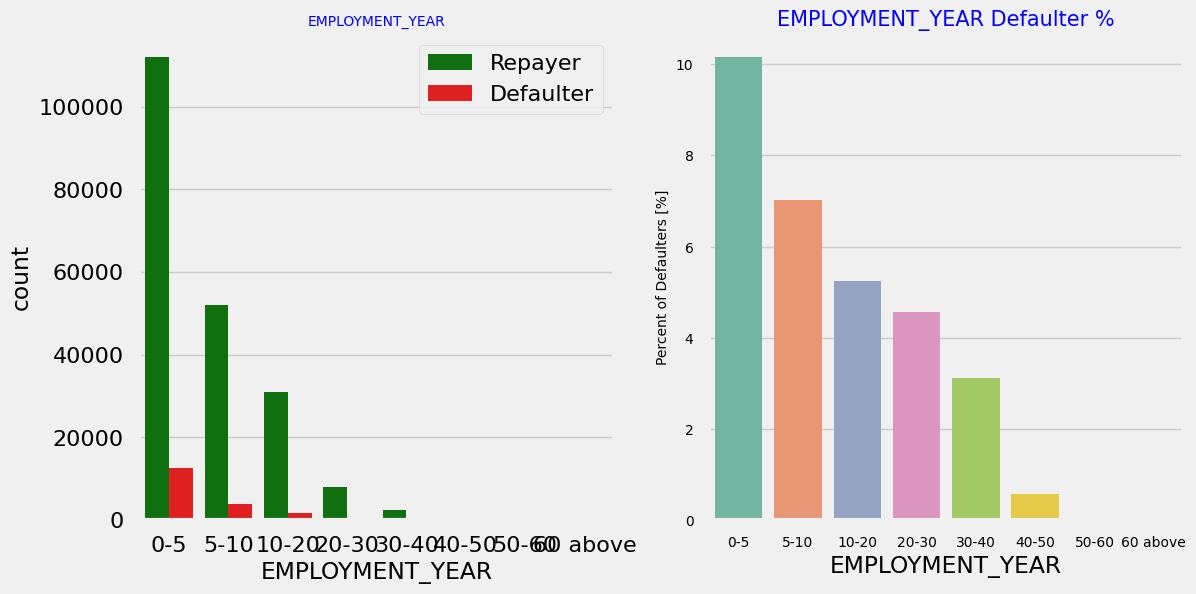

In [99]:
# Analyzing Employment_Year based on loan repayment status
univariate_categorical("EMPLOYMENT_YEAR",False,False,True)

<div class="alert alert-block alert-info">
    <span style='font-family:Georgia'>
        <b>Inferences: </b>
        <ol>
            <li>Majority of the applicants have been employeed in between 0-5 years. The defaulting rating of this group is also the highest which is 10%</li>
            <li>With increase of employment year, defaulting rate is gradually decreasing with people having 40+ year experience having less than 1% default rate </li>
        </ol>
    </span>    
</div>

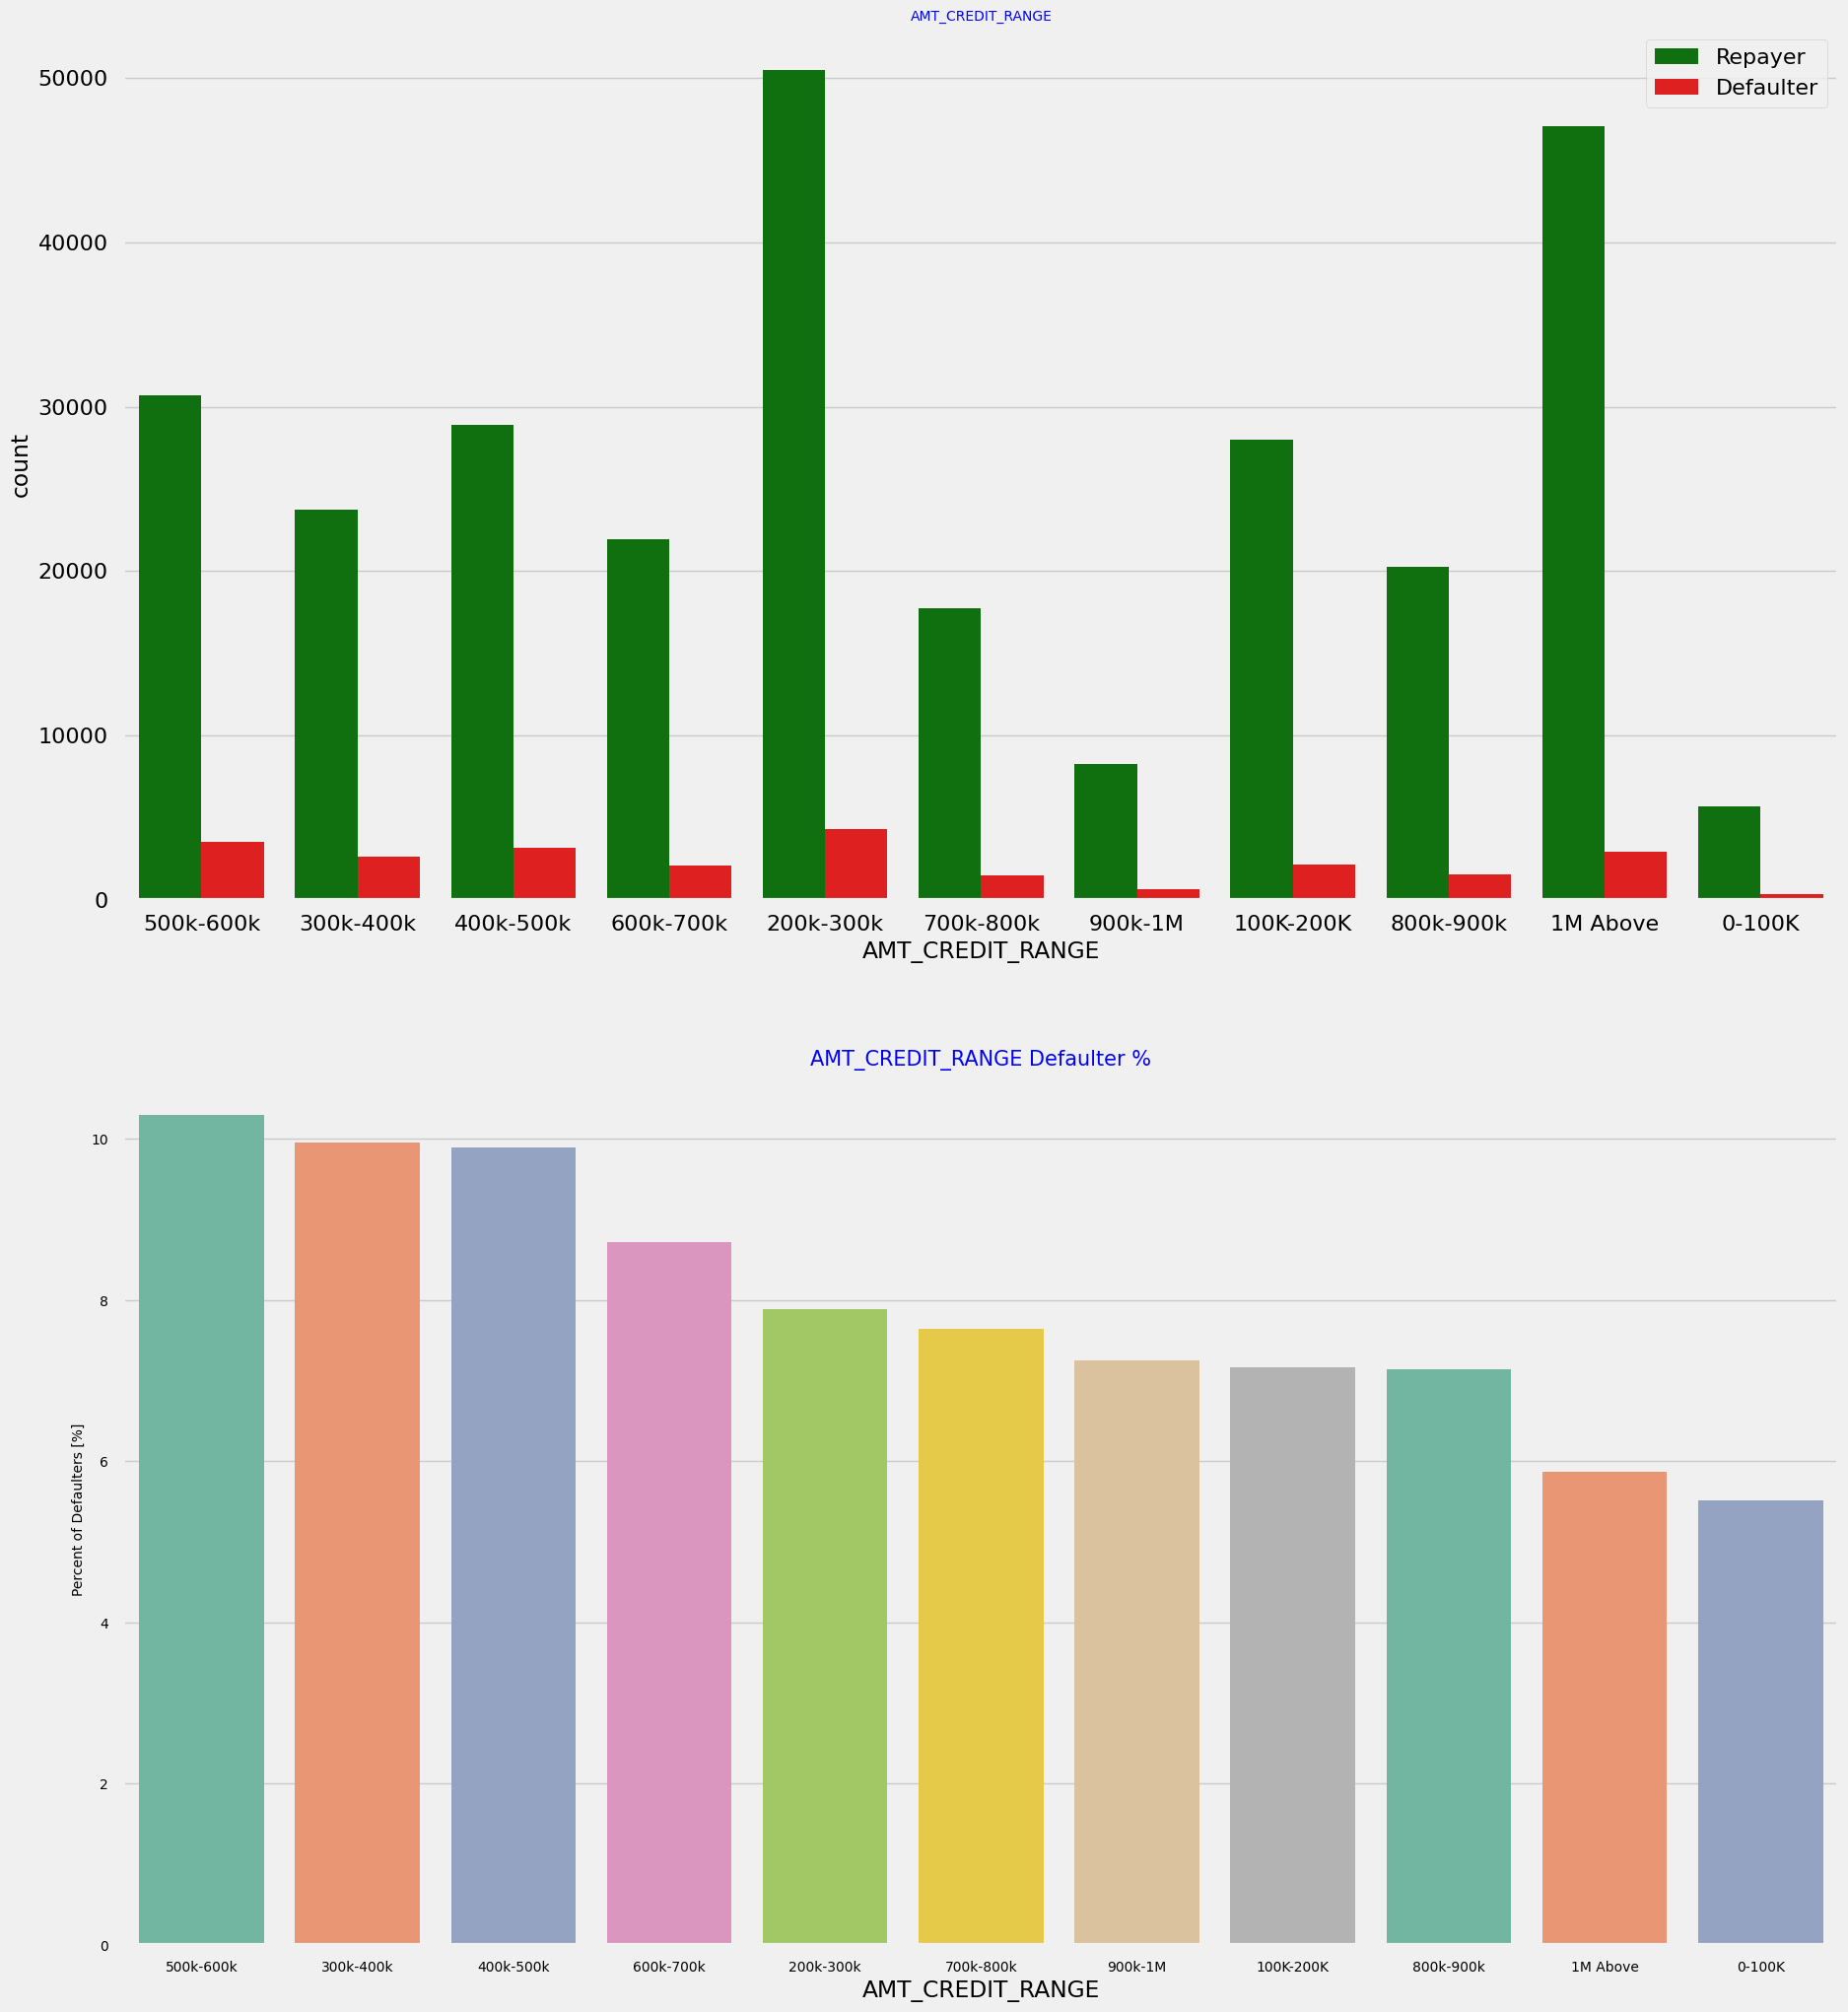

In [100]:
# Analyzing Amount_Credit based on loan repayment status
univariate_categorical("AMT_CREDIT_RANGE",False,False,False)

<div class="alert alert-block alert-info">
    <span style='font-family:Georgia'>
        <b>Inferences: </b>
        <ol>
            <li>More than 80% of the loan provided are for amount less than 900,000</li>
            <li>People who get loan for 300-600k tend to default more than others. </li>
        </ol>
    </span>    
</div>

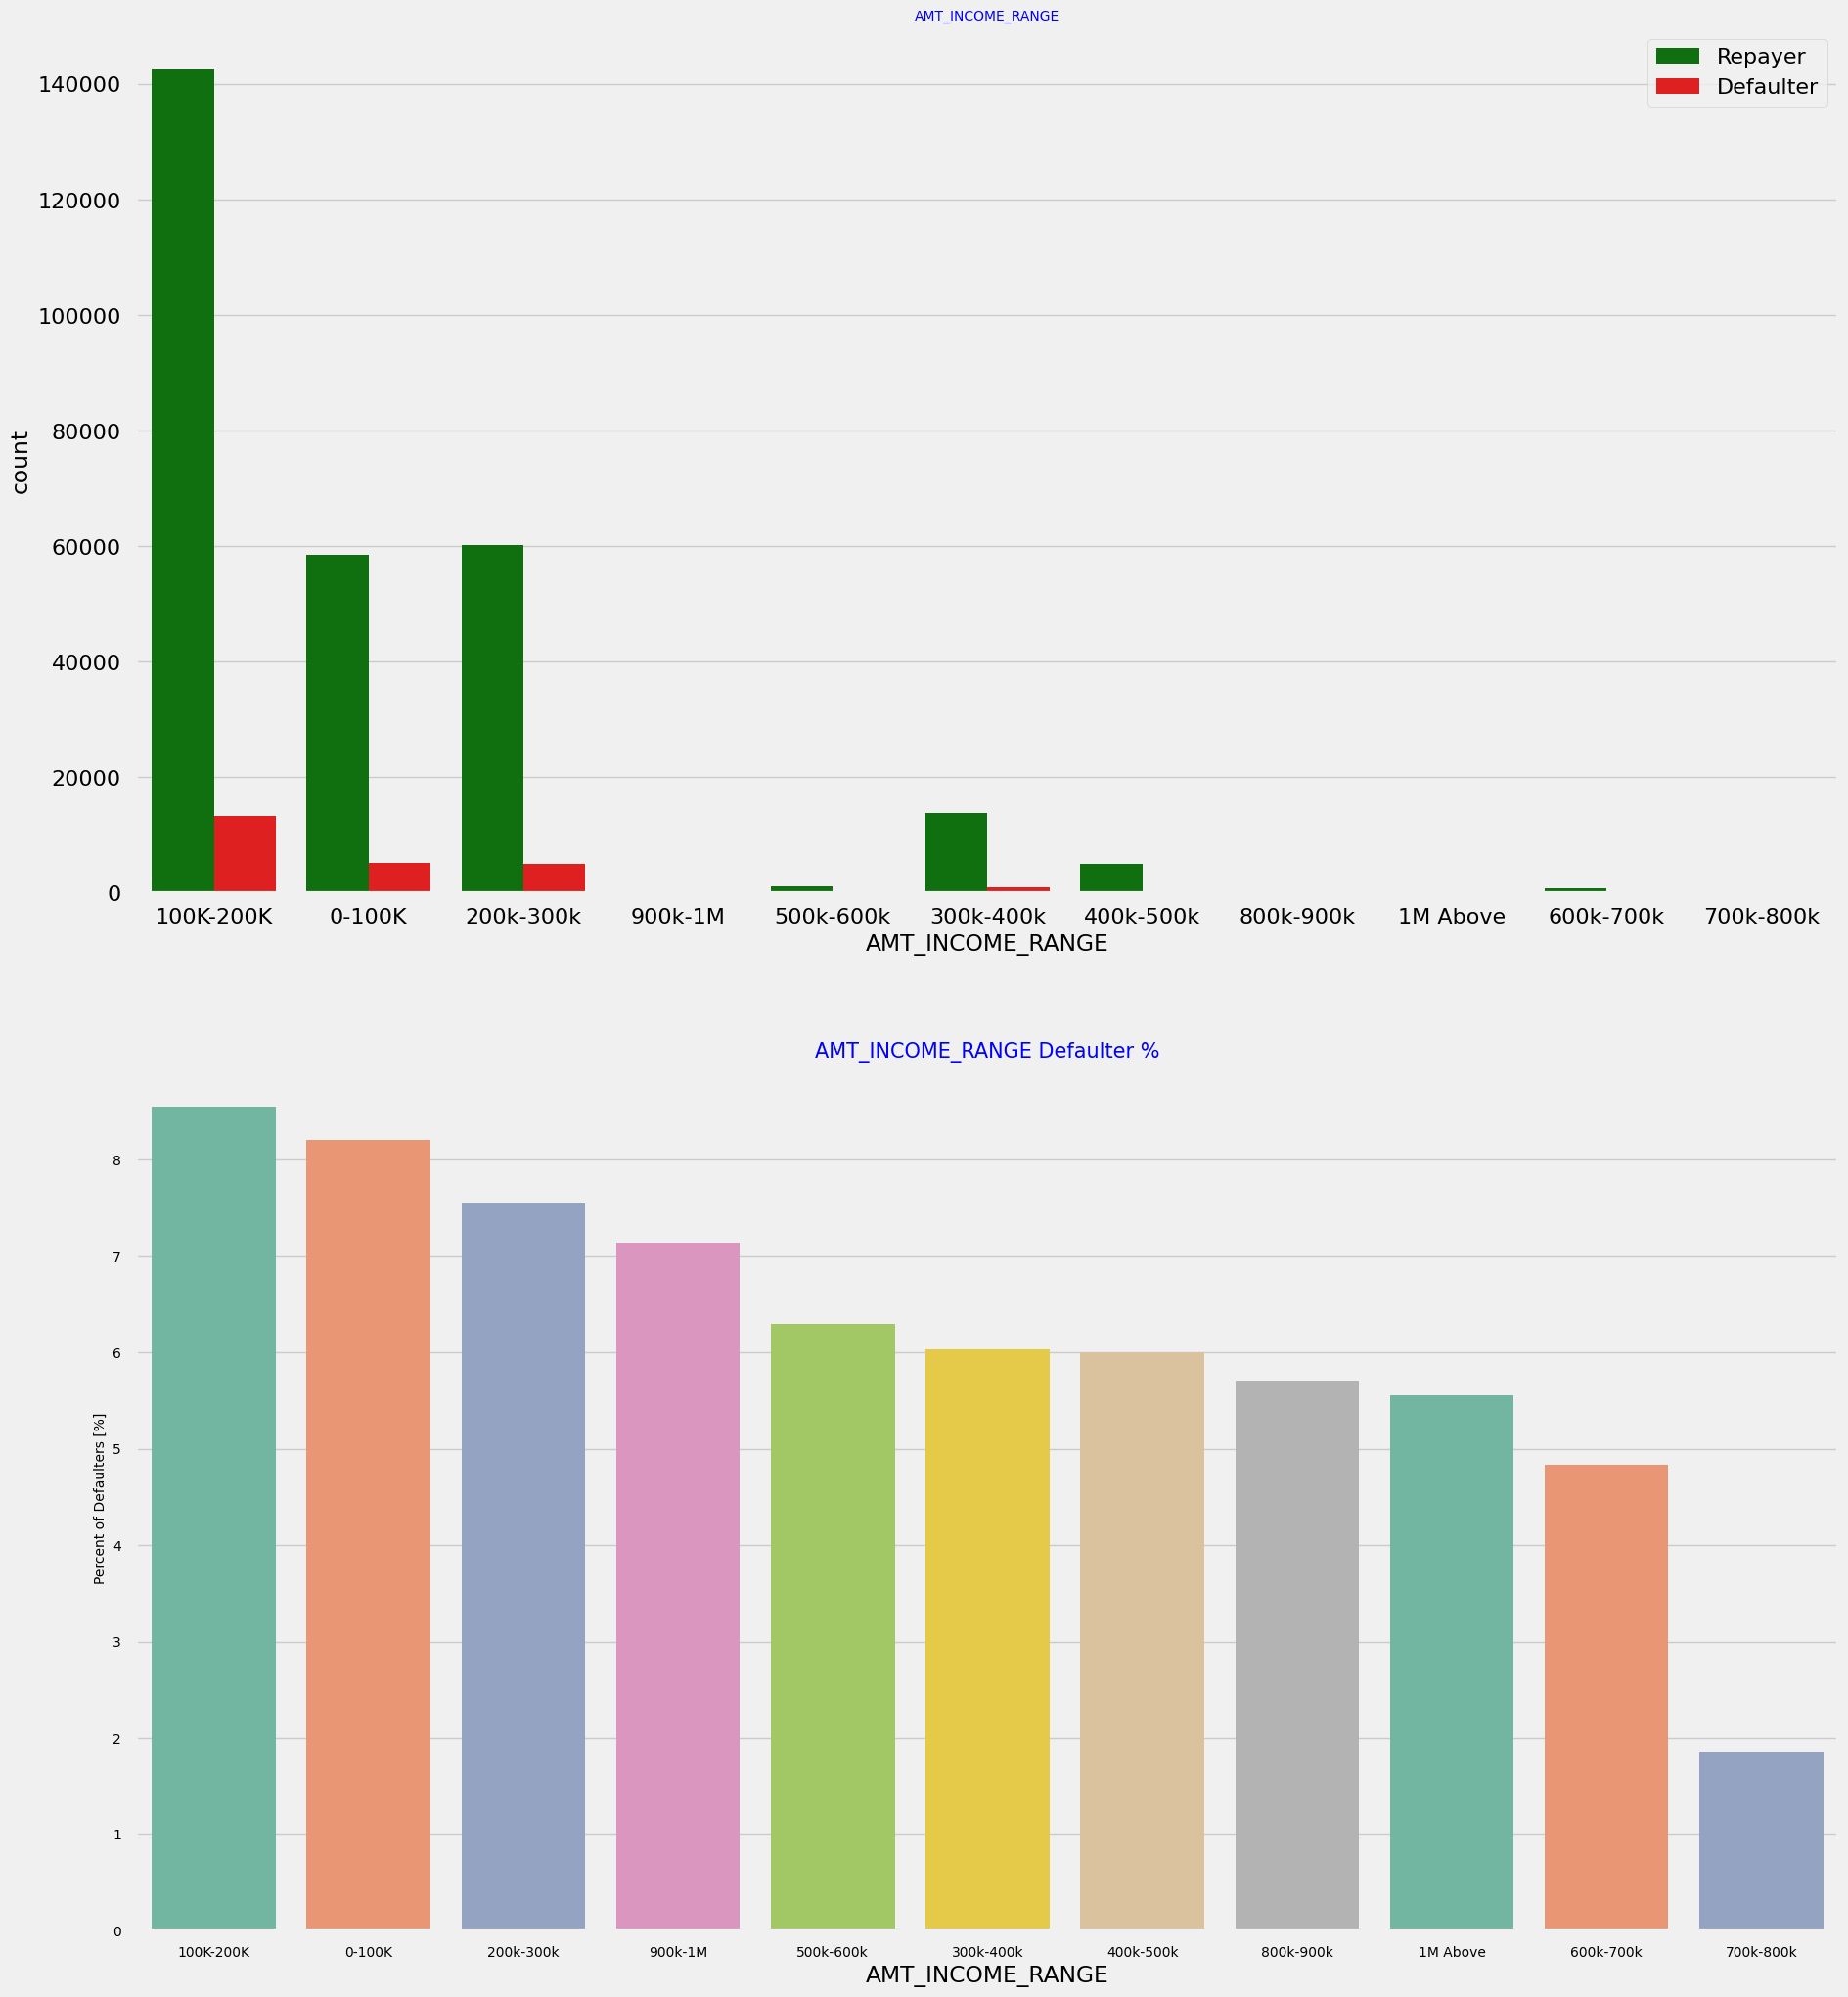

In [101]:
# Analyzing Amount_Income Range based on loan repayment status
univariate_categorical("AMT_INCOME_RANGE",False,False,False)

<div class="alert alert-block alert-info">
    <span style='font-family:Georgia'>
        <b>Inferences: </b>
        <ol>
            <li>90% of the applications have Income total less than 300,000</li>
            <li>Application with Income less than 300,000 has high probability of defaulting</li>
            <li>Applicant with Income more than 700,000 are less likely to default </li>
        </ol>
    </span>    
</div>

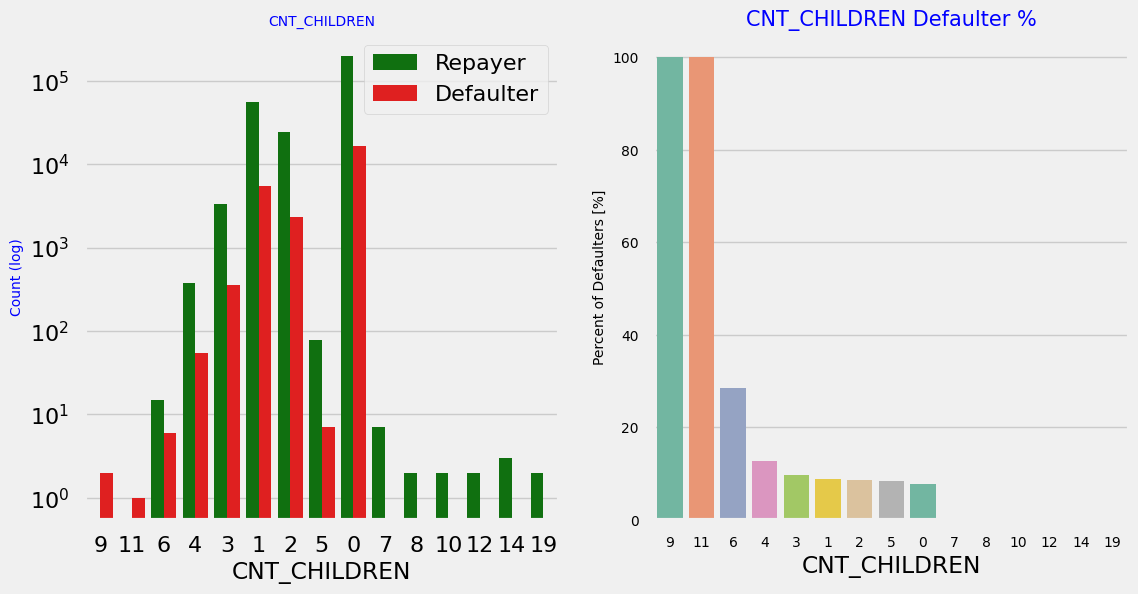

In [102]:
# Analyzing Number of children based on loan repayment status
univariate_categorical("CNT_CHILDREN",True)

<div class="alert alert-block alert-info">
    <span style='font-family:Georgia'>
        <b>Inferences: </b>
        <ol>
            <li>Most of the applicants do not have children</li>
            <li>Very few clients have more than 3 children.</li>
            <li>Client who have more than 4 children has a very high default rate with child count 9 and 11 showing 100% default rate</li>
        </ol>
    </span>    
</div>

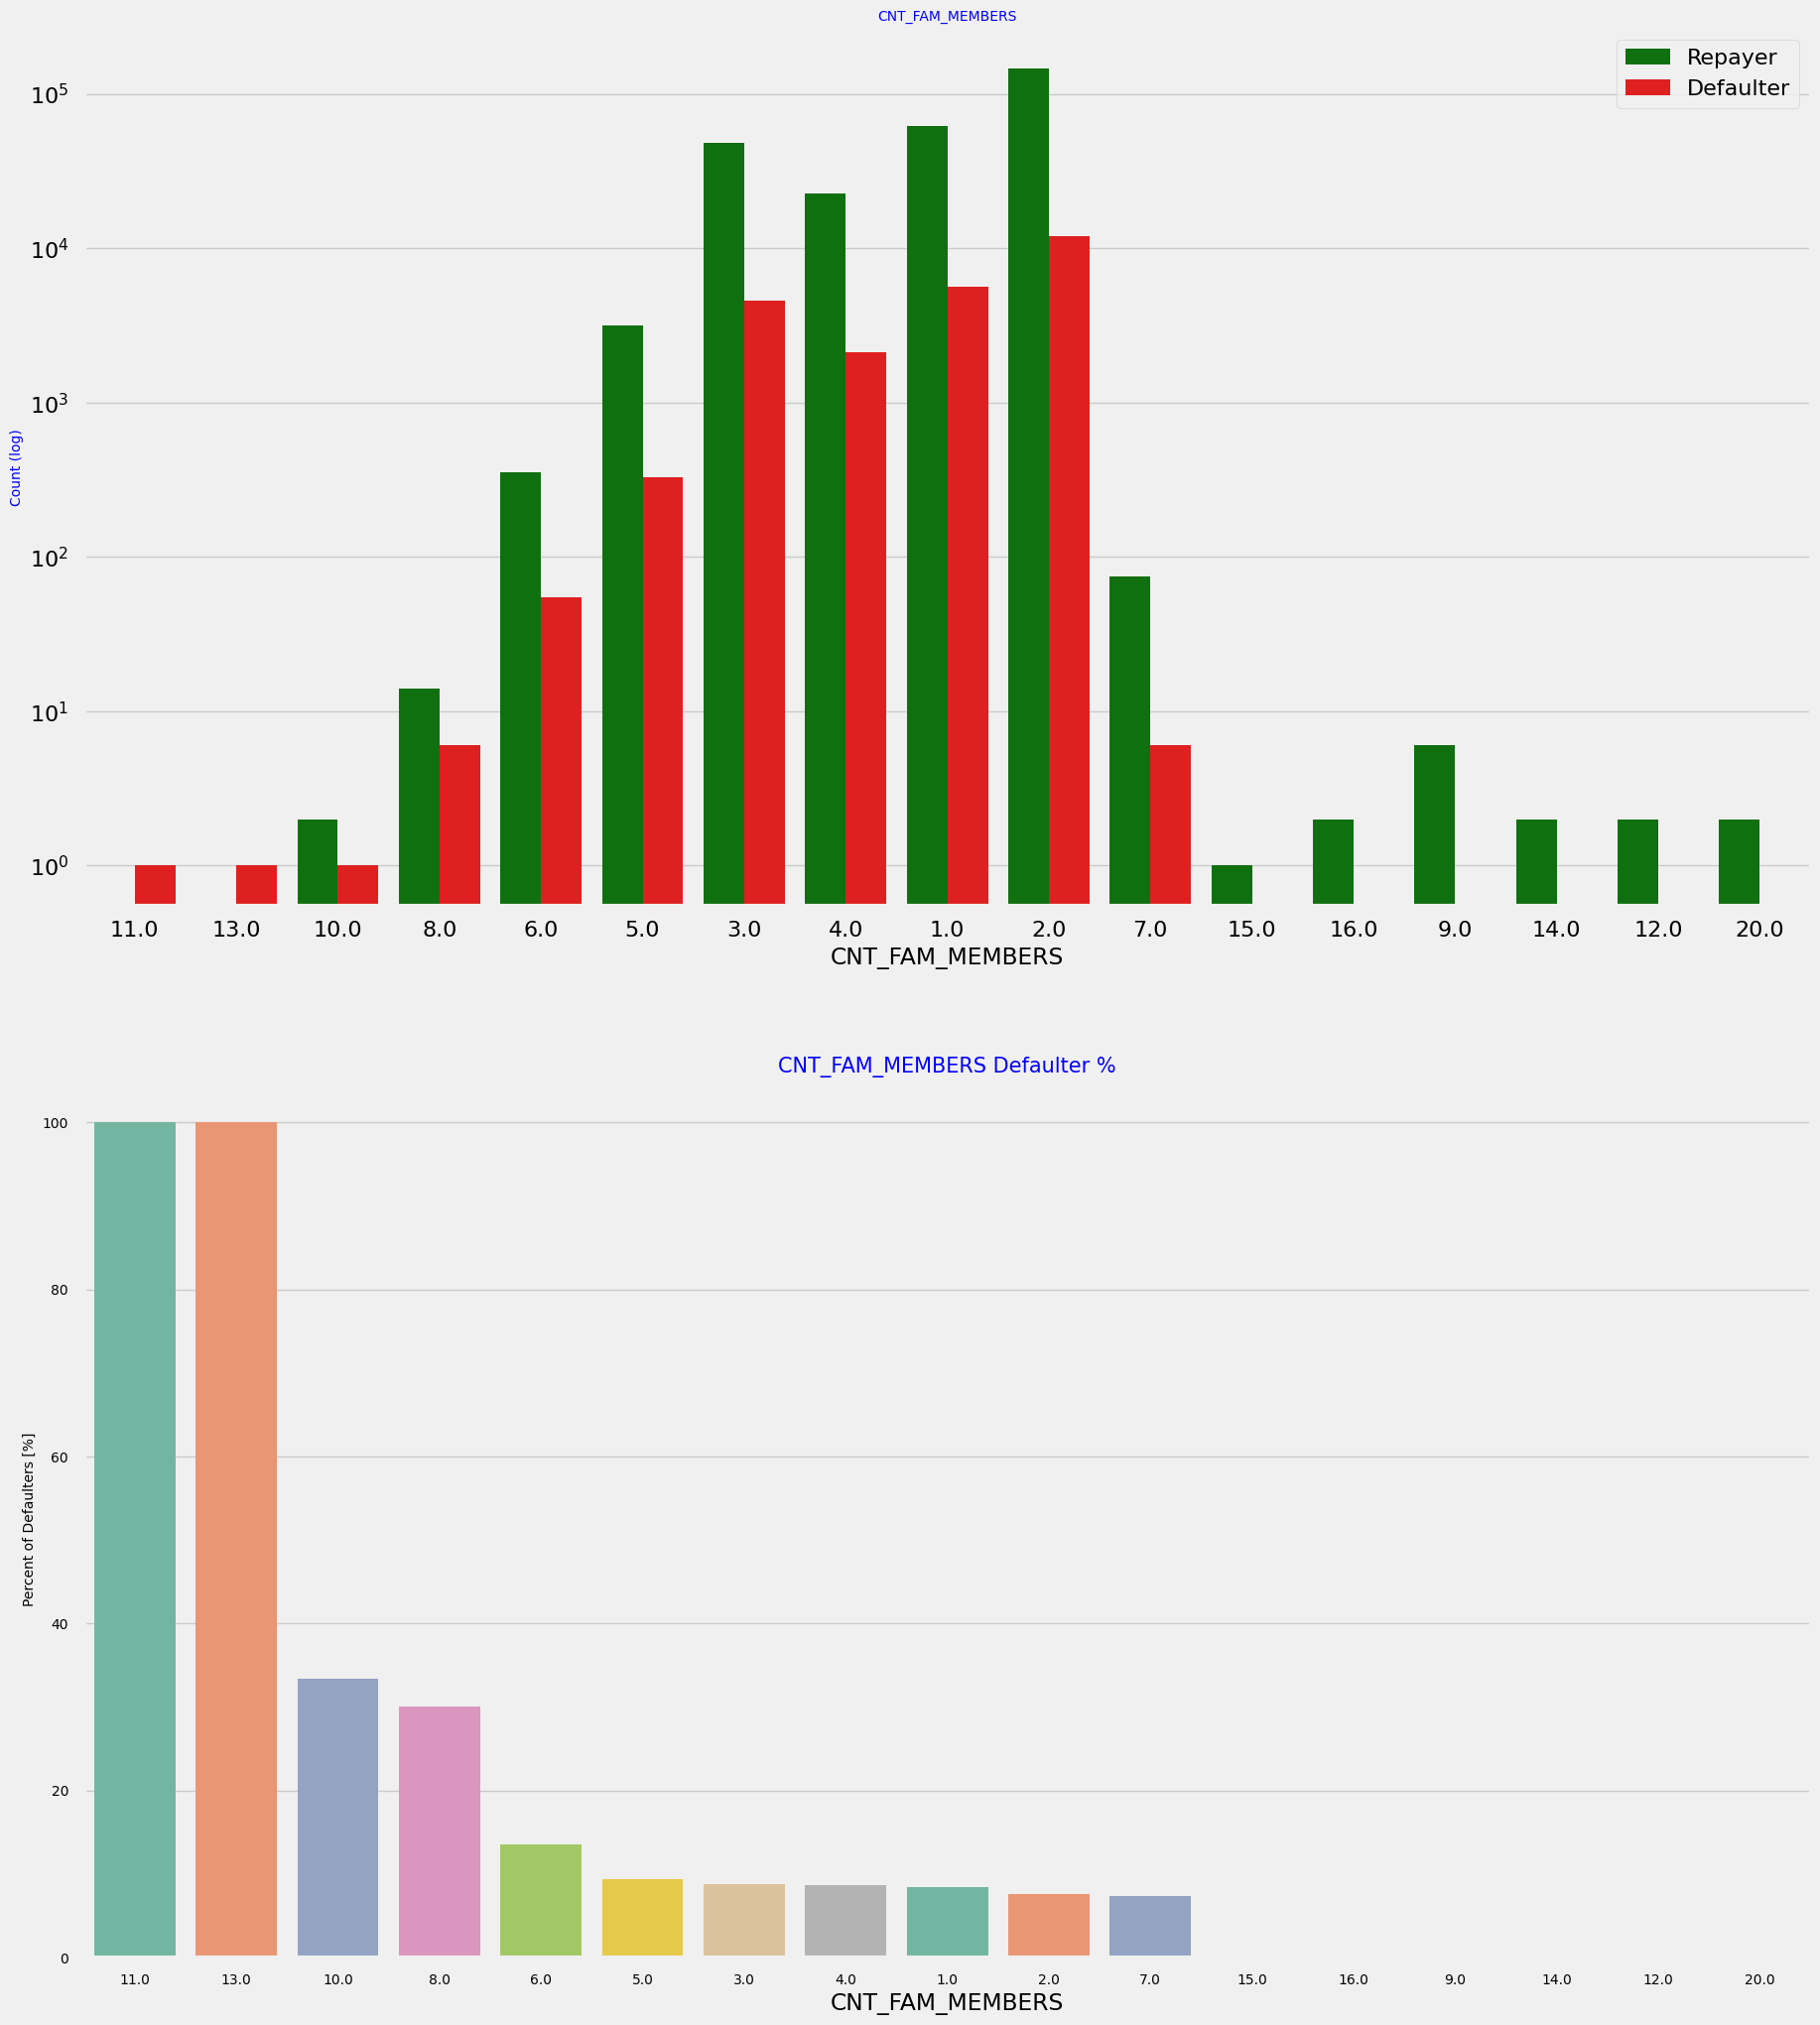

In [103]:
# Analyzing Number of family members based on loan repayment status
univariate_categorical("CNT_FAM_MEMBERS",True, False, False)

<div class="alert alert-block alert-info">
    <span style='font-family:Georgia'>
        <b>Inferences: </b>
        <br>Family member follows the same trend as children where having more family members increases the risk of defaulting
    </span>    
</div>

<h4>   
      <font color = darkgreen >
            <span style='font-family:Georgia'>
             5.3.2 Categorical Bi/Multivariate Analysis
            </span>   
        </font>    
</h4>

In [104]:
applicationDF.groupby('NAME_INCOME_TYPE')['AMT_INCOME_TOTAL'].describe()

count      mean       std     min    25%     50%      75%        max
NAME_INCOME_TYPE                                                                             
Businessman               10.0  6.525000  6.272260  1.8000  2.250  4.9500  8.43750    22.5000
Commercial associate   71617.0  2.029553  1.479742  0.2655  1.350  1.8000  2.25000   180.0009
Maternity leave            5.0  1.404000  1.268569  0.4950  0.675  0.9000  1.35000     3.6000
Pensioner              55362.0  1.364013  0.766503  0.2565  0.900  1.1700  1.66500    22.5000
State servant          21703.0  1.797380  1.008806  0.2700  1.125  1.5750  2.25000    31.5000
Student                   18.0  1.705000  1.066447  0.8100  1.125  1.5750  1.78875     5.6250
Unemployed                22.0  1.105364  0.880551  0.2655  0.540  0.7875  1.35000     3.3750
Working               158774.0  1.631699  3.075777  0.2565  1.125  1.3500  2.02500  1170.0000

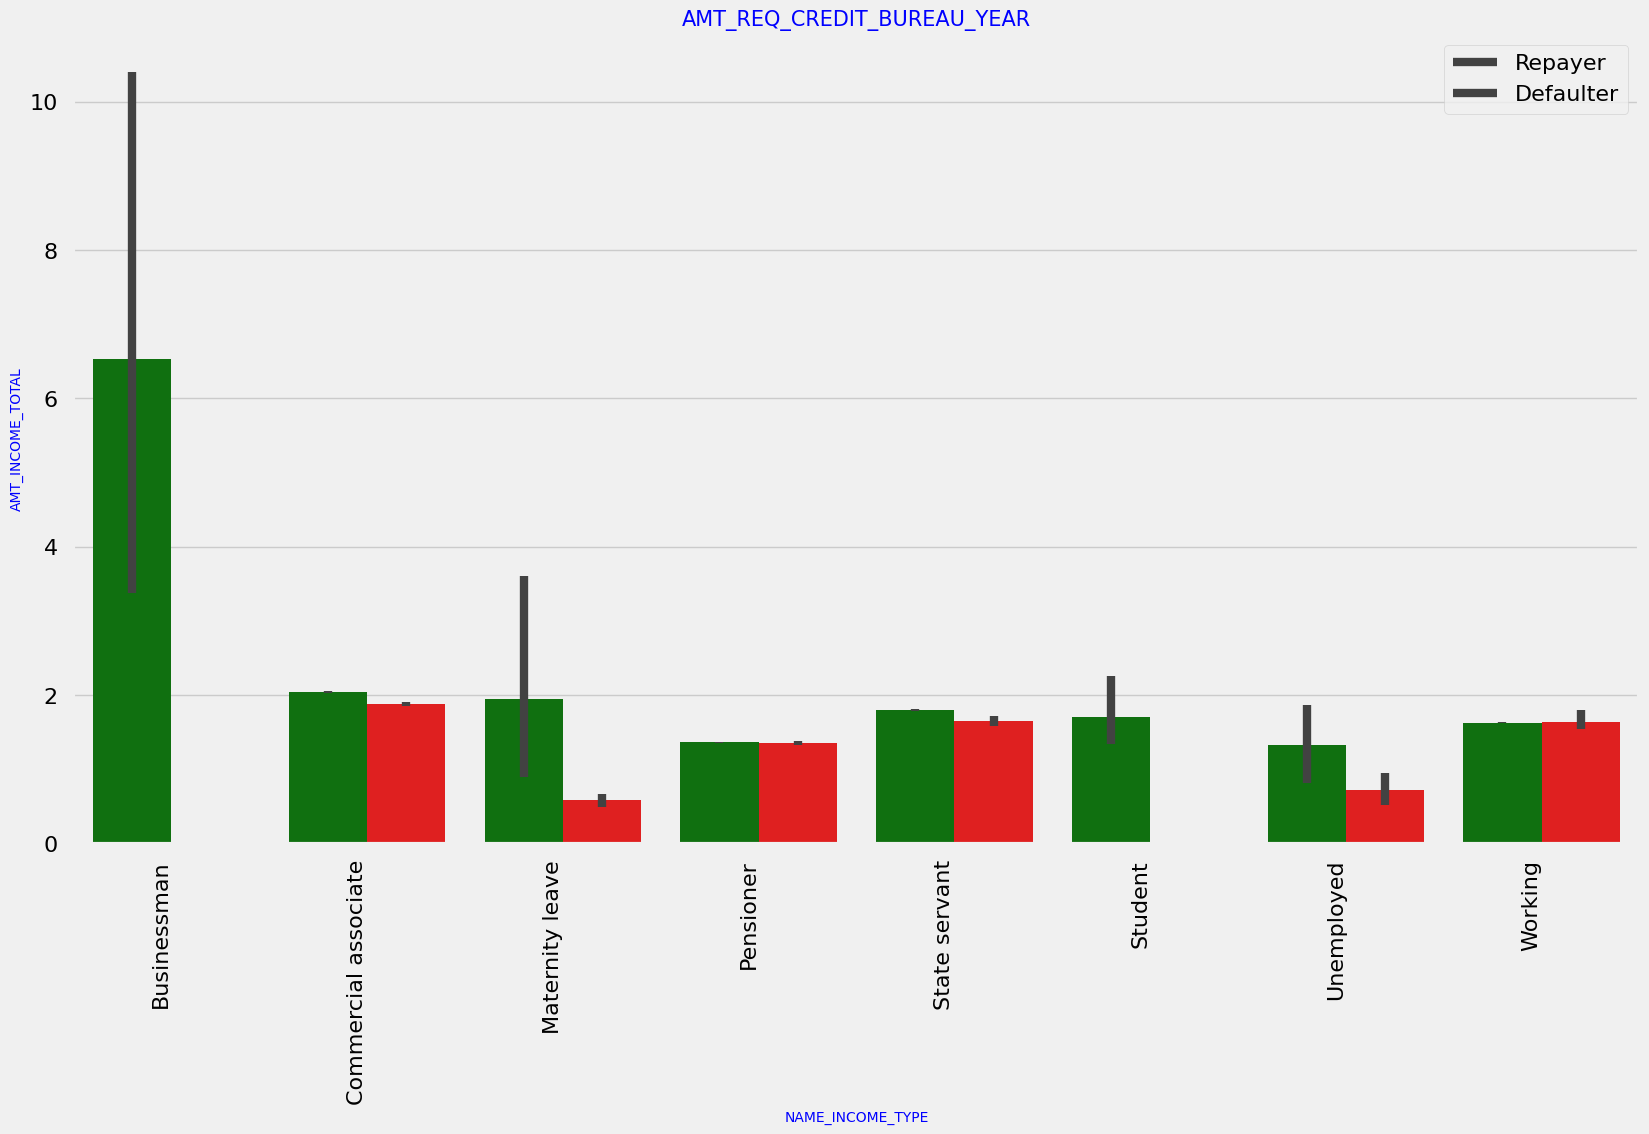

In [105]:
# Income type vs Income Amount Range
bivariate_bar("NAME_INCOME_TYPE","AMT_INCOME_TOTAL",applicationDF,"TARGET",(18,10))

<div class="alert alert-block alert-info">
    <span style='font-family:Georgia'>
        <b>Inferences: </b>
        <br>It can be seen that business man's income is the highest and the estimated range with default 95% confidence level seem to indicate that the income of a business man could be in the range of slightly close to 4 lakhs and slightly above 10 lakhs
    </span>    
</div>

<a id="numvar"></a>
<h3>   
      <font color = purple >
            <span style='font-family:Georgia'>
             5.4 Numeric Variables Analysis
            </span>   
        </font>    
</h3>

<h4>   
      <font color = darkgreen >
            <span style='font-family:Georgia'>
             5.4.1 Bifurcating the applicationDF dataframe based on Target value 0 and 1 for correlation and other analysis
            </span>   
        </font>    
</h4>

In [106]:
applicationDF.columns

Index(['SK_ID_CURR', 'TARGET', 'NAME_CONTRACT_TYPE', 'CODE_GENDER', 'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL', 'AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE', 'NAME_TYPE_SUITE', 'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE', 'REGION_POPULATION_RELATIVE', 'DAYS_BIRTH', 'DAYS_EMPLOYED', 'DAYS_REGISTRATION', 'DAYS_ID_PUBLISH', 'OCCUPATION_TYPE', 'CNT_FAM_MEMBERS', 'REGION_RATING_CLIENT', 'REGION_RATING_CLIENT_W_CITY', 'WEEKDAY_APPR_PROCESS_START', 'HOUR_APPR_PROCESS_START', 'REG_REGION_NOT_LIVE_REGION', 'REG_REGION_NOT_WORK_REGION', 'LIVE_REGION_NOT_WORK_REGION', 'REG_CITY_NOT_LIVE_CITY', 'REG_CITY_NOT_WORK_CITY', 'LIVE_CITY_NOT_WORK_CITY', 'ORGANIZATION_TYPE', 'OBS_30_CNT_SOCIAL_CIRCLE', 'DEF_30_CNT_SOCIAL_CIRCLE', 'OBS_60_CNT_SOCIAL_CIRCLE', 'DEF_60_CNT_SOCIAL_CIRCLE', 'DAYS_LAST_PHONE_CHANGE', 'FLAG_DOCUMENT_3', 'AMT_REQ_CREDIT_BUREAU_HOUR', 'AMT_REQ_CREDIT_BUREAU_DAY', 'AMT_REQ_CREDIT_BUREAU_WEEK',
       'AMT_REQ_CRED

In [107]:
# Bifurcating the applicationDF dataframe based on Target value 0 and 1 for correlation and other analysis
cols_for_correlation = ['NAME_CONTRACT_TYPE', 'CODE_GENDER', 'FLAG_OWN_CAR', 'FLAG_OWN_REALTY',
                        'CNT_CHILDREN', 'AMT_INCOME_TOTAL', 'AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE',
                        'NAME_TYPE_SUITE', 'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS',
                        'NAME_HOUSING_TYPE', 'REGION_POPULATION_RELATIVE', 'DAYS_BIRTH', 'DAYS_EMPLOYED',
                        'DAYS_REGISTRATION', 'DAYS_ID_PUBLISH', 'OCCUPATION_TYPE', 'CNT_FAM_MEMBERS', 'REGION_RATING_CLIENT',
                        'REGION_RATING_CLIENT_W_CITY', 'WEEKDAY_APPR_PROCESS_START', 'HOUR_APPR_PROCESS_START',
                        'REG_REGION_NOT_LIVE_REGION', 'REG_REGION_NOT_WORK_REGION', 'LIVE_REGION_NOT_WORK_REGION',
                        'REG_CITY_NOT_LIVE_CITY', 'REG_CITY_NOT_WORK_CITY', 'LIVE_CITY_NOT_WORK_CITY', 'ORGANIZATION_TYPE',
                        'OBS_60_CNT_SOCIAL_CIRCLE', 'DEF_60_CNT_SOCIAL_CIRCLE', 'DAYS_LAST_PHONE_CHANGE', 'FLAG_DOCUMENT_3',
                        'AMT_REQ_CREDIT_BUREAU_HOUR', 'AMT_REQ_CREDIT_BUREAU_DAY', 'AMT_REQ_CREDIT_BUREAU_WEEK',
                        'AMT_REQ_CREDIT_BUREAU_MON', 'AMT_REQ_CREDIT_BUREAU_QRT', 'AMT_REQ_CREDIT_BUREAU_YEAR']


Repayer_df = applicationDF.loc[applicationDF['TARGET']==0, cols_for_correlation] # Repayers
Defaulter_df = applicationDF.loc[applicationDF['TARGET']==1, cols_for_correlation] # Defaulters

<h4>   
      <font color = darkgreen >
            <span style='font-family:Georgia'>
             5.4.2 Correlation between numeric variable
            </span>   
        </font>    
</h4>

<div class="alert alert-block alert-info">
    <span style='font-family:Georgia'>
        <b>Inferences: </b>
        <br>Correlating factors amongst repayers:<br>
            Credit amount is highly correlated with
            <ul>                
                <li> amount of goods price</li>
                <li> loan annuity</li>
                <li> total income</li>
        </ul>
        We can also see that repayers have high correlation in number of days employed.
    </span>    
</div>

<div class="alert alert-block alert-info">
    <span style='font-family:Georgia'>
        <b>Inferences: </b>
        <ul>
            <li> Credit amount is highly correlated with amount of goods price which is same as repayers. </li>
            <li> But the loan annuity correlation with credit amount has slightly reduced in defaulters(0.75) when compared to repayers(0.77)</li>
            <li> We can also see that repayers have high correlation in number of days employed(0.62) when compared to defaulters(0.58).</li>
            <li> There is a severe drop in the correlation between total income of the client and the credit amount(0.038) amongst defaulters whereas it is 0.342 among repayers.</li>
            <li> Days_birth and number of children correlation has reduced to 0.259 in defaulters when compared to 0.337 in repayers.</li>
            <li> There is a slight increase in defaulted to observed count in social circle among defaulters(0.264) when compared to repayers(0.254)</li>
        </ul>
    </span>    
</div>

<h4>   
      <font color = darkgreen >
            <span style='font-family:Georgia'>
             5.4.3 Numerical Univariate Analysis
            </span>   
        </font>    
</h4>

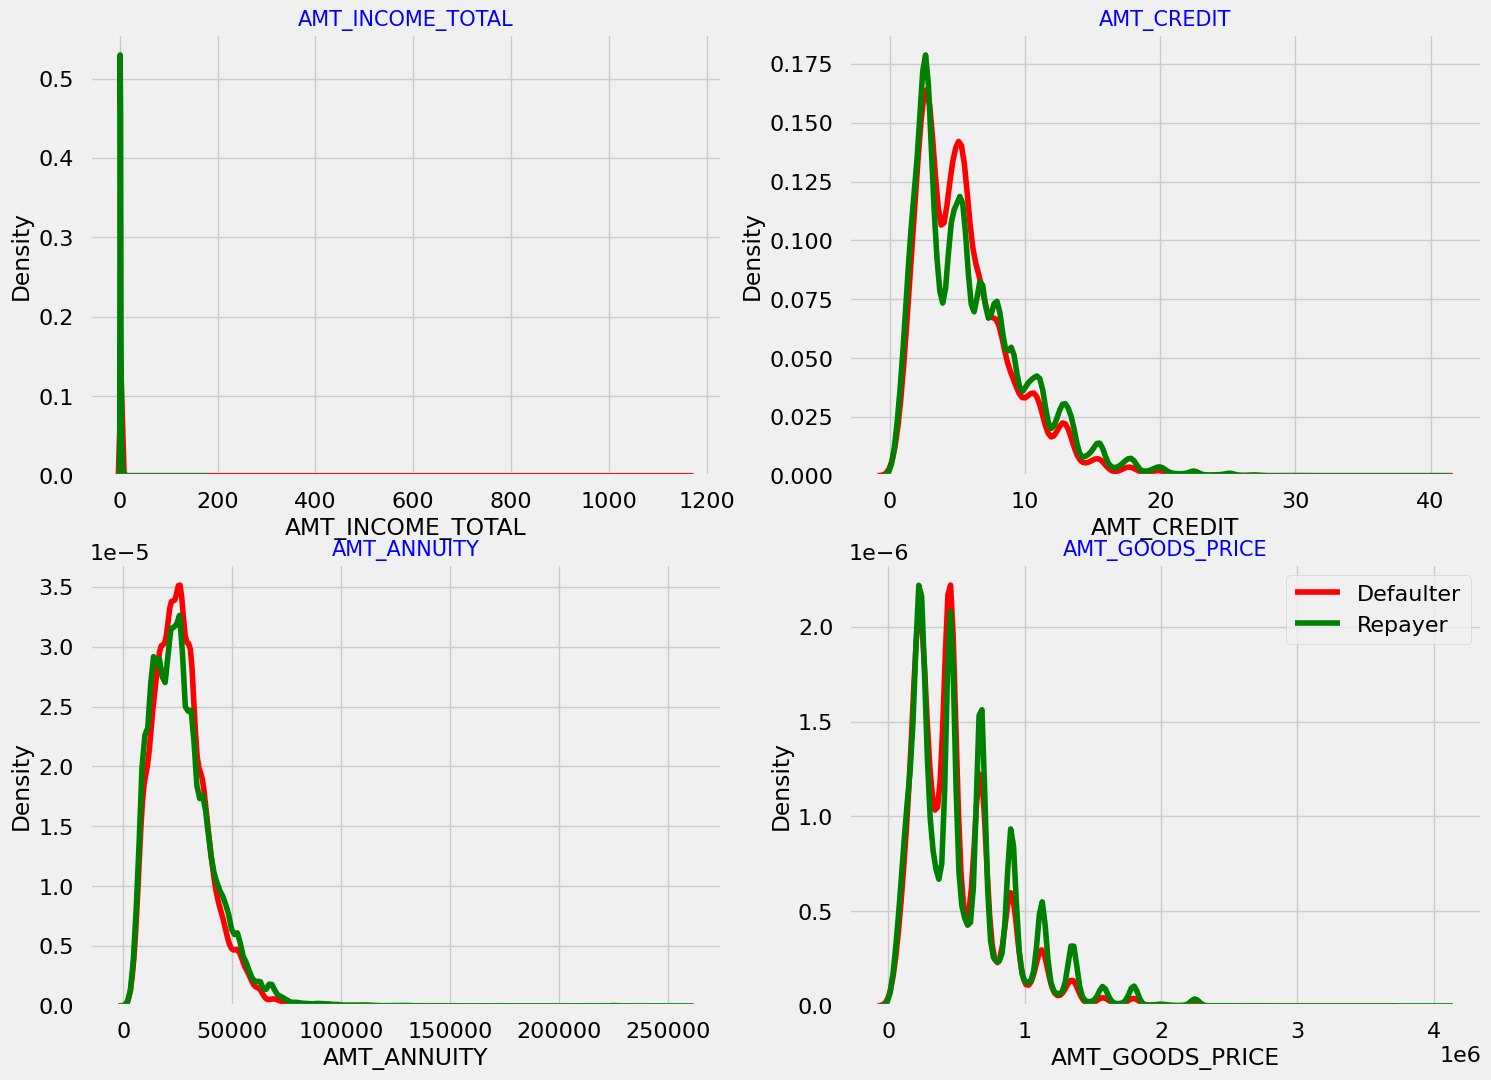

In [111]:
# Plotting the numerical columns related to amount as distribution plot to see density
amount = applicationDF[[ 'AMT_INCOME_TOTAL','AMT_CREDIT','AMT_ANNUITY', 'AMT_GOODS_PRICE']]

fig = plt.figure(figsize=(16,12))

for i in enumerate(amount):
    plt.subplot(2,2,i[0]+1)
    sns.distplot(Defaulter_df[i[1]], hist=False, color='r',label ="Defaulter")
    sns.distplot(Repayer_df[i[1]], hist=False, color='g', label ="Repayer")
    plt.title(i[1], fontdict={'fontsize' : 15, 'fontweight' : 5, 'color' : 'Blue'})

plt.legend()

plt.show()

<div class="alert alert-block alert-info">
    <span style='font-family:Georgia'>
        <b>Inferences: </b>
        <ul>
            <li> Most no of loans are given for goods price below 10 lakhs </li>
            <li> Most people pay annuity below 50000 for the credit loan</li>
            <li> Credit amount of the loan is mostly less then 10 lakhs</li>
            <li> The repayers and defaulters distribution overlap in all the plots and hence we cannot use any of these variables in isolation to make a decision</li>
        </ul>
    </span>    
</div>

<h4>   
      <font color = darkgreen >
            <span style='font-family:Georgia'>
             5.4.4 Numerical Bivariate Analysis
            </span>   
        </font>    
</h4>

<Figure size 1500x600 with 0 Axes>

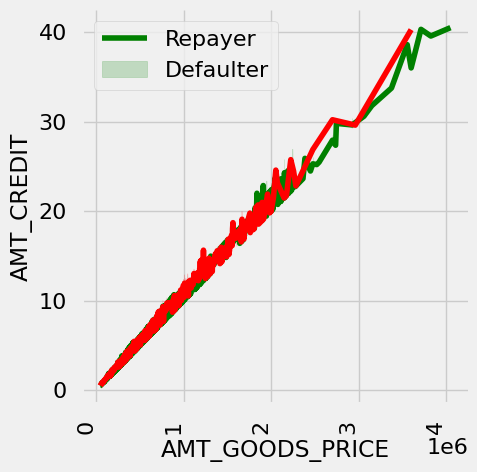

In [112]:
# Checking the relationship between Goods price and credit and comparing with loan repayment staus
bivariate_rel('AMT_GOODS_PRICE','AMT_CREDIT',applicationDF,"TARGET", "line", ['g','r'], False,(15,6))

<div class="alert alert-block alert-info">
    <span style='font-family:Georgia'>
        <b>Inferences: </b>
        <br>When the credit amount goes beyond 3M, there is an increase in defaulters.
    </span>    
</div>

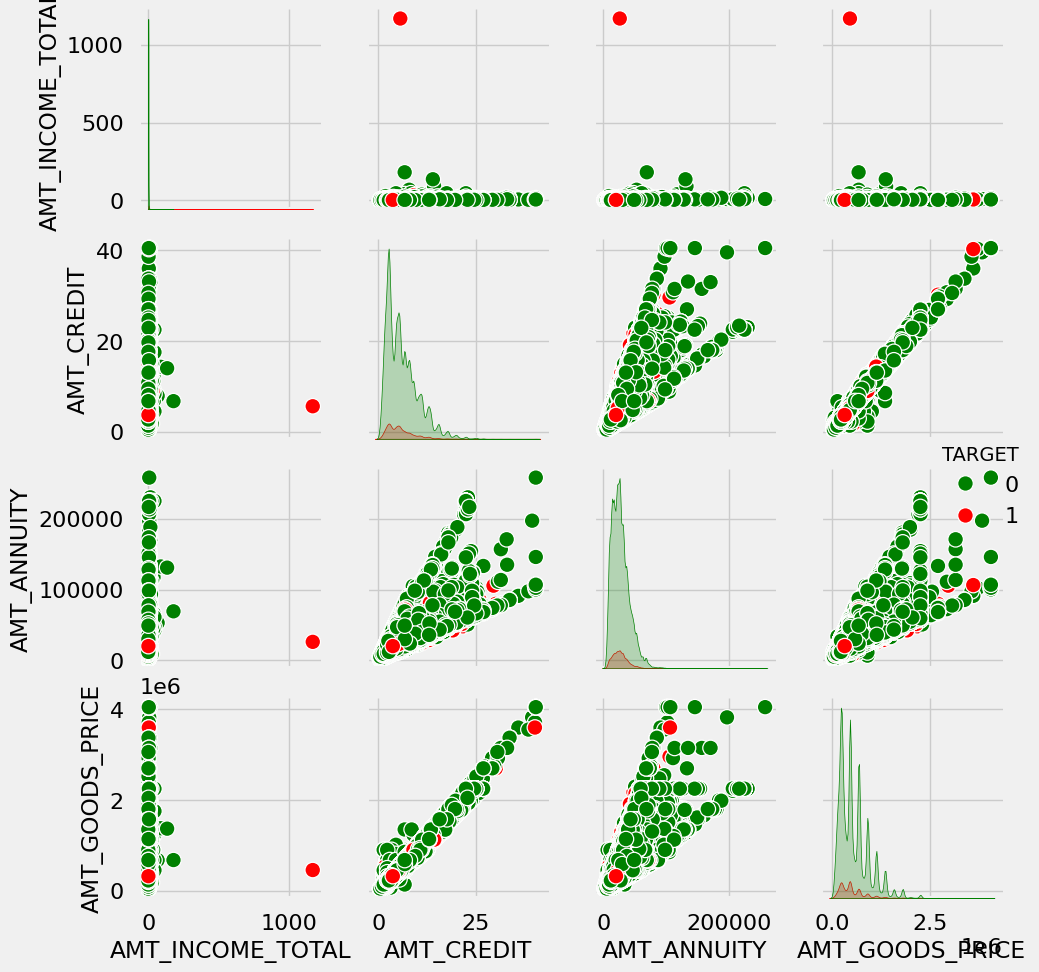

In [113]:
# Plotting pairplot between amount variable to draw reference against loan repayment status
amount = applicationDF[[ 'AMT_INCOME_TOTAL','AMT_CREDIT',
                         'AMT_ANNUITY', 'AMT_GOODS_PRICE','TARGET']]
amount = amount[(amount["AMT_GOODS_PRICE"].notnull()) & (amount["AMT_ANNUITY"].notnull())]
ax= sns.pairplot(amount,hue="TARGET",palette=["g","r"])
ax.fig.legend(labels=['Repayer','Defaulter'])
plt.show()

<div class="alert alert-block alert-info">
    <span style='font-family:Georgia'>
        <b>Inferences: </b>
        <ul>
            <li> When amt_annuity >15000 amt_goods_price> 3M, there is a lesser chance of defaulters  </li>
            <li> AMT_CREDIT and AMT_GOODS_PRICE are highly correlated as based on the scatterplot where most of the data are consolidated in form of a line</li>
            <li> There are very less defaulters for AMT_CREDIT >3M</li>
            <li> Inferences related to distribution plot has been already mentioned in previous distplot graphs inferences section</li>
        </ul>
    </span>    
</div>

<a id="merge"></a>
<h2>   
      <font color = blue >
            <span style='font-family:Georgia'>
            6. Merged Dataframes Analysis
            </span>   
        </font>    
</h2>

In [114]:
#merge both the dataframe on SK_ID_CURR with Inner Joins
loan_process_df = pd.merge(applicationDF, previousDF, how='inner', on='SK_ID_CURR')
loan_process_df.head()

SK_ID_CURR  TARGET NAME_CONTRACT_TYPE_x CODE_GENDER FLAG_OWN_CAR FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT_x  AMT_ANNUITY_x  AMT_GOODS_PRICE_x NAME_TYPE_SUITE      NAME_INCOME_TYPE            NAME_EDUCATION_TYPE    NAME_FAMILY_STATUS  NAME_HOUSING_TYPE  REGION_POPULATION_RELATIVE  DAYS_BIRTH  DAYS_EMPLOYED  DAYS_REGISTRATION  DAYS_ID_PUBLISH OCCUPATION_TYPE  CNT_FAM_MEMBERS REGION_RATING_CLIENT REGION_RATING_CLIENT_W_CITY WEEKDAY_APPR_PROCESS_START  HOUR_APPR_PROCESS_START  REG_REGION_NOT_LIVE_REGION REG_REGION_NOT_WORK_REGION LIVE_REGION_NOT_WORK_REGION REG_CITY_NOT_LIVE_CITY REG_CITY_NOT_WORK_CITY LIVE_CITY_NOT_WORK_CITY       ORGANIZATION_TYPE  OBS_30_CNT_SOCIAL_CIRCLE  DEF_30_CNT_SOCIAL_CIRCLE  OBS_60_CNT_SOCIAL_CIRCLE  DEF_60_CNT_SOCIAL_CIRCLE  DAYS_LAST_PHONE_CHANGE  FLAG_DOCUMENT_3  AMT_REQ_CREDIT_BUREAU_HOUR  AMT_REQ_CREDIT_BUREAU_DAY  AMT_REQ_CREDIT_BUREAU_WEEK  AMT_REQ_CREDIT_BUREAU_MON  AMT_REQ_CREDIT_BUREAU_QRT  AMT_REQ_CREDIT_BUREAU_YEAR AMT_INCOME_RANGE AMT_CREDIT_RANGE  AGE AGE_GROUP  YEARS_EMPLOYED EMPLOYMENT_YEAR  SK_ID_PREV NAME_CONTRACT_TYPE_y  AMT_ANNUITY_y  AMT_APPLICATION  AMT_CREDIT_y  AMT_GOODS_PRICE_y NAME_CASH_LOAN_PURPOSE NAME_CONTRACT_STATUS  DAYS_DECISION      NAME_PAYMENT_TYPE CODE_REJECT_REASON NAME_CLIENT_TYPE   NAME_GOODS_CATEGORY NAME_PORTFOLIO NAME_PRODUCT_TYPE      CHANNEL_TYPE  SELLERPLACE_AREA  NAME_SELLER_INDUSTRY  CNT_PAYMENT NAME_YIELD_GROUP             PRODUCT_COMBINATION  DAYS_FIRST_DRAWING  DAYS_FIRST_DUE  DAYS_LAST_DUE_1ST_VERSION  DAYS_LAST_DUE  DAYS_TERMINATION  NFLAG_INSURED_ON_APPROVAL DAYS_DECISION_GROUP
0      100007       0           Cash loans           M            N               Y             0             1.215      5.130000        21865.5           513000.0   Unaccompanied               Working  Secondary / secondary special  Single / not married  House / apartment                    0.028663       19932           3038             4311.0             3458      Core staff              1.0                    2                           2                   THURSDAY                       11                           0                          0                           0                      0                      1                       1                Religion                       0.0                       0.0                       0.0                       0.0                 -1106.0                0                         0.0                        0.0                         0.0                        0.0                        0.0                         0.0        100K-200K        500k-600k   54  50 above               8            5-10     2001242           Cash loans      16509.600         180000.0      180000.0           180000.0                    XNA             Approved          865.0  Cash through the bank                XAP         Repeater                   XNA           Cash           walk-in  Regional / Local            1200.0  Consumer electronics         18.0             high               Cash Street: high            365243.0          -834.0                     -324.0         -354.0            -347.0                        0.0        800.0-1200.0
1      100009       0           Cash loans           F            Y               Y             1             1.710     15.607260        41301.0          1395000.0   Unaccompanied  Commercial associate               Higher education               Married  House / apartment                    0.035792       13778           3130             1213.0              619     Accountants              3.0                    2                           2                     SUNDAY                       16                           0                          0                           0                      0                      0                       0  Business Entity Type 3                       1.0                       0.0                       1.0                       0.0                 -1562

In [115]:
#Checking the details of the merged dataframe
loan_process_df.shape

(61306, 80)

In [116]:
# Checking the element count of the dataframe
loan_process_df.size

4904480

In [117]:
# checking the columns and column types of the dataframe
loan_process_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 61306 entries, 0 to 61305
Data columns (total 80 columns):
 #   Column                       Non-Null Count  Dtype   
---  ------                       --------------  -----   
 0   SK_ID_CURR                   61306 non-null  int64   
 1   TARGET                       61306 non-null  int64   
 2   NAME_CONTRACT_TYPE_x         61306 non-null  category
 3   CODE_GENDER                  61306 non-null  category
 4   FLAG_OWN_CAR                 61306 non-null  category
 5   FLAG_OWN_REALTY              61306 non-null  category
 6   CNT_CHILDREN                 61306 non-null  int64   
 7   AMT_INCOME_TOTAL             61306 non-null  float64 
 8   AMT_CREDIT_x                 61306 non-null  float64 
 9   AMT_ANNUITY_x                61303 non-null  float64 
 10  AMT_GOODS_PRICE_x            61255 non-null  float64 
 11  NAME_TYPE_SUITE              61306 non-null  category
 12  NAME_INCOME_TYPE             61306 non-null  category
 13  N

In [118]:
# Checking merged dataframe numerical columns statistics
loan_process_df.describe()

SK_ID_CURR        TARGET  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT_x  AMT_ANNUITY_x  AMT_GOODS_PRICE_x  REGION_POPULATION_RELATIVE    DAYS_BIRTH  DAYS_EMPLOYED  DAYS_REGISTRATION  DAYS_ID_PUBLISH  CNT_FAM_MEMBERS  HOUR_APPR_PROCESS_START  REG_REGION_NOT_LIVE_REGION  OBS_30_CNT_SOCIAL_CIRCLE  DEF_30_CNT_SOCIAL_CIRCLE  OBS_60_CNT_SOCIAL_CIRCLE  DEF_60_CNT_SOCIAL_CIRCLE  DAYS_LAST_PHONE_CHANGE  FLAG_DOCUMENT_3  AMT_REQ_CREDIT_BUREAU_HOUR  AMT_REQ_CREDIT_BUREAU_DAY  AMT_REQ_CREDIT_BUREAU_WEEK  AMT_REQ_CREDIT_BUREAU_MON  AMT_REQ_CREDIT_BUREAU_QRT  AMT_REQ_CREDIT_BUREAU_YEAR           AGE  YEARS_EMPLOYED    SK_ID_PREV  AMT_ANNUITY_y  AMT_APPLICATION  AMT_CREDIT_y  AMT_GOODS_PRICE_y  DAYS_DECISION  SELLERPLACE_AREA   CNT_PAYMENT  DAYS_FIRST_DRAWING  DAYS_FIRST_DUE  DAYS_LAST_DUE_1ST_VERSION  DAYS_LAST_DUE  DAYS_TERMINATION  NFLAG_INSURED_ON_APPROVAL
count   61306.000000  61306.000000  61306.000000      61306.000000  61306.000000   61303.000000       6.125500e+04                61306.000000  61306.000000   61306.000000       61306.000000     61306.000000     61306.000000             61306.000000                61306.000000              61153.000000              61153.000000              61153.000000              61153.000000            61306.000000     61306.000000                61306.000000               61306.000000                61306.000000               61306.000000               61306.000000                61306.000000  61306.000000    61306.000000  6.130600e+04   61306.000000     6.130600e+04  6.130600e+04       6.130600e+04   61305.000000      6.130500e+04  61306.000000        38256.000000    38256.000000               38256.000000   38256.000000      38256.000000               38256.000000
mean   278818.869001      0.085310      0.413630          1.725790      5.864991   26960.271863       5.266492e+05                    0.020875  16286.742913   71829.251183        4990.622875      3038.569161         2.159968                11.986902                    0.011793                  1.540562                  0.155070                  1.523310                  0.108580            -1081.636267         0.739145                    0.004845                   0.005513                    0.033961                   0.262617                   0.305533                    2.645597     44.121212      196.263922  1.922653e+06   14463.779289     1.689814e+05  1.887066e+05       1.784890e+05     901.883305      3.824092e+02     12.325890       344677.819192    13746.253006               30834.769291   76142.422574      81354.046215                   0.322904
std    102813.736373      0.279344      0.722789          0.977057      3.855345   13955.825324       3.535926e+05                    0.013578   4358.730506  142686.671608        3541.038914      1506.849261         0.905449                 3.212493                    0.107956                  2.460984                  0.466823                  2.441429                  0.377987              802.981548         0.439105                    0.072424                   0.089961                    0.201669                   0.901764                   0.678038                    2.144578     11.940934      390.855804  5.355680e+05   13144.917839     2.832306e+05  3.096997e+05       2.781248e+05     790.717409      1.620406e+04     13.949025        84318.773163    72259.613247              102667.879323  149342.568292     152891.662467                   0.467592
min    100007.000000      0.000000      0.000000          0.270000      0.450000    2052.000000       4.050000e+04                    0.000533   7687.000000       0.000000           0.000000         0.000000         1.000000                 0.000000                    0.000000                  0.000000                  0.000000                  0.000000                  0.000000            -4153.000000         0.000000                    0.000000                   0.000000                    0.000000                   0.000000          

In [119]:
# Bifurcating the applicationDF dataframe based on Target value 0 and 1 for correlation and other analysis

L0 = loan_process_df[loan_process_df['TARGET']==0] # Repayers
L1 = loan_process_df[loan_process_df['TARGET']==1] # Defaulters

<p>
    <span style='font-family:Georgia'>
        <b> Plotting Contract Status vs purpose of the loan: </b>
    </span>
</p>

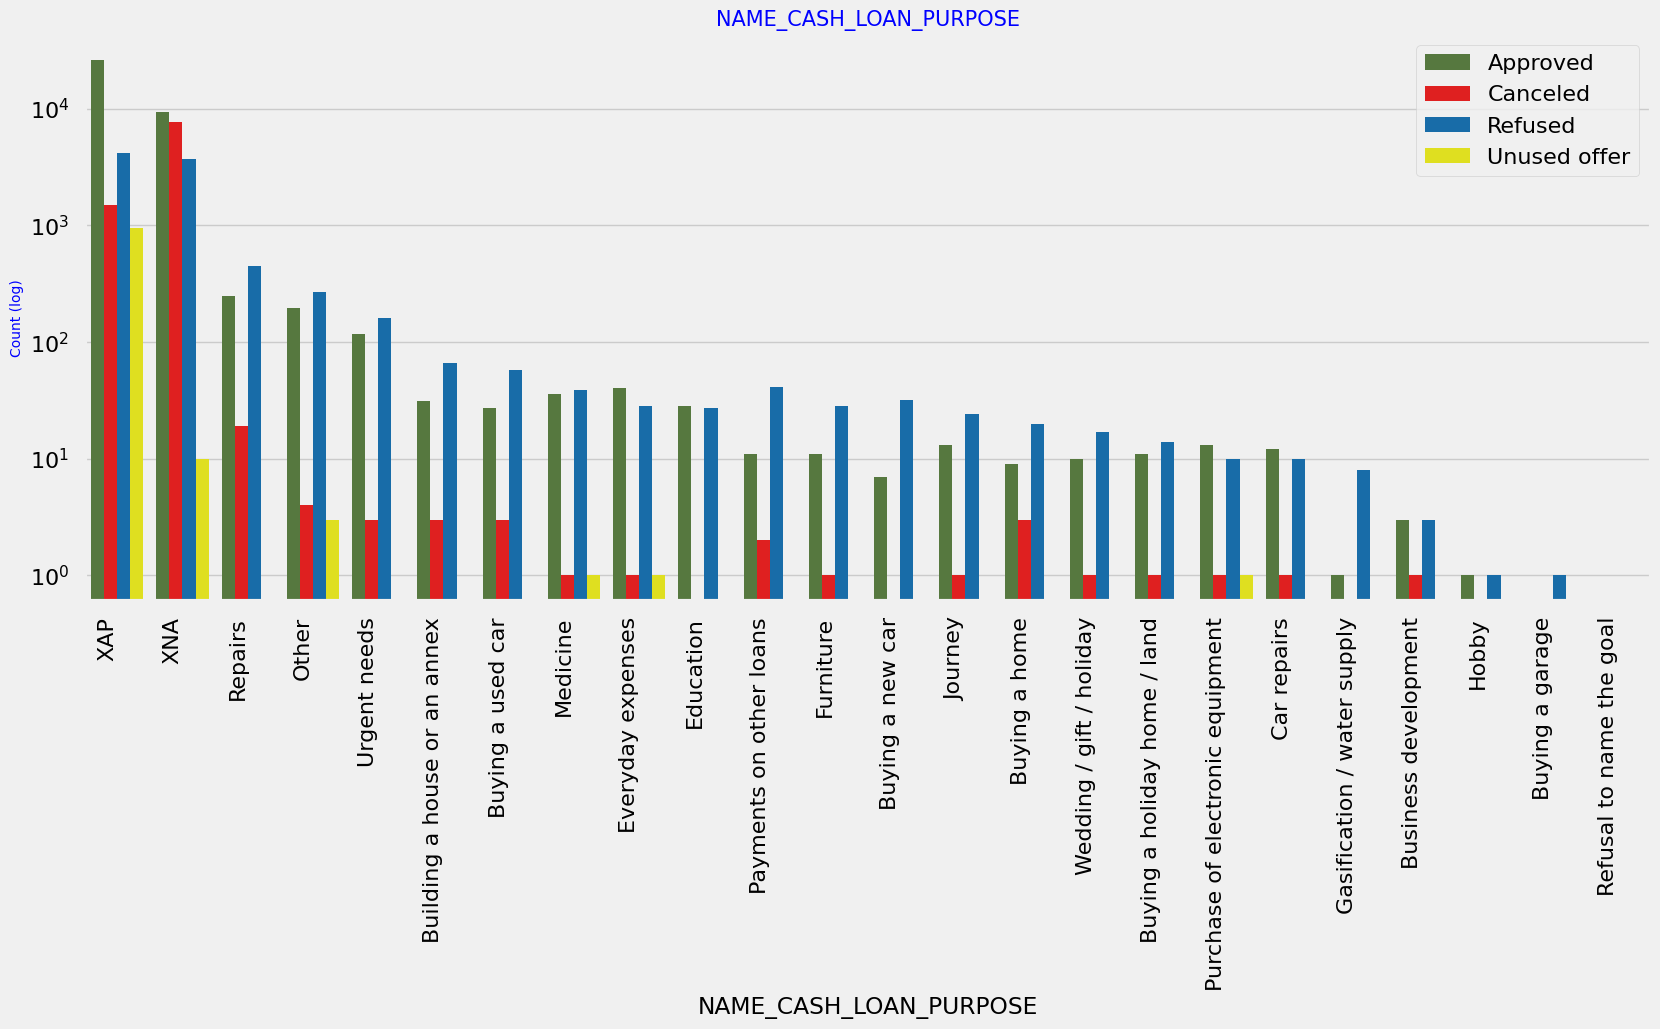

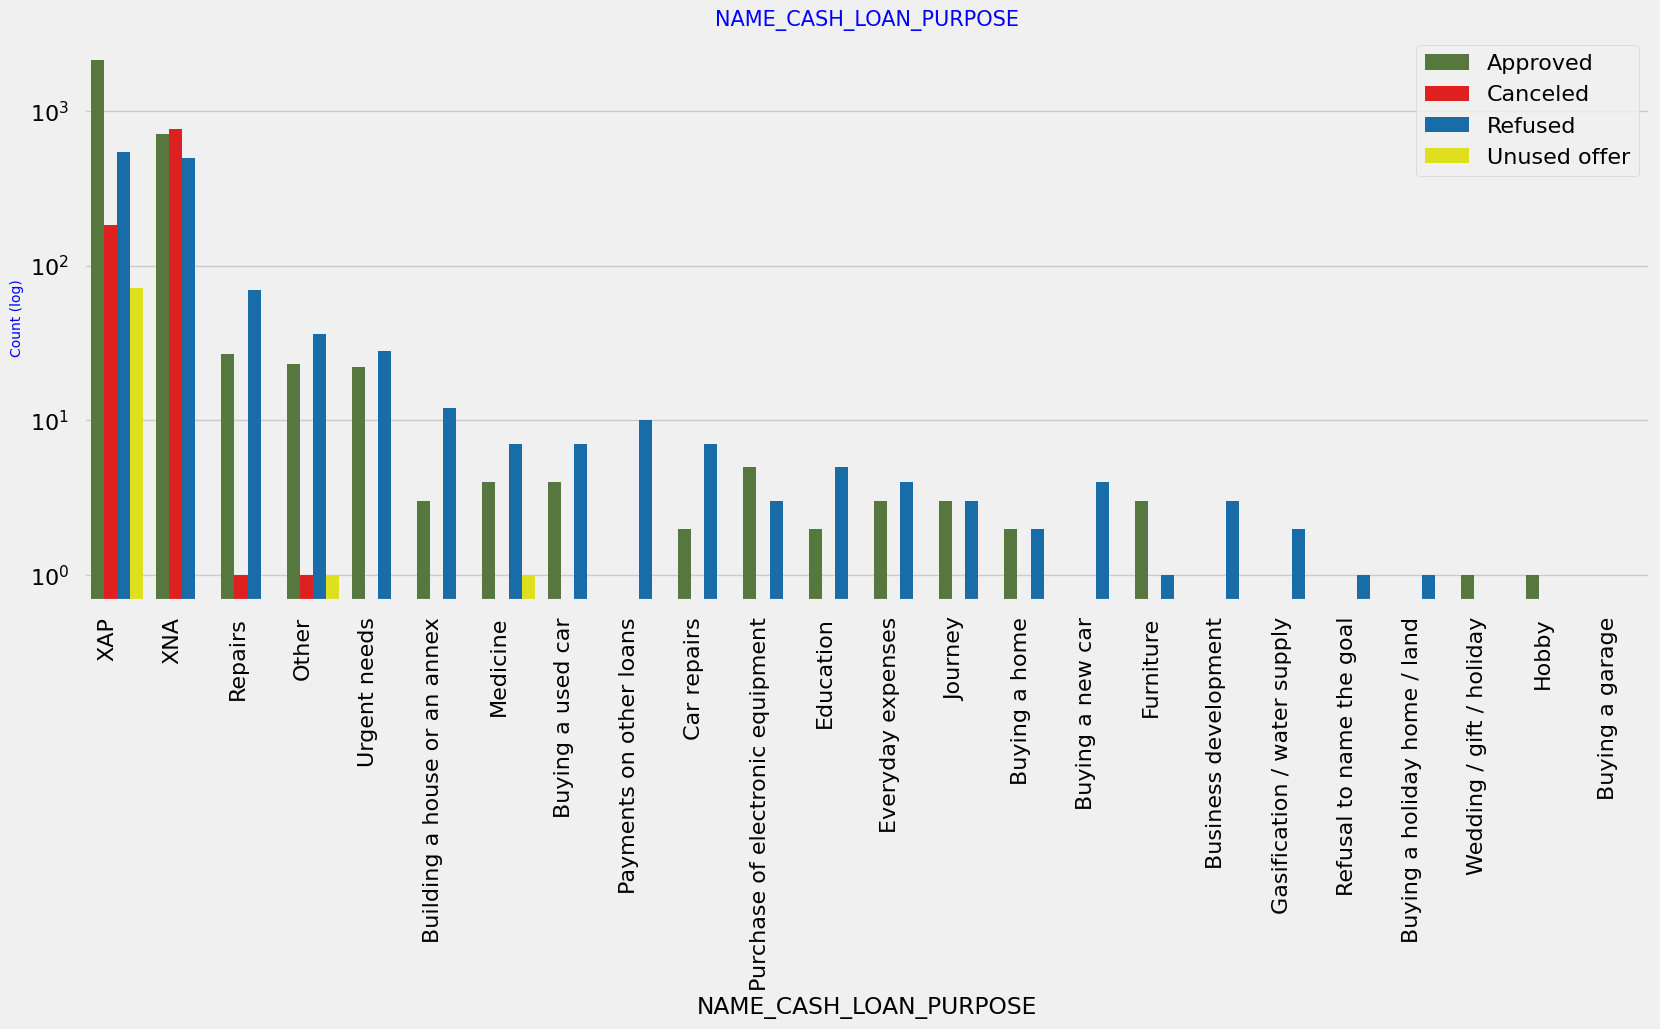

In [120]:
univariate_merged("NAME_CASH_LOAN_PURPOSE",L0,"NAME_CONTRACT_STATUS",["#548235","#FF0000","#0070C0","#FFFF00"],True,(18,7))

univariate_merged("NAME_CASH_LOAN_PURPOSE",L1,"NAME_CONTRACT_STATUS",["#548235","#FF0000","#0070C0","#FFFF00"],True,(18,7))

<div class="alert alert-block alert-info">
    <span style='font-family:Georgia'>
        <b>Inferences: </b>
        <ul>
            <li> Loan purpose has high number of unknown values (XAP, XNA)</li>
            <li> Loan taken for the purpose of Repairs seems to have highest default rate</li>
            <li> A very high number application have been rejected by bank or refused by client which has purpose as repair or other. This shows that purpose repair is taken as high risk by bank and either they are rejected or bank offers very high loan interest rate which is not feasible by the clients, thus they refuse the loan.</li>
        </ul>
    </span>    
</div>

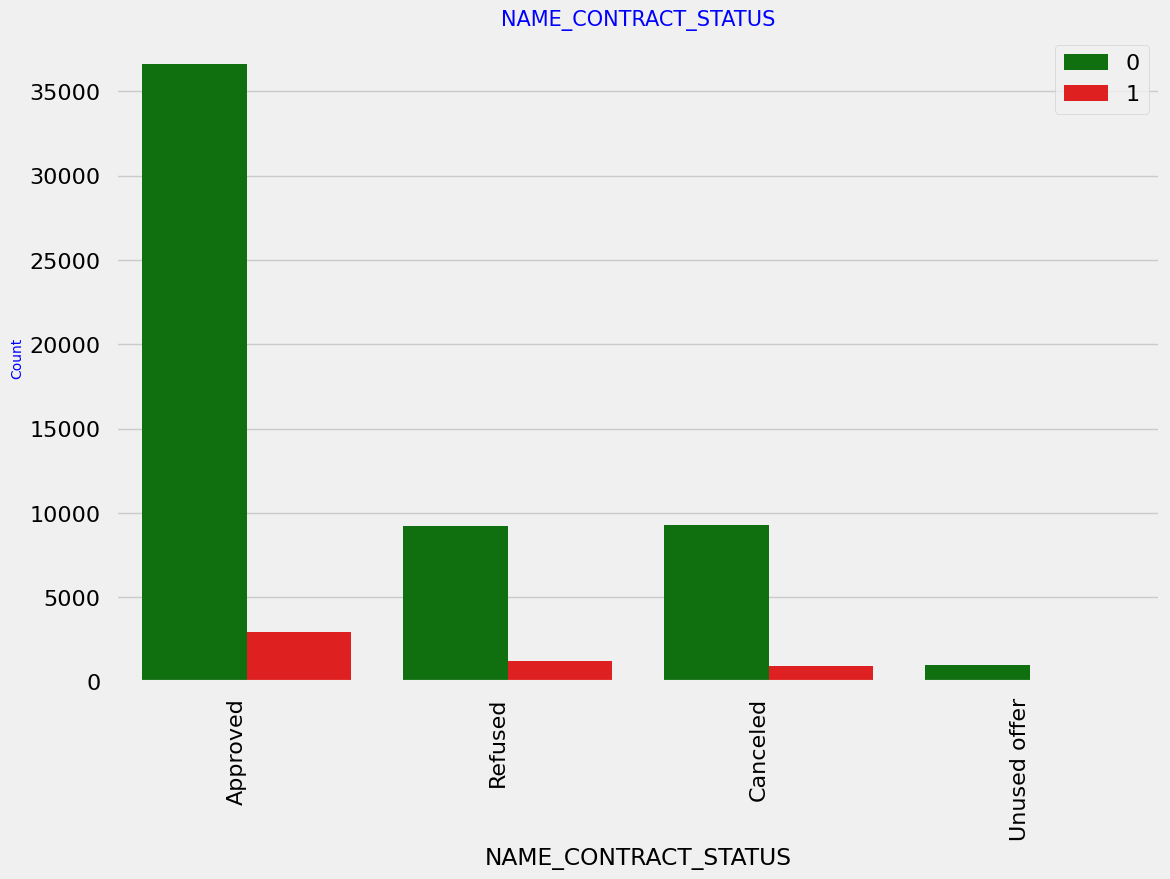

                             Counts Percentage
NAME_CONTRACT_STATUS TARGET                   
Approved             0        36586     92.53%
                     1         2955      7.47%
Canceled             0         9312     90.72%
                     1          953      9.28%
Refused              0         9202     88.06%
                     1         1248     11.94%
Unused offer         0          975     92.95%
                     1           74      7.05%


In [121]:
# Checking the Contract Status based on loan repayment status and whether there is any business loss or financial loss
univariate_merged("NAME_CONTRACT_STATUS",loan_process_df,"TARGET",['g','r'],False,(12,8))
g = loan_process_df.groupby("NAME_CONTRACT_STATUS")["TARGET"]
df1 = pd.concat([g.value_counts(),round(g.value_counts(normalize=True).mul(100),2)],axis=1, keys=('Counts','Percentage'))
df1['Percentage'] = df1['Percentage'].astype(str) +"%" # adding percentage symbol in the results for understanding
print (df1)

<div class="alert alert-block alert-info">
    <span style='font-family:Georgia'>
        <b>Inferences: </b>
        <ul>
            <li> 90% of the previously cancelled client have actually repayed the loan. Revisiting the interest rates would increase business opoortunity for these clients</li>
            <li> 88% of the clients who have been previously refused a loan has payed back the loan in current case.</li>
            <li> Refual reason should be recorded for further analysis as these clients would turn into potential repaying customer. </li>
        </ul>
    </span>    
</div>

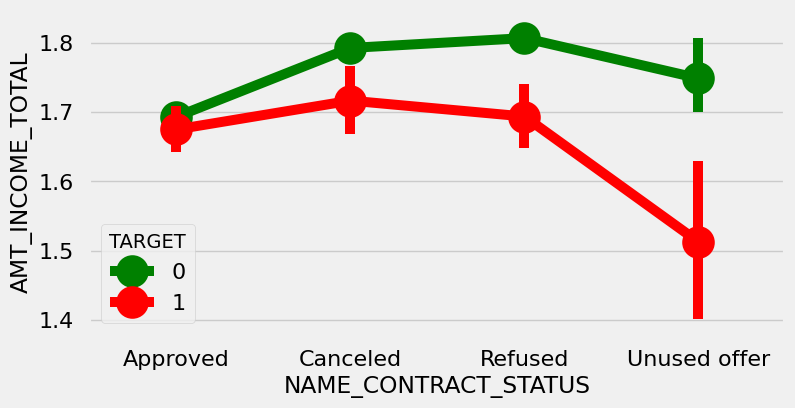

In [122]:
# plotting the relationship between income total and contact status
merged_pointplot("NAME_CONTRACT_STATUS",'AMT_INCOME_TOTAL')

<div class="alert alert-block alert-info">
    <span style='font-family:Georgia'>
        <b>Inferences: </b><br>
        The point plot show that the people who have not used offer earlier have defaulted even when there average income is higher than others
    </span>    
</div>

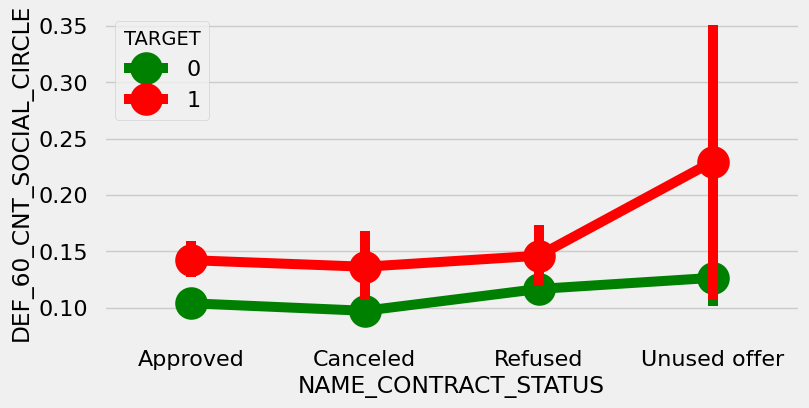

In [123]:
# plotting the relationship between people who defaulted in last 60 days being in client's social circle and contact status
merged_pointplot("NAME_CONTRACT_STATUS",'DEF_60_CNT_SOCIAL_CIRCLE')

<div class="alert alert-block alert-info">
    <span style='font-family:Georgia'>
        <b>Inferences: </b><br>
        Clients who have average of 0.13 or higher DEF_60_CNT_SOCIAL_CIRCLE score tend to default more and hence client's social circle has to be analysed before providing the loan.
    </span>    
</div>

<a id="conclusion"></a>
<h2>   
      <font color = blue >
            <span style='font-family:Georgia'>
            7. Conclusions
            </span>   
        </font>    
</h2>

<p>
    <span style='font-family:Georgia'>
        After analysing the datasets, there are few attributes of a client with which the bank would be able to identify if they will repay the loan or not. The analysis is consised as below with the contributing factors and categorization:
    </span>
</p>

<div class="alert alert-block alert-success">
    <span style='font-family:Georgia'>
        <b>Decisive Factor whether an applicant will be Repayer: </b>
        <ol>
            <li>NAME_EDUCATION_TYPE: Academic degree has less defaults. </li>
            <li>NAME_INCOME_TYPE: Student and Businessmen have no defaults.</li>
            <li>REGION_RATING_CLIENT: RATING 1 is safer.</li>
            <li>ORGANIZATION_TYPE: Clients with Trade Type 4 and 5 and Industry type 8 have defaulted less than 3%</li>
            <li>DAYS_BIRTH: People above age of 50 have low probability of defaulting</li>
            <li>DAYS_EMPLOYED: Clients with 40+ year experience having less than 1% default rate</li>
            <li>AMT_INCOME_TOTAL:Applicant with Income more than 700,000 are less likely to default</li>
            <li>NAME_CASH_LOAN_PURPOSE: Loans bought for Hobby, Buying garage are being repayed mostly.</li>
            <li>CNT_CHILDREN: People with zero to two children tend to repay the loans.</li>
        </ol>
    </span>    
</div>

<div class="alert alert-block alert-danger">
    <span style='font-family:Georgia'>
        <b>Decisive Factor whether an applicant will be Defaulter: </b>
        <ol>
            <li>CODE_GENDER: Men are at relatively higher default rate</li>
            <li>NAME_FAMILY_STATUS : People who have civil marriage or who are single default a lot. </li>
            <li>NAME_EDUCATION_TYPE: People with Lower Secondary & Secondary education</li>
            <li>NAME_INCOME_TYPE: Clients who are either at Maternity leave OR Unemployed default a lot.</li>
            <li>REGION_RATING_CLIENT: People who live in Rating 3 has highest defaults.</li>
            <li>OCCUPATION_TYPE: Avoid Low-skill Laborers, Drivers and Waiters/barmen staff, Security staff, Laborers and Cooking staff as the default rate is huge.</li>
            <li>ORGANIZATION_TYPE: Organizations with highest percent of loans not repaid are Transport: type 3 (16%), Industry: type 13 (13.5%), Industry: type 8 (12.5%) and Restaurant (less than 12%). Self-employed people have relative high defaulting rate, and thus should be avoided to be approved for loan or provide loan with higher interest rate to mitigate the risk of defaulting.</li>
            <li>DAYS_BIRTH: Avoid young people who are in age group of 20-40 as they have higher probability of defaulting</li>
            <li>DAYS_EMPLOYED: People who have less than 5 years of employment have high default rate.</li>
            <li>CNT_CHILDREN & CNT_FAM_MEMBERS: Client who have children equal to or more than 9 default 100% and hence their applications are to be rejected.</li>
            <li>AMT_GOODS_PRICE: When the credit amount goes beyond 3M, there is an increase in defaulters.</li>
        </ol>
    </span>    
</div>

<div class="alert alert-block alert-warning">
    <span style='font-family:Georgia'>
        <p>The following attributes indicate that people from these category tend to default but then due to the number of people and the amount of loan, the bank could provide loan with higher interest to mitigate any default risk thus preventing business loss:  </p>
        <ol>
            <li>NAME_HOUSING_TYPE: High number of loan applications are from the category of people who live in Rented apartments & living with parents and hence offering the loan would mitigate the loss if any of those default.</li>
            <li>AMT_CREDIT: People who get loan for 300-600k tend to default more than others and hence having higher interest specifically for this credit range would be ideal.</li>
            <li>AMT_INCOME: Since 90% of the applications have Income total less than 300,000 and they have high probability of defaulting, they could be offered loan with higher interest compared to other income category.</li>
            <li>CNT_CHILDREN & CNT_FAM_MEMBERS: Clients who have 4 to 8 children has a very high default rate and hence higher interest should be imposed on their loans.</li>
            <li>NAME_CASH_LOAN_PURPOSE: Loan taken for the purpose of Repairs seems to have highest default rate. A very high number applications have been rejected by bank or refused by client in previous applications as well which has purpose as repair or other. This shows that purpose repair is taken as high risk by bank and either they are rejected, or bank offers very high loan interest rate which is not feasible by the clients, thus they refuse the loan. The same approach could be followed in future as well.</li>
        </ol>
    </span>    
</div>

<div class="alert alert-block alert-info">
    <span style='font-family:Georgia'>
        <b>Other suggestions: </b>
        <ul>
            <li>90% of the previously cancelled client have actually repayed the loan. Record the reason for cancellation which might help the bank to determine and negotiate terms with these repaying customers in future for increase business opportunity. </li>
            <li>88% of the clients who were refused by bank for loan earlier have now turned into a repaying client. Hence documenting the reason for rejection could mitigate the business loss and these clients could be contacted for further loans.</li>
        </ul>
    </span>    
</div>